# import packages

In [2]:
import numpy as np, pandas as pd
import glob
import os 
# from astropy.io import ascii
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np
# from IPython.display import Image, display
# from os import path
from ciao_contrib.runtool import search_csc
# import pyvo as vo
# import glob, os
# from astropy.io import fits
# from matplotlib import pyplot as plt
# import matplotlib
# from matplotlib import cm
# import matplotlib.colors as colors
# from sherpa.astro import ui
# import scipy.stats
# import bxa.sherpa as bxa
# from gdpyc import GasMap, DustMap
# from astropy.coordinates import SkyCoord
# import lightkurve as lk
# from astroquery.mast import Observations
# from astropy import units as u
# import ciao_contrib.runtool as rt
# %matplotlib inline
# import warnings
# warnings.filterwarnings('ignore')

# tap = vo.dal.TAPService('http://cda.cfa.harvard.edu/csc2tap')

# read file of individual sources for investigation

In [3]:

df = pd.read_csv('./FGL_11152023_GammaCan.csv')

df = df[df['FGL'].str[-1]!='c']

df = df.sort_values(by=['flux_aper90_ave_b'], ascending=False).reset_index(drop=True)

print(df.columns)

df[['FGL','X_name','Class','name','flux_aper90_ave_b']]

df['name_nospace'] = df['X_name'].str.replace(' ','')#apply(lambda x: x.replace(' ', ''))

df[['FGL','X_name','Class','name','name_nospace','ra', 'dec','flux_aper90_ave_b','var_intra_prob',
       'var_inter_prob']]

df_alls = pd.read_csv('./FGL_11152023_GammaCan_alls.csv')


df = df[~df['X_name'].isin(['2CXO J174457.8-290509', '2CXO J174507.0-290357','2CXO J174506.8-290537','2CXO J174506.0-290512'])].reset_index(drop=True)

# ['2CXO J174457.8-290509', '2CXO J174507.0-290357','2CXO J174506.8-290537','2CXO J111459.1-611707','2CXO J150234.5+015205','2CXO J073717.0+653557','2CXO J150234.5+015205']



Index(['P_AGN', 'P_CV', 'P_HM-STAR', 'P_HMXB', 'P_LM-STAR', 'P_LMXB', 'P_NS',
       'P_YSO', 'e_P_AGN', 'e_P_CV', 'e_P_HM-STAR', 'e_P_HMXB', 'e_P_LM-STAR',
       'e_P_LMXB', 'e_P_NS', 'e_P_YSO', 'Class', 'Class_prob', 'Class_prob_e',
       'name', 'CT', 'X_name', 'FGL', 'ra', 'dec', 'r0', 'significance',
       'Fcsc_s', 'e_Fcsc_s', 'Fcsc_m', 'e_Fcsc_m', 'Fcsc_h', 'e_Fcsc_h',
       'flux_aper90_ave_b', 'e_flux_aper90_ave_b', 'var_intra_prob',
       'var_inter_prob', 'MW_MW', 'MW_counts', 'match_flag', 'p_any', 'p_i',
       'Gmag', 'BPmag', 'RPmag', 'e_Gmag', 'e_BPmag', 'e_RPmag', 'RPlx', 'PM',
       'epsi', 'sepsi', 'ruwe', 'rgeo', 'Jmag', 'Hmag', 'Kmag', 'e_Jmag',
       'e_Hmag', 'e_Kmag', 'W1mag', 'W2mag', 'W3mag', 'e_W1mag', 'e_W2mag',
       'e_W3mag', 'r_hat', 'X_PA', 'G_ra', 'G_dec', 'G_aF', 'G_bF', 'G_PA',
       'sep', 'Fb', 'HR_hms', 'popup', 'shape', 'color'],
      dtype='object')


In [12]:
df.loc[df['X_name']=='2CXO J174506.8-290537', ['FGL']]

df.loc[df['FGL']=='J1744.9-2905', 'X_name']



38     2CXO J174457.8-290509
122    2CXO J174507.0-290357
125    2CXO J174506.8-290537
126    2CXO J174506.0-290512
Name: X_name, dtype: object

In [17]:
# df_Gamma_can = df[(df['Class'].isin(['NS','CV','HMXB','LMXB','AGN'])) & (df['significance']>=5.) & (df['CT']>=2)].reset_index(drop=True)

# df_new = df[~(df['X_name'].isin(df_Gamma_can['X_name'])) & (df['flux_aper90_ave_b']>=5e-14) & (df['flux_aper90_ave_b']<=1e-13)].reset_index(drop=True)
# print(len(df_new))

for index, df_src in df.iterrows():
    # src_short = src[4:-9]
    #print(src)
    # print(df_src)
    src = df_src['name_nospace']
    src_short = src[4:-9]
    # df_src = df[df['name_nospace']==src]
    ra, dec, src_name = df_src['ra'], df_src['dec'], df_src['X_name']
    src_name = df.loc[index, 'X_name']
    

    if os.path.exists(f'/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/{src}/'):
        continue
    
    print(src_name, ra, dec)
    search_csc(f'{ra}, {dec}', '1.0', f'./Individual_sources/{src}_source_search.tsv', 'arcsec', 
         '', 'no', 'all', './Individual_sources/', 'broad', 'regevt,lc,pha,rmf,arf,fov,reg,stksrcreg', 'csc2','1','1')

2CXO J111513.6-611657 168.80675737279526 -61.28262610123477
2CXO J111501.7-611751 168.75734073167882 -61.29768997767354
2CXO J111459.1-611707 168.74621575452628 -61.28542330819856


In [5]:
df_new[['X_name','Class','CT','flux_aper90_ave_b']]

,X_name,Class,CT,flux_aper90_ave_b
0,2CXO J085903.6-473040,CV,0.258678,9.971965e-14
1,2CXO J205824.0+435354,YSO,4.938761,9.968556e-14
2,2CXO J184441.8-030551,NS,1.508284,9.905015e-14
3,2CXO J181920.3-203952,NS,0.166747,9.870616e-14
4,2CXO J172026.9-370322,CV,0.068097,9.371370e-14
5,2CXO J085906.6-473022,CV,0.276804,9.001823e-14
6,2CXO J085905.5-473036,YSO,0.802830,8.959893e-14
7,2CXO J161519.3-603852,LM-STAR,2.407878,7.987105e-14
8,2CXO J085903.5-473058,YSO,2.761005,7.906780e-14
9,2CXO J172510.9-340843,NS,0.148503,7.714839e-14


In [5]:
df_alls.loc[df_alls['src_cnts_aper90_b']>=100, 'name'].unique()

# light curve >50 counts
# spectrum > 100 counts

df_select = df[df['X_name'].isin(df_alls.loc[df_alls['src_cnts_aper90_b']>=50, 'name'].unique())].reset_index(drop=True)

# coords = SkyCoord(df_select['ra'], df_select['dec'], unit='deg')
# df_select['ebv'] = DustMap.ebv(coords, dustmap='SFD') * 0.86 # 0.86 is the correction described in Schlafly et al. 2010 and Schlafly & Finkbeiner 2011
# df_select['nH_from_AV'] = 2.21 * 3.1 * df_select['ebv'] * 0.1
# df_select['nH']  = GasMap.nh(coords, nhmap='LAB').value / 1e22 # nH in unit of 1.e22 atoms /cm2

# df_select[['FGL','X_name','Class','name','name_nospace','ra', 'dec','flux_aper90_ave_b','var_intra_prob',
#        'var_inter_prob','ebv']]

In [8]:
# interesting sources from 4FGL fields

# 4FGL J0859.3-4342 # 

'2CXO J085927.0-434528' # CV candidate, brightest source in the field, crowded 

# 4FGL J1742.5-2833

'2CXO J174237.6-283726' # NS cand 
# 4FGL J1115.1-6118
'2CXO J111513.6-611657', '2CXO J111459.1-611707' # NS candidates too faint <1e-15 cgs

# 4FGL J1046.7-6010
'2CXO J104717.9-601042' # LMXB cand

# 4FGL J1744.9-2905
 # 4 NS cand have counterparts from deeper surveys





'2CXO J104717.9-601042'

In [9]:
df_alls.loc[df_alls['src_cnts_aper90_b']>=100, 'name'].unique()

# light curve >50 counts
# spectrum > 100 counts

df_select3 = df[df['X_name'].isin(df_alls.loc[df_alls['src_cnts_aper90_b']>=50, 'name'].unique())].reset_index(drop=True)

# coords = SkyCoord(df_select3['ra'], df_select3['dec'], unit='deg')
# df_select3['ebv'] = DustMap.ebv(coords, dustmap='SFD') * 0.86 # 0.86 is the correction described in Schlafly et al. 2010 and Schlafly & Finkbeiner 2011
# df_select3['nH_from_AV'] = 2.21 * 3.1 * df_select3['ebv'] * 0.1
# df_select3['nH']  = GasMap.nh(coords, nhmap='LAB').value / 1e22 # nH in unit of 1.e22 atoms /cm2

df_select3[['FGL','X_name','Class','name','name_nospace','ra', 'dec','flux_aper90_ave_b','var_intra_prob',
       'var_inter_prob']]

,FGL,X_name,Class,name,name_nospace,ra,dec,flux_aper90_ave_b,var_intra_prob,var_inter_prob
0,J0859.3-4342,2CXO J085927.0-434528,CV,2CXO J085927.0-434528-1,2CXOJ085927.0-434528,134.862609,-43.757805,1.588133e-12,1.000000,NaN
1,J1725.1-3408,2CXO J172508.8-341112,YSO,2CXO J172508.8-341112-1,2CXOJ172508.8-341112,261.286915,-34.186814,1.147249e-12,0.055377,NaN
2,J0859.2-4729,2CXO J085905.6-473041,YSO,2CXO J085905.6-473041-1,2CXOJ085905.6-473041,134.773545,-47.511358,7.153640e-13,0.989917,NaN
3,J1742.5-2833,2CXO J174216.9-283707,CV,2CXO J174216.9-283707-0,2CXOJ174216.9-283707,265.570523,-28.618904,4.837334e-13,1.000000,1.000
4,J1743.8-3143,2CXO J174347.2-314025,LM-STAR,2CXO J174347.2-314025-1,2CXOJ174347.2-314025,265.946810,-31.673652,4.572944e-13,0.394074,NaN
...,...,...,...,...,...,...,...,...,...,...
86,J0859.3-4342,2CXO J085928.4-434628,NS,2CXO J085928.4-434628-0,2CXOJ085928.4-434628,134.868359,-43.774511,1.069479e-14,0.311447,NaN
87,J1843.7-3227,2CXO J184332.8-322122,AGN,2CXO J184332.8-322122-0,2CXOJ184332.8-322122,280.886834,-32.356354,1.028138e-14,0.930766,0.548
88,J1510.9+0551,2CXO J151051.3+054937,AGN,2CXO J151051.3+054937-1,2CXOJ151051.3+054937,227.714003,5.827066,8.433205e-15,0.980560,0.904
89,J1242.6+3236,2CXO J124235.1+323340,AGN,2CXO J124235.1+323340-1,2CXOJ124235.1+323340,190.646542,32.561261,8.121739e-15,0.547078,NaN


ngc3532_sources = ['2CXOJ110450.0-585559']#, '2CXOJ110521.8-584528', '2CXOJ110535.8-584609']

for src in ngc3532_sources:
    filename = f'{src}_files.txt'
    os.system(f'python customfitter_wstat.py -fn {filename} -md mekal')
    os.system(f'python customfitter_wstat.py -fn {filename} -md powerlaw')
    os.system(f'python customfitter_wstat.py -fn {filename} -md bb')
    os.system(f'python model_compare.py Individual_sources/2CXOJ110521.8-584528/08941_001/acisf08941_001N022_r0136_pha3.fits.gz_bb_out_/ Individual_sources/2CXOJ110521.8-584528/08941_001/acisf08941_001N022_r0136_pha3.fits.gz_mekal_out_/ Individual_sources/2CXOJ110521.8-584528/08941_001/acisf08941_001N022_r0136_pha3.fits.gz_powerlaw_out_/  > 2CXOJ110521.8-584528_model_compare.txt')
    # %python customfitter_wstat.py -fn $filename  

In [8]:
df_select3 = df_select3[~df_select3['X_name'].isin(['2CXO J174457.8-290509', '2CXO J174507.0-290357','2CXO J174506.8-290537','2CXO J111459.1-611707'])].reset_index(drop=True)
# print(df_select3)

for index, df_src in df_select3.iterrows():# ['name_nospace'].values:
    
    src = df_src['name_nospace']
    src_short = src[4:-9]
    # if src != '2CXOJ174457.8-290509':
    #     continue
    #print(src)
    # if index !=1:
    #     continue

    # df_src = df_select[df_select['name_nospace']==src]
    ra, dec, src_name = df_src['ra'], df_src['dec'], df_src['X_name']
    print(index, src_name, ra, dec)
    

    # coords = SkyCoord(ra, dec, unit='deg')
    # ebv = DustMap.ebv(coords, dustmap='SFD') * 0.86 # 0.86 is the correction described in Schlafly et al. 2010 and Schlafly & Finkbeiner 2011
    # nH_from_AV = df_src['nH_from_AV']# 2.21 * 3.1 * ebv * 0.1
    # nH  = df_src['nH']# GasMap.nh(coords, nhmap='LAB').value / 1e22 # nH in unit of 1.e22 atoms /cm2
    #print(f'nH: {nH} 1.e22 atoms /cm2')

    # df_var = search_file.table.to_pandas()
    df_var = df_alls[(df_alls['name']==src_name) & (df_alls['src_cnts_aper90_b']>=50)].reset_index(drop=True)
    print(df_var[['name','obsid','obi','region_id','src_cnts_aper90_b']])


0 2CXO J085927.0-434528 134.86260894620565 -43.75780494871906
                    name  obsid  obi  region_id  src_cnts_aper90_b
0  2CXO J085927.0-434528   6433    0        244        6082.460129
1 2CXO J174237.6-283726 265.65692088726325 -28.624160710801192
                    name  obsid  obi  region_id  src_cnts_aper90_b
0  2CXO J174237.6-283726   8208    0         38          51.564497
1  2CXO J174237.6-283726   8206    0         50          50.810989
2 2CXO J033532.7-072741 53.88645833333332 -7.461447222222226
                    name  obsid  obi  region_id  src_cnts_aper90_b
0  2CXO J033532.7-072741   5628    0          4          96.396307
3 2CXO J103143.2+573252 157.93027850063467 57.54784930909743
                    name  obsid  obi  region_id  src_cnts_aper90_b
0  2CXO J103143.2+573252   3345    0         10         396.738504
4 2CXO J184316.0-322414 280.81683436989675 -32.40405369288799
                    name  obsid  obi  region_id  src_cnts_aper90_b
0  2CXO J184316.0-322

In [11]:
df_select3 = df_select3[~df_select3['X_name'].isin(['2CXO J174457.8-290509', '2CXO J174507.0-290357','2CXO J174506.8-290537','2CXO J111459.1-611707','2CXO J150234.5+015205','2CXO J073717.0+653557'])].reset_index(drop=True)
# print(df_select3)

df_Gamma_can = df_select3[(df_select3['Class'].isin(['NS','CV','HMXB','LMXB','AGN'])) & (df_select3['significance']>=5.) & (df_select3['CT']>=2)].reset_index(drop=True)


df_new = df_select3[~(df_select3['X_name'].isin(df_Gamma_can['X_name'])) & (df_select3['flux_aper90_ave_b']>=1e-13)].reset_index(drop=True)
print(len(df_new))

df_new[['X_name']]

15


,X_name
0,2CXO J172508.8-341112
1,2CXO J085905.6-473041
2,2CXO J174216.9-283707
3,2CXO J174347.2-314025
4,2CXO J085932.2-434602
5,2CXO J063805.1-801854
6,2CXO J085928.0-434510
7,2CXO J085926.2-434527
8,2CXO J005806.2-460419
9,2CXO J174042.0-280724


In [10]:
df_srcs = pd.DataFrame()

# df_select3 = df_select3[~df_select3['X_name'].isin(['2CXO J174457.8-290509', '2CXO J174507.0-290357','2CXO J174506.8-290537','2CXO J111459.1-611707','2CXO J150234.5+015205','2CXO J073717.0+653557','2CXO J150234.5+015205'])].reset_index(drop=True)
# print(df_select3)
# print(df_select3)


# df_Gamma_can = df_select3[(df_select3['Class'].isin(['NS','CV','HMXB','LMXB','AGN'])) & (df_select3['significance']>=5.) & (df_select3['CT']>=2)].reset_index(drop=True)


# df_new = df_select3[~(df_select3['X_name'].isin(df_Gamma_can['X_name'])) & (df_select3['flux_aper90_ave_b']>=5e-14) & (df_select3['flux_aper90_ave_b']<=1e-13)].reset_index(drop=True)
# print(len(df_new))

for index, df_src in df_select3.iterrows():# df_select3.iterrows():# ['name_nospace'].values:
    
    src = df_src['name_nospace']
    src_short = src[4:-9]
    print(src)
    # if src != '2CXOJ174457.8-290509':
    #     continue
    #print(src)
    # if index <7:
    #     continue
    if os.path.exists(f'/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/{src}/bb_out_/spectrum_1.png'):
        continue

    # if src != '2CXOJ150234.5+015205':
    #     continue

    # df_src = df_select[df_select['name_nospace']==src]
    ra, dec, src_name = df_src['ra'], df_src['dec'], df_src['X_name']
    print(src_name, ra, dec)
    

    # coords = SkyCoord(ra, dec, unit='deg')
    # ebv = DustMap.ebv(coords, dustmap='SFD') * 0.86 # 0.86 is the correction described in Schlafly et al. 2010 and Schlafly & Finkbeiner 2011
    # nH_from_AV = df_src['nH_from_AV']# 2.21 * 3.1 * ebv * 0.1
    # nH  = df_src['nH']# GasMap.nh(coords, nhmap='LAB').value / 1e22 # nH in unit of 1.e22 atoms /cm2
    #print(f'nH: {nH} 1.e22 atoms /cm2')

    # df_var = search_file.table.to_pandas()
    df_var = df_alls[(df_alls['name']==src_name) & (df_alls['src_cnts_aper90_b']>=50)].reset_index(drop=True)
    print(df_var[['name','obsid','obi','region_id','src_cnts_aper90_b']])
    # print(df_var['powlaw_nh'][0]/100,nH_from_AV,nH)
    
    # '''
    df_var['obsid'] = df_var['obsid'].apply(lambda x: str(x).zfill(5))

    df_s = pd.DataFrame()
    # ui.clean()

    f = open(f'{src}_files.txt','w')

    f.write(f'/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/{src}/')
    f.write('\n')

    for df_csc_src_idx, row in df_var.iterrows():
    # for obsid, obi, var_prob, detect_stack_id in zip(df_var['obsid'], df_var['obi'], df_var['kp_prob_b'], df_var['detect_stack_id']):
        # obsid = f'{obsid:05d}'
        
        obsid, obi, region_id, counts = row['obsid'], row['obi'], row['region_id'], row['src_cnts_aper90_b']
        per_folder = f'{obsid}_{obi:03d}'
        
        # if net_count < 100:
        #     continue 


        pha = glob.glob(f'/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/{src}/{obsid}_{obi:03d}/*pha3.fits.gz')

        f.write(f'{pha[0]} 0.5 7.0')
        f.write('\n')
        

    f.close()    

    filename = f'{src}_files.txt'
    if len(df_var)<=3:
        os.system(f'python customfitter_wstat_logpar.py -fn {src}_files.txt -md mekal')
        os.system(f'python customfitter_wstat_logpar.py -fn {src}_files.txt -md powerlaw')
        os.system(f'python customfitter_wstat_logpar.py -fn {src}_files.txt -md bb')
        # os.system(f'python customfitter_wstat_logpar.py -fn {src}_files.txt -md twomekal')
        # os.system(f'python customfitter_wstat_logpar.py -fn {src}_files.txt -md powerlawbb')

        # os.system(f'python model_compare.py {pha[0]}_bb_out_/ {pha[0]}_mekal_out_/ {pha[0]}_powerlaw_out_/  > {src}_model_compare.txt')
    elif len(df_var)>3:
        print('fixing norm')
        os.system(f'python customfitter_wstat_logpar.py -fn {src}_files.txt -md mekal -fxn T')
        os.system(f'python customfitter_wstat_logpar.py -fn {src}_files.txt -md powerlaw -fxn T')
        os.system(f'python customfitter_wstat_logpar.py -fn {src}_files.txt -md bb -fxn T')

# for index, df_src in df_select3.iterrows():# ['name_nospace'].values:
    
#     src = df_src['name_nospace']
   
#     filename = f'{src}_files.txt'
#     # os.system(f'python customfitter_wstat_logpar.py -fn {src}_files.txt -md mekal')
#     # os.system(f'python customfitter_wstat_logpar.py -fn {src}_files.txt -md powerlaw')
#     # os.system(f'python customfitter_wstat_logpar.py -fn {src}_files.txt -md bb')
#     os.system(f'python customfitter_wstat_logpar.py -fn {src}_files.txt -md twomekal')
#     os.system(f'python customfitter_wstat_logpar.py -fn {src}_files.txt -md powerlawbb')

#     # os.system(f'python model_compare.py {pha[0]}_bb_out_/ {pha[0]}_mekal_out_/ {pha[0]}_powerlaw_out_/  > {src}_model_compare.txt')
      
            

2CXOJ085927.0-434528
2CXOJ172508.8-341112
2CXOJ085905.6-473041
2CXOJ174216.9-283707
2CXOJ174347.2-314025
2CXOJ085932.2-434602
2CXOJ063805.1-801854
2CXOJ085928.0-434510
2CXOJ085926.2-434527
2CXOJ005806.2-460419
2CXOJ174042.0-280724
2CXOJ085902.1-473016
2CXOJ085903.2-434834
2CXOJ174036.5-280840
2CXOJ174237.6-283726
2CXOJ085910.9-434343
2CXOJ033532.7-072741
2CXOJ085853.9-473051
2CXOJ103143.2+573252
2CXOJ085903.6-473040
2CXOJ205824.0+435354
2CXOJ184441.8-030551
2CXOJ181920.3-203952
2CXOJ085906.6-473022
2CXOJ085905.5-473036
2CXOJ184316.0-322414
2CXOJ161519.3-603852
2CXOJ085903.5-473058
2CXOJ172510.9-340843
2CXOJ205846.9+435151
2CXOJ085854.2-472841
2CXOJ125740.2+273118
2CXOJ143542.6+333404
2CXOJ085927.5-434528
2CXOJ063554.8-800814
2CXOJ085902.0-473209
2CXOJ085926.8-434933
2CXOJ150237.4+015813
2CXOJ103202.9+573208
2CXOJ085905.7-473009
2CXOJ180445.6-300418
2CXOJ085930.9-434647
2CXOJ085935.8-434457
2CXOJ223708.5+183939
2CXOJ064126.4-801048
2CXOJ104642.3-600904
2CXOJ102557.9+124109
2CXOJ172516.8

[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12951_000/acisf12951_000N021_r0396_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12951_000/acisf12951_000N021_r0396_rmf3.fits


read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12951_000/acisf12951_000N022_r0396_pha3.fits
dataset 1: 0.0073:14.9504 Energy (keV) -> no data
dataset 1: no data -> 0.4964:7.008 Energy (keV)
2
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12952_000/acisf12952_000N022_r0396_pha3.fits.gz" as id=2 ...


[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12951_000/acisf12951_000N022_r0396_pha3.fits
[sherpa.ui.utils INFO]: dataset 1: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 1: no data -> 0.4964:7.008 Energy (keV)


read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12952_000/acisf12952_000N021_r0396_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12952_000/acisf12952_000N021_r0396_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12952_000/acisf12952_000N021_r0396_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12952_000/acisf12952_000N021_r0396_rmf3.fits


read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12952_000/acisf12952_000N022_r0396_pha3.fits
dataset 2: 0.0073:14.9504 Energy (keV) -> no data
dataset 2: no data -> 0.4964:7.008 Energy (keV)
3
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12953_000/acisf12953_000N022_r0396_pha3.fits.gz" as id=3 ...


[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12952_000/acisf12952_000N022_r0396_pha3.fits
[sherpa.ui.utils INFO]: dataset 2: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 2: no data -> 0.4964:7.008 Energy (keV)


read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12953_000/acisf12953_000N021_r0396_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12953_000/acisf12953_000N021_r0396_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12953_000/acisf12953_000N021_r0396_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12953_000/acisf12953_000N021_r0396_rmf3.fits


read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12953_000/acisf12953_000N022_r0396_pha3.fits
dataset 3: 0.0073:14.9504 Energy (keV) -> no data
dataset 3: no data -> 0.4964:7.008 Energy (keV)
4
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13246_000/acisf13246_000N022_r0396_pha3.fits.gz" as id=4 ...


[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12953_000/acisf12953_000N022_r0396_pha3.fits
[sherpa.ui.utils INFO]: dataset 3: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 3: no data -> 0.4964:7.008 Energy (keV)


read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13246_000/acisf13246_000N021_r0396_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13246_000/acisf13246_000N021_r0396_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13246_000/acisf13246_000N021_r0396_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13246_000/acisf13246_000N021_r0396_rmf3.fits


read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13246_000/acisf13246_000N022_r0396_pha3.fits
dataset 4: 0.0073:14.9504 Energy (keV) -> no data
dataset 4: no data -> 0.4964:7.008 Energy (keV)
5
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13247_000/acisf13247_000N022_r0396_pha3.fits.gz" as id=5 ...


[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13246_000/acisf13246_000N022_r0396_pha3.fits
[sherpa.ui.utils INFO]: dataset 4: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 4: no data -> 0.4964:7.008 Energy (keV)


read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13247_000/acisf13247_000N021_r0396_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13247_000/acisf13247_000N021_r0396_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13247_000/acisf13247_000N021_r0396_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13247_000/acisf13247_000N021_r0396_rmf3.fits


read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13247_000/acisf13247_000N022_r0396_pha3.fits
dataset 5: 0.0073:14.9504 Energy (keV) -> no data
dataset 5: no data -> 0.4964:7.008 Energy (keV)
6
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13253_000/acisf13253_000N022_r0396_pha3.fits.gz" as id=6 ...


[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13247_000/acisf13247_000N022_r0396_pha3.fits
[sherpa.ui.utils INFO]: dataset 5: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 5: no data -> 0.4964:7.008 Energy (keV)


read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13253_000/acisf13253_000N021_r0396_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13253_000/acisf13253_000N021_r0396_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13253_000/acisf13253_000N021_r0396_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13253_000/acisf13253_000N021_r0396_rmf3.fits


read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13253_000/acisf13253_000N022_r0396_pha3.fits
dataset 6: 0.0073:14.9504 Energy (keV) -> no data
dataset 6: no data -> 0.4964:7.008 Energy (keV)
7
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13255_000/acisf13255_000N022_r0396_pha3.fits.gz" as id=7 ...


[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13253_000/acisf13253_000N022_r0396_pha3.fits
[sherpa.ui.utils INFO]: dataset 6: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 6: no data -> 0.4964:7.008 Energy (keV)


read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13255_000/acisf13255_000N021_r0396_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13255_000/acisf13255_000N021_r0396_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13255_000/acisf13255_000N021_r0396_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13255_000/acisf13255_000N021_r0396_rmf3.fits


read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13255_000/acisf13255_000N022_r0396_pha3.fits
dataset 7: 0.0073:14.9504 Energy (keV) -> no data
dataset 7: no data -> 0.4964:7.008 Energy (keV)
setting source model ...
creating priors
Priors: [<function create_uniform_prior_for.<locals>.<lambda> at 0x7fde26c451b0>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7fde26c45240>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7fde26c452d0>]
Params: [<Parameter 'lognorm' of model 'src1'>, <Parameter 'logkT' of model 'src1'>, <Parameter 'lognH' of model 'src1'>]
running BXA ...
[ultranest] Sampling 400 live points from prior ...


[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13255_000/acisf13255_000N022_r0396_pha3.fits
[sherpa.ui.utils INFO]: dataset 7: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 7: no data -> 0.4964:7.008 Energy (keV)
tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.
[ultranest INFO]: Sampling 400 live points from prior ...




Mono-modal Volume: ~exp(-3.45) * Expected Volume: exp(0.00) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
src1.logkT  :      -1.0|*********************************************|     +1.5
src1.lognH  :     +19.0|*********************************************|    +26.0

Z=-2782301.5(0.00%) | Like=-2414157.29..-458.26 [-5.482e+09..-540.9] | it/evals=87/498 eff=88.7755% N=400 0 

Mono-modal Volume: ~exp(-3.74) * Expected Volume: exp(-0.23) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
src1.logkT  :      -1.0|*********************************************|     +1.5
src1.lognH  :     +19.0|*********************************************|    +26.0

Z=-15434.4(0.00%) | Like=-15369.25..-458.26 [-5.482e+09..-540.9] | it/evals=179/614 eff=83.6449% N=400 0  

Mono-modal Volume: ~exp(-3.74)   Expected Volume: exp(-0.45) Quality: ok

src1.lognorm:      -8.0|******************************* *************|     +2

[ultranest INFO]: Explored until L=-5e+02  
[ultranest INFO]: Likelihood function evaluations: 12914
[ultranest INFO]: Writing samples and results to disk ...
[ultranest INFO]: Writing samples and results to disk ... done
[ultranest INFO]:   logZ = -459.3 +- 0.1256
[ultranest INFO]: Effective samples strategy satisfied (ESS = 1214.5, need >400)
[ultranest INFO]: Posterior uncertainty strategy is satisfied (KL: 0.47+-0.09 nat, need <0.50 nat)
[ultranest INFO]: Evidency uncertainty strategy is satisfied (dlogz=0.18, need <0.5)
[ultranest INFO]:   logZ error budget: single: 0.14 bs:0.13 tail:0.12 total:0.18 required:<0.50
[ultranest INFO]: done iterating.


[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -459.3 +- 0.1256
[ultranest] Effective samples strategy satisfied (ESS = 1214.5, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.09 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.18, need <0.5)
[ultranest]   logZ error budget: single: 0.14 bs:0.13 tail:0.12 total:0.18 required:<0.50
[ultranest] done iterating.

logZ = -459.322 +- 0.302
  single instance: logZ = -459.322 +- 0.127
  bootstrapped   : logZ = -459.323 +- 0.275
  tail           : logZ = +- 0.123
insert order U test : converged: True correlation: inf iterations

    src1.lognorm        : -4.832│ ▁▁▁▁▁▁▁▂▂▃▃▆▆▇▇▇▇▆▅▅▃▃▂▁▁▁▁▁▁▁▁▁▁▁  ▁ │-4.391    -4.649 +- 0.048
    src1.logkT          : 0.31  │ ▁▁ ▁▁▁▁▁▁▁▁▁▁▁▂▃▃▃▄▅▅▅▅▄▅▆▇▅▆▆▆▆▆▅▆▇▄▆│1.48      1.15 +- 0.20
    src1.lognH          : 19.00 │▅▅▆▄▇▇▅▇▅▅▆▆▆▆▆▇▇▆▆▆▆▇▆▆▆▆▄▆▅▅▃▃▂▁▁▁▁▁ │22.1

[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12951_000/acisf12951_000N021_r0396_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12951_000/acisf12951_000N021_r0396_rmf3.fits


read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12951_000/acisf12951_000N022_r0396_pha3.fits
dataset 1: 0.0073:14.9504 Energy (keV) -> no data
dataset 1: no data -> 0.4964:7.008 Energy (keV)
2
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12952_000/acisf12952_000N022_r0396_pha3.fits.gz" as id=2 ...


[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12951_000/acisf12951_000N022_r0396_pha3.fits
[sherpa.ui.utils INFO]: dataset 1: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 1: no data -> 0.4964:7.008 Energy (keV)


read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12952_000/acisf12952_000N021_r0396_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12952_000/acisf12952_000N021_r0396_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12952_000/acisf12952_000N021_r0396_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12952_000/acisf12952_000N021_r0396_rmf3.fits


read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12952_000/acisf12952_000N022_r0396_pha3.fits
dataset 2: 0.0073:14.9504 Energy (keV) -> no data
dataset 2: no data -> 0.4964:7.008 Energy (keV)
3
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12953_000/acisf12953_000N022_r0396_pha3.fits.gz" as id=3 ...


[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12952_000/acisf12952_000N022_r0396_pha3.fits
[sherpa.ui.utils INFO]: dataset 2: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 2: no data -> 0.4964:7.008 Energy (keV)


read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12953_000/acisf12953_000N021_r0396_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12953_000/acisf12953_000N021_r0396_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12953_000/acisf12953_000N021_r0396_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12953_000/acisf12953_000N021_r0396_rmf3.fits


read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12953_000/acisf12953_000N022_r0396_pha3.fits
dataset 3: 0.0073:14.9504 Energy (keV) -> no data
dataset 3: no data -> 0.4964:7.008 Energy (keV)
4
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13246_000/acisf13246_000N022_r0396_pha3.fits.gz" as id=4 ...


[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12953_000/acisf12953_000N022_r0396_pha3.fits
[sherpa.ui.utils INFO]: dataset 3: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 3: no data -> 0.4964:7.008 Energy (keV)


read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13246_000/acisf13246_000N021_r0396_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13246_000/acisf13246_000N021_r0396_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13246_000/acisf13246_000N021_r0396_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13246_000/acisf13246_000N021_r0396_rmf3.fits


read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13246_000/acisf13246_000N022_r0396_pha3.fits
dataset 4: 0.0073:14.9504 Energy (keV) -> no data
dataset 4: no data -> 0.4964:7.008 Energy (keV)
5
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13247_000/acisf13247_000N022_r0396_pha3.fits.gz" as id=5 ...


[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13246_000/acisf13246_000N022_r0396_pha3.fits
[sherpa.ui.utils INFO]: dataset 4: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 4: no data -> 0.4964:7.008 Energy (keV)


read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13247_000/acisf13247_000N021_r0396_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13247_000/acisf13247_000N021_r0396_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13247_000/acisf13247_000N021_r0396_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13247_000/acisf13247_000N021_r0396_rmf3.fits


read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13247_000/acisf13247_000N022_r0396_pha3.fits
dataset 5: 0.0073:14.9504 Energy (keV) -> no data
dataset 5: no data -> 0.4964:7.008 Energy (keV)
6
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13253_000/acisf13253_000N022_r0396_pha3.fits.gz" as id=6 ...


[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13247_000/acisf13247_000N022_r0396_pha3.fits
[sherpa.ui.utils INFO]: dataset 5: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 5: no data -> 0.4964:7.008 Energy (keV)


read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13253_000/acisf13253_000N021_r0396_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13253_000/acisf13253_000N021_r0396_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13253_000/acisf13253_000N021_r0396_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13253_000/acisf13253_000N021_r0396_rmf3.fits


read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13253_000/acisf13253_000N022_r0396_pha3.fits
dataset 6: 0.0073:14.9504 Energy (keV) -> no data
dataset 6: no data -> 0.4964:7.008 Energy (keV)
7
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13255_000/acisf13255_000N022_r0396_pha3.fits.gz" as id=7 ...


[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13253_000/acisf13253_000N022_r0396_pha3.fits
[sherpa.ui.utils INFO]: dataset 6: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 6: no data -> 0.4964:7.008 Energy (keV)


read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13255_000/acisf13255_000N021_r0396_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13255_000/acisf13255_000N021_r0396_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13255_000/acisf13255_000N021_r0396_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13255_000/acisf13255_000N021_r0396_rmf3.fits


read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13255_000/acisf13255_000N022_r0396_pha3.fits
dataset 7: 0.0073:14.9504 Energy (keV) -> no data
dataset 7: no data -> 0.4964:7.008 Energy (keV)
setting source model ...
creating priors
Priors: [<function create_uniform_prior_for.<locals>.<lambda> at 0x7f61a352d1b0>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f61a352d240>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f61a352d2d0>]
Params: [<Parameter 'lognorm' of model 'src1'>, <XSParameter 'PhoIndex' of model 'pl1'>, <Parameter 'lognH' of model 'src1'>]
running BXA ...
[ultranest] Sampling 400 live points from prior ...


[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13255_000/acisf13255_000N022_r0396_pha3.fits
[sherpa.ui.utils INFO]: dataset 7: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 7: no data -> 0.4964:7.008 Energy (keV)
tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.
[ultranest INFO]: Sampling 400 live points from prior ...




Mono-modal Volume: ~exp(-3.94) * Expected Volume: exp(0.00) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
pl1.PhoIndex:      -3.0|*********************************************|    +10.0
src1.lognH  :     +19.0|*********************************************|    +26.0

Z=-65178434.6(0.00%) | Like=-59850725.39..-461.40 [-1.185e+12..-1396] | it/evals=80/489 eff=89.8876% N=400 

Mono-modal Volume: ~exp(-4.37) * Expected Volume: exp(-0.23) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
pl1.PhoIndex:      -3.0|*********************************************|    +10.0
src1.lognH  :     +19.0|*********************************************|    +26.0

Z=-237089.2(0.00%) | Like=-221980.86..-461.40 [-1.185e+12..-1396] | it/evals=172/597 eff=87.3096% N=400 0 0 

Mono-modal Volume: ~exp(-4.41) * Expected Volume: exp(-0.45) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +

[ultranest INFO]: Explored until L=-5e+02  
[ultranest INFO]: Likelihood function evaluations: 14101


[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -461 +- 0.1308
[ultranest] Effective samples strategy satisfied (ESS = 1409.5, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.07 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.15, need <0.5)
[ultranest]   logZ error budget: single: 0.15 bs:0.13 tail:0.06 total:0.15 required:<0.50
[ultranest] done iterating.

logZ = -461.041 +- 0.269
  single instance: logZ = -461.041 +- 0.140
  bootstrapped   : logZ = -461.017 +- 0.261
  tail           : logZ = +- 0.065
insert order U test : converged: True correlation: inf iterations

    src1.lognorm        : -5.604│ ▁▁▁▁▁▁▂▃▅▇▇▆▅▄▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁   ▁ │-4.595    -5.285 +- 0.092
    pl1.PhoIndex        : 0.55  │ ▁▁▁▁▁▁▃▄▆▆▇▇▆▅▄▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁    ▁ │3.18      1.41 +- 0.25
    src1.lognH          : 19.00 │▇▆▆▆▅▄▅▅▆▅▆▅▅▅▆▇▅▇▅▅▆▆▅▄▆▄▄▄▄▄▄▂▃▂▁▁▁▁ │22.20 

[ultranest INFO]: Writing samples and results to disk ...
[ultranest INFO]: Writing samples and results to disk ... done
[ultranest INFO]:   logZ = -461 +- 0.1308
[ultranest INFO]: Effective samples strategy satisfied (ESS = 1409.5, need >400)
[ultranest INFO]: Posterior uncertainty strategy is satisfied (KL: 0.45+-0.07 nat, need <0.50 nat)
[ultranest INFO]: Evidency uncertainty strategy is satisfied (dlogz=0.15, need <0.5)
[ultranest INFO]:   logZ error budget: single: 0.15 bs:0.13 tail:0.06 total:0.15 required:<0.50
[ultranest INFO]: done iterating.


plotting spectrum ...
plotting spectrum ...
plotting spectrum ...
plotting spectrum ...
plotting spectrum ...
plotting spectrum ...
plotting spectrum ...
True/4300 (100.00%)
 Solar Abundance Vector set to wilm:  Wilms, J., Allen, A. & McCray, R. ApJ 542 914 (2000) (abundances are set to zero for those elements not included in the paper).
 Cross Section Table set to vern:  Verner, Ferland, Korista, and Yakovlev 1996
1
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12951_000/acisf12951_000N022_r0396_pha3.fits.gz" as id=1 ...
read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12951_000/acisf12951_000N021_r0396_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12951_000/acisf12951_000N021_r0396_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12951_000/acisf12951_000N021_r0396_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12951_000/acisf12951_000N021_r0396_rmf3.fits


read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12951_000/acisf12951_000N022_r0396_pha3.fits
dataset 1: 0.0073:14.9504 Energy (keV) -> no data
dataset 1: no data -> 0.4964:7.008 Energy (keV)
2
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12952_000/acisf12952_000N022_r0396_pha3.fits.gz" as id=2 ...


[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12951_000/acisf12951_000N022_r0396_pha3.fits
[sherpa.ui.utils INFO]: dataset 1: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 1: no data -> 0.4964:7.008 Energy (keV)


read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12952_000/acisf12952_000N021_r0396_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12952_000/acisf12952_000N021_r0396_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12952_000/acisf12952_000N021_r0396_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12952_000/acisf12952_000N021_r0396_rmf3.fits


read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12952_000/acisf12952_000N022_r0396_pha3.fits
dataset 2: 0.0073:14.9504 Energy (keV) -> no data
dataset 2: no data -> 0.4964:7.008 Energy (keV)
3
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12953_000/acisf12953_000N022_r0396_pha3.fits.gz" as id=3 ...


[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12952_000/acisf12952_000N022_r0396_pha3.fits
[sherpa.ui.utils INFO]: dataset 2: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 2: no data -> 0.4964:7.008 Energy (keV)


read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12953_000/acisf12953_000N021_r0396_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12953_000/acisf12953_000N021_r0396_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12953_000/acisf12953_000N021_r0396_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12953_000/acisf12953_000N021_r0396_rmf3.fits


read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12953_000/acisf12953_000N022_r0396_pha3.fits
dataset 3: 0.0073:14.9504 Energy (keV) -> no data
dataset 3: no data -> 0.4964:7.008 Energy (keV)
4
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13246_000/acisf13246_000N022_r0396_pha3.fits.gz" as id=4 ...


[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12953_000/acisf12953_000N022_r0396_pha3.fits
[sherpa.ui.utils INFO]: dataset 3: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 3: no data -> 0.4964:7.008 Energy (keV)


read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13246_000/acisf13246_000N021_r0396_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13246_000/acisf13246_000N021_r0396_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13246_000/acisf13246_000N021_r0396_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13246_000/acisf13246_000N021_r0396_rmf3.fits


read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13246_000/acisf13246_000N022_r0396_pha3.fits
dataset 4: 0.0073:14.9504 Energy (keV) -> no data
dataset 4: no data -> 0.4964:7.008 Energy (keV)
5
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13247_000/acisf13247_000N022_r0396_pha3.fits.gz" as id=5 ...


[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13246_000/acisf13246_000N022_r0396_pha3.fits
[sherpa.ui.utils INFO]: dataset 4: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 4: no data -> 0.4964:7.008 Energy (keV)


read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13247_000/acisf13247_000N021_r0396_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13247_000/acisf13247_000N021_r0396_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13247_000/acisf13247_000N021_r0396_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13247_000/acisf13247_000N021_r0396_rmf3.fits


read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13247_000/acisf13247_000N022_r0396_pha3.fits
dataset 5: 0.0073:14.9504 Energy (keV) -> no data
dataset 5: no data -> 0.4964:7.008 Energy (keV)
6
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13253_000/acisf13253_000N022_r0396_pha3.fits.gz" as id=6 ...


[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13247_000/acisf13247_000N022_r0396_pha3.fits
[sherpa.ui.utils INFO]: dataset 5: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 5: no data -> 0.4964:7.008 Energy (keV)


read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13253_000/acisf13253_000N021_r0396_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13253_000/acisf13253_000N021_r0396_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13253_000/acisf13253_000N021_r0396_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13253_000/acisf13253_000N021_r0396_rmf3.fits


read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13253_000/acisf13253_000N022_r0396_pha3.fits
dataset 6: 0.0073:14.9504 Energy (keV) -> no data
dataset 6: no data -> 0.4964:7.008 Energy (keV)
7
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13255_000/acisf13255_000N022_r0396_pha3.fits.gz" as id=7 ...


[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13253_000/acisf13253_000N022_r0396_pha3.fits
[sherpa.ui.utils INFO]: dataset 6: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 6: no data -> 0.4964:7.008 Energy (keV)


read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13255_000/acisf13255_000N021_r0396_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13255_000/acisf13255_000N021_r0396_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13255_000/acisf13255_000N021_r0396_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13255_000/acisf13255_000N021_r0396_rmf3.fits


read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13255_000/acisf13255_000N022_r0396_pha3.fits
dataset 7: 0.0073:14.9504 Energy (keV) -> no data
dataset 7: no data -> 0.4964:7.008 Energy (keV)
setting source model ...
creating priors
Priors: [<function create_uniform_prior_for.<locals>.<lambda> at 0x7fba5d9011b0>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7fba5d901240>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7fba5d9012d0>]
Params: [<Parameter 'lognorm' of model 'src1'>, <Parameter 'logkT' of model 'src1'>, <Parameter 'lognH' of model 'src1'>]
running BXA ...
[ultranest] Sampling 400 live points from prior ...


[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13255_000/acisf13255_000N022_r0396_pha3.fits
[sherpa.ui.utils INFO]: dataset 7: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 7: no data -> 0.4964:7.008 Energy (keV)
tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.
[ultranest INFO]: Sampling 400 live points from prior ...




Mono-modal Volume: ~exp(-3.94) * Expected Volume: exp(0.00) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
src1.logkT  :      -3.0|*********************************************|     +1.0
src1.lognH  :     +19.0|*********************************************|    +26.0

Z=-695.7(0.00%) | Like=-609.44..-458.38 [-3.012e+08..-540.9] | it/evals=66/472 eff=91.6667% N=400 0 0 0 0 

Mono-modal Volume: ~exp(-4.04) * Expected Volume: exp(-0.17) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
src1.logkT  :      -3.0|*********************************************|     +1.0
src1.lognH  :     +19.0|*********************************************|    +26.0

Z=-546.4(0.00%) | Like=-540.94..-458.38 [-3.012e+08..-540.9] | it/evals=69/475 eff=90.6667% N=399 

Mono-modal Volume: ~exp(-2.20) * Expected Volume: exp(-0.91) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
src1.lo

[ultranest INFO]: Explored until L=-5e+02  
[ultranest INFO]: Likelihood function evaluations: 7503


[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -464.8 +- 0.1629
[ultranest] Effective samples strategy satisfied (ESS = 849.6, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.10 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.17, need <0.5)
[ultranest]   logZ error budget: single: 0.21 bs:0.16 tail:0.03 total:0.17 required:<0.50
[ultranest] done iterating.

logZ = -464.765 +- 0.333
  single instance: logZ = -464.765 +- 0.146
  bootstrapped   : logZ = -464.768 +- 0.332
  tail           : logZ = +- 0.029
insert order U test : converged: True correlation: inf iterations

    src1.lognorm        : -2.58 │ ▁ ▁▁▁▁▁▁▁▁▂▃▂▄▅▅▆▇▆▇▅▆▅▃▃▂▂▁▁▁▁▁▁▁  ▁ │-1.35     -1.97 +- 0.15
    src1.logkT          : -0.363│ ▁▁▁▁▁▁▁▁▁▂▂▃▃▄▅▆▇▇▇▇▆▆▆▅▃▃▃▁▁▁▁▁▁▁  ▁ │0.021     -0.171 +- 0.048
    src1.lognH          : 19.00 │▇▇▇▆▇▆▆▆▆▇▇▆▄▅▇▆▅▆▅▅▆▅▆▄▄▃▄▂▂▂▂▁▁▁▁▁▁▁ │21.9

[ultranest INFO]: Writing samples and results to disk ...
[ultranest INFO]: Writing samples and results to disk ... done
[ultranest INFO]:   logZ = -464.8 +- 0.1629
[ultranest INFO]: Effective samples strategy satisfied (ESS = 849.6, need >400)
[ultranest INFO]: Posterior uncertainty strategy is satisfied (KL: 0.46+-0.10 nat, need <0.50 nat)
[ultranest INFO]: Evidency uncertainty strategy is satisfied (dlogz=0.17, need <0.5)
[ultranest INFO]:   logZ error budget: single: 0.21 bs:0.16 tail:0.03 total:0.17 required:<0.50
[ultranest INFO]: done iterating.


plotting spectrum ...
plotting spectrum ...
plotting spectrum ...
plotting spectrum ...
plotting spectrum ...
plotting spectrum ...
plotting spectrum ...
2CXOJ125730.0+272612
2CXOJ111633.3+181420
2CXOJ063912.8-801314
2CXOJ063623.7-801259
2CXOJ064013.0-801724
2CXOJ143550.3+333338
2CXOJ110823.6+091239
2CXOJ103302.5+572833
2CXOJ103224.8+573153
2CXOJ103225.1+572814
2CXOJ103142.0+573015
2CXOJ073717.0+653557
2CXO J073717.0+653557 114.32102082991364 65.5995266204498
                    name  obsid  obi  region_id  src_cnts_aper90_b
0  2CXO J073717.0+653557   4627    0         42         542.403355
1  2CXO J073717.0+653557   4628    0         42         491.983745
2  2CXO J073717.0+653557   4629    0         42         267.204278
3  2CXO J073717.0+653557   4630    0         42         148.985078
fixing norm
True
 Solar Abundance Vector set to wilm:  Wilms, J., Allen, A. & McCray, R. ApJ 542 914 (2000) (abundances are set to zero for those elements not included in the paper).
 Cross Section Tab

[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04627_000/acisf04627_000N022_r0042_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04627_000/acisf04627_000N022_r0042_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04627_000/acisf04627_000N023_r0042_pha3.fits
[sherpa.ui.utils INFO]: dataset 1: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 1: no data -> 0.4964:7.008 Energy (keV)


read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04627_000/acisf04627_000N022_r0042_rmf3.fits
read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04627_000/acisf04627_000N023_r0042_pha3.fits
dataset 1: 0.0073:14.9504 Energy (keV) -> no data
dataset 1: no data -> 0.4964:7.008 Energy (keV)
2
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04628_000/acisf04628_000N023_r0042_pha3.fits.gz" as id=2 ...
read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04628_000/acisf04628_000N022_r0042_arf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04628_000/acisf04628_000N022_r0042_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04628_000/acisf04628_000N022_r0042_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04628_000/acisf04628_000N023_r0042_pha3.fits
[sherpa.ui.utils INFO]: dataset 2: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 2: no data -> 0.4964:7.008 Energy (keV)


read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04628_000/acisf04628_000N022_r0042_rmf3.fits
read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04628_000/acisf04628_000N023_r0042_pha3.fits
dataset 2: 0.0073:14.9504 Energy (keV) -> no data
dataset 2: no data -> 0.4964:7.008 Energy (keV)
3
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04629_000/acisf04629_000N023_r0042_pha3.fits.gz" as id=3 ...
read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04629_000/acisf04629_000N022_r0042_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04629_000/acisf04629_000N022_r0042_rmf3.fits
read background file /home/o

[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04629_000/acisf04629_000N022_r0042_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04629_000/acisf04629_000N022_r0042_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04629_000/acisf04629_000N023_r0042_pha3.fits
[sherpa.ui.utils INFO]: dataset 3: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 3: no data -> 0.4964:7.008 Energy (keV)


read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04630_000/acisf04630_000N022_r0042_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04630_000/acisf04630_000N022_r0042_rmf3.fits
read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04630_000/acisf04630_000N023_r0042_pha3.fits
dataset 4: 0.0073:14.9504 Energy (keV) -> no data
dataset 4: no data -> 0.4964:7.008 Energy (keV)
setting source model ...
creating priors
Priors: [<function create_uniform_prior_for.<locals>.<lambda> at 0x7f14d21f8e50>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f14d21f8ee0>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f14d21f8f70>]
Params: [<Parameter 'lognorm' of model 'src1'>, <Parameter 'logkT' of model 'src1'>, <Parameter 'lognH' of model 'src1'>]


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04630_000/acisf04630_000N022_r0042_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04630_000/acisf04630_000N022_r0042_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04630_000/acisf04630_000N023_r0042_pha3.fits
[sherpa.ui.utils INFO]: dataset 4: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 4: no data -> 0.4964:7.008 Energy (keV)
tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE 

[ultranest] Sampling 400 live points from prior ...


[ultranest INFO]: Sampling 400 live points from prior ...




Mono-modal Volume: ~exp(-4.12) * Expected Volume: exp(0.00) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
src1.logkT  :      -1.0|*********************************************|     +1.5
src1.lognH  :     +19.0|*********************************************|    +26.0

Z=-989044.8(0.00%) | Like=-986409.20..-370.28 [-6.303e+09..-4107] | it/evals=80/491 eff=87.9121% N=400 0 0  

Mono-modal Volume: ~exp(-4.23) * Expected Volume: exp(-0.23) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
src1.logkT  :      -1.0|*********************************************|     +1.5
src1.lognH  :     +19.0|*********************************************|    +26.0

Z=-4965.9(0.00%) | Like=-4927.73..-370.28 [-6.303e+09..-4107] | it/evals=171/595 eff=87.6923% N=400 0 0 

Mono-modal Volume: ~exp(-4.23)   Expected Volume: exp(-0.45) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0

[ultranest INFO]: Explored until L=-3e+02  
[ultranest INFO]: Likelihood function evaluations: 13180


[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -323.2 +- 0.1595
[ultranest] Effective samples strategy satisfied (ESS = 1589.6, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.10 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.16, need <0.5)
[ultranest]   logZ error budget: single: 0.18 bs:0.16 tail:0.02 total:0.16 required:<0.50
[ultranest] done iterating.

logZ = -323.114 +- 0.255
  single instance: logZ = -323.114 +- 0.170
  bootstrapped   : logZ = -323.155 +- 0.254
  tail           : logZ = +- 0.022
insert order U test : converged: True correlation: inf iterations

    src1.lognorm        : -4.472│ ▁  ▁▁▁▁▁▁▂▂▃▄▅▆▇▆▇▇▇▇▆▅▃▂▂▁▁▁▁▁▁▁   ▁ │-4.320    -4.398 +- 0.016
    src1.logkT          : 0.367 │ ▁▁ ▁▁▁▁▁▂▃▃▄▆▇▆▆▇▆▇▇▆▆▅▄▃▂▂▁▁▁▁▁▁▁▁▁▁ │0.632     0.494 +- 0.034
    src1.lognH          : 20.769│ ▁ ▁▁▁▁▁▁▁▁▁▁▂▂▄▄▅▅▆▆▇▇▆▇▆▆▅▃▂▂▁▁▁▁  ▁ │21

[ultranest INFO]: Writing samples and results to disk ...
[ultranest INFO]: Writing samples and results to disk ... done
[ultranest INFO]:   logZ = -323.2 +- 0.1595
[ultranest INFO]: Effective samples strategy satisfied (ESS = 1589.6, need >400)
[ultranest INFO]: Posterior uncertainty strategy is satisfied (KL: 0.46+-0.10 nat, need <0.50 nat)
[ultranest INFO]: Evidency uncertainty strategy is satisfied (dlogz=0.16, need <0.5)
[ultranest INFO]:   logZ error budget: single: 0.18 bs:0.16 tail:0.02 total:0.16 required:<0.50
[ultranest INFO]: done iterating.


plotting spectrum ...
plotting spectrum ...
plotting spectrum ...
plotting spectrum ...
True/6101 (100.00%)
 Solar Abundance Vector set to wilm:  Wilms, J., Allen, A. & McCray, R. ApJ 542 914 (2000) (abundances are set to zero for those elements not included in the paper).
 Cross Section Table set to vern:  Verner, Ferland, Korista, and Yakovlev 1996
1
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04627_000/acisf04627_000N023_r0042_pha3.fits.gz" as id=1 ...
read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04627_000/acisf04627_000N022_r0042_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04627_000/acisf04627_000N022_r0042_rmf3.fits
read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ07

[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04627_000/acisf04627_000N022_r0042_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04627_000/acisf04627_000N022_r0042_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04627_000/acisf04627_000N023_r0042_pha3.fits
[sherpa.ui.utils INFO]: dataset 1: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 1: no data -> 0.4964:7.008 Energy (keV)


read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04628_000/acisf04628_000N022_r0042_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04628_000/acisf04628_000N022_r0042_rmf3.fits
read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04628_000/acisf04628_000N023_r0042_pha3.fits
dataset 2: 0.0073:14.9504 Energy (keV) -> no data
dataset 2: no data -> 0.4964:7.008 Energy (keV)
3
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04629_000/acisf04629_000N023_r0042_pha3.fits.gz" as id=3 ...


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04628_000/acisf04628_000N022_r0042_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04628_000/acisf04628_000N022_r0042_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04628_000/acisf04628_000N023_r0042_pha3.fits
[sherpa.ui.utils INFO]: dataset 2: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 2: no data -> 0.4964:7.008 Energy (keV)


read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04629_000/acisf04629_000N022_r0042_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04629_000/acisf04629_000N022_r0042_rmf3.fits
read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04629_000/acisf04629_000N023_r0042_pha3.fits
dataset 3: 0.0073:14.9504 Energy (keV) -> no data
dataset 3: no data -> 0.4964:7.008 Energy (keV)
4
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04630_000/acisf04630_000N023_r0042_pha3.fits.gz" as id=4 ...


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04629_000/acisf04629_000N022_r0042_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04629_000/acisf04629_000N022_r0042_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04629_000/acisf04629_000N023_r0042_pha3.fits
[sherpa.ui.utils INFO]: dataset 3: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 3: no data -> 0.4964:7.008 Energy (keV)


read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04630_000/acisf04630_000N022_r0042_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04630_000/acisf04630_000N022_r0042_rmf3.fits
read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04630_000/acisf04630_000N023_r0042_pha3.fits
dataset 4: 0.0073:14.9504 Energy (keV) -> no data
dataset 4: no data -> 0.4964:7.008 Energy (keV)
setting source model ...
creating priors
Priors: [<function create_uniform_prior_for.<locals>.<lambda> at 0x7faf1a9d0e50>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7faf1a9d0ee0>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7faf1a9d0f70>]
Params: [<Parameter 'lognorm' of model 'src1'>, <XSParameter 'PhoIndex' of model 'pl1'>, <Parameter 'lognH' of model 'src1

[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04630_000/acisf04630_000N022_r0042_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04630_000/acisf04630_000N022_r0042_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04630_000/acisf04630_000N023_r0042_pha3.fits
[sherpa.ui.utils INFO]: dataset 4: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 4: no data -> 0.4964:7.008 Energy (keV)
tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE 



Mono-modal Volume: ~exp(-4.28) * Expected Volume: exp(0.00) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
pl1.PhoIndex:      -3.0|*********************************************|    +10.0
src1.lognH  :     +19.0|*********************************************|    +26.0

Z=-16628768.2(0.00%) | Like=-15356682.80..-526.53 [-1.757e+12..-4107] | it/evals=80/493 eff=86.0215% N=400 

Mono-modal Volume: ~exp(-4.28)   Expected Volume: exp(-0.23) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
pl1.PhoIndex:      -3.0|*********************************************|    +10.0
src1.lognH  :     +19.0|*********************************************|    +26.0

Z=-95459.6(0.00%) | Like=-90364.44..-526.53 [-1.757e+12..-4107] | it/evals=178/615 eff=82.7907% N=400 0 0 

Mono-modal Volume: ~exp(-4.28)   Expected Volume: exp(-0.45) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.

[ultranest INFO]: Explored until L=-3e+02  
[ultranest INFO]: Likelihood function evaluations: 17329


[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -313.1 +- 0.1276
[ultranest] Effective samples strategy satisfied (ESS = 1653.7, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.08 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.13, need <0.5)
[ultranest]   logZ error budget: single: 0.20 bs:0.13 tail:0.02 total:0.13 required:<0.50
[ultranest] done iterating.

logZ = -313.137 +- 0.296
  single instance: logZ = -313.137 +- 0.182
  bootstrapped   : logZ = -313.107 +- 0.295
  tail           : logZ = +- 0.024
insert order U test : converged: True correlation: inf iterations

    src1.lognorm        : -4.844│ ▁ ▁▁▁▁▁▁▂▃▃▃▄▄▅▆▆▇▇▇▇▅▅▄▃▃▂▁▁▁▁▁▁▁▁ ▁ │-4.570    -4.710 +- 0.035
    pl1.PhoIndex        : 2.041 │ ▁ ▁▁▁▁▁▁▁▂▂▃▃▄▄▆▇▇▇▇▇▆▆▅▄▃▃▂▁▁▁▁▁▁▁▁▁ │2.840     2.446 +- 0.098
    src1.lognH          : 21.329│ ▁▁▁▁▁▁▁▁▁▁▁▁▃▂▃▃▄▅▆▆▇▇▆▆▆▄▄▃▂▂▁▁▁▁▁▁▁ │21

[ultranest INFO]: Writing samples and results to disk ...
[ultranest INFO]: Writing samples and results to disk ... done
[ultranest INFO]:   logZ = -313.1 +- 0.1276
[ultranest INFO]: Effective samples strategy satisfied (ESS = 1653.7, need >400)
[ultranest INFO]: Posterior uncertainty strategy is satisfied (KL: 0.45+-0.08 nat, need <0.50 nat)
[ultranest INFO]: Evidency uncertainty strategy is satisfied (dlogz=0.13, need <0.5)
[ultranest INFO]:   logZ error budget: single: 0.20 bs:0.13 tail:0.02 total:0.13 required:<0.50
[ultranest INFO]: done iterating.


plotting spectrum ...
plotting spectrum ...
plotting spectrum ...
plotting spectrum ...
True/6615 (100.00%)
 Solar Abundance Vector set to wilm:  Wilms, J., Allen, A. & McCray, R. ApJ 542 914 (2000) (abundances are set to zero for those elements not included in the paper).
 Cross Section Table set to vern:  Verner, Ferland, Korista, and Yakovlev 1996
1
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04627_000/acisf04627_000N023_r0042_pha3.fits.gz" as id=1 ...
read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04627_000/acisf04627_000N022_r0042_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04627_000/acisf04627_000N022_r0042_rmf3.fits
read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ07

[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04627_000/acisf04627_000N022_r0042_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04627_000/acisf04627_000N022_r0042_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04627_000/acisf04627_000N023_r0042_pha3.fits
[sherpa.ui.utils INFO]: dataset 1: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 1: no data -> 0.4964:7.008 Energy (keV)


read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04628_000/acisf04628_000N022_r0042_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04628_000/acisf04628_000N022_r0042_rmf3.fits
read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04628_000/acisf04628_000N023_r0042_pha3.fits
dataset 2: 0.0073:14.9504 Energy (keV) -> no data
dataset 2: no data -> 0.4964:7.008 Energy (keV)
3
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04629_000/acisf04629_000N023_r0042_pha3.fits.gz" as id=3 ...


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04628_000/acisf04628_000N022_r0042_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04628_000/acisf04628_000N022_r0042_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04628_000/acisf04628_000N023_r0042_pha3.fits
[sherpa.ui.utils INFO]: dataset 2: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 2: no data -> 0.4964:7.008 Energy (keV)


read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04629_000/acisf04629_000N022_r0042_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04629_000/acisf04629_000N022_r0042_rmf3.fits
read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04629_000/acisf04629_000N023_r0042_pha3.fits
dataset 3: 0.0073:14.9504 Energy (keV) -> no data
dataset 3: no data -> 0.4964:7.008 Energy (keV)
4
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04630_000/acisf04630_000N023_r0042_pha3.fits.gz" as id=4 ...


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04629_000/acisf04629_000N022_r0042_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04629_000/acisf04629_000N022_r0042_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04629_000/acisf04629_000N023_r0042_pha3.fits
[sherpa.ui.utils INFO]: dataset 3: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 3: no data -> 0.4964:7.008 Energy (keV)


read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04630_000/acisf04630_000N022_r0042_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04630_000/acisf04630_000N022_r0042_rmf3.fits
read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04630_000/acisf04630_000N023_r0042_pha3.fits
dataset 4: 0.0073:14.9504 Energy (keV) -> no data
dataset 4: no data -> 0.4964:7.008 Energy (keV)
setting source model ...
creating priors
Priors: [<function create_uniform_prior_for.<locals>.<lambda> at 0x7f31e9ecce50>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f31e9eccee0>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f31e9eccf70>]
Params: [<Parameter 'lognorm' of model 'src1'>, <Parameter 'logkT' of model 'src1'>, <Parameter 'lognH' of model 'src1'>]


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04630_000/acisf04630_000N022_r0042_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04630_000/acisf04630_000N022_r0042_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073717.0+653557/04630_000/acisf04630_000N023_r0042_pha3.fits
[sherpa.ui.utils INFO]: dataset 4: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 4: no data -> 0.4964:7.008 Energy (keV)
tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE 



Mono-modal Volume: ~exp(-3.64) * Expected Volume: exp(0.00) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
src1.logkT  :      -3.0|*********************************************|     +1.0
src1.lognH  :     +19.0|*********************************************|    +26.0

Z=-34670.9(0.00%) | Like=-33919.47..-431.42 [-4.118e+08..-4107] | it/evals=40/441 eff=97.5610% N=400 400 

Mono-modal Volume: ~exp(-3.14) * Expected Volume: exp(-0.84) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
src1.logkT  :      -3.0|      -1.9  *********************************|     +1.0
src1.lognH  :     +19.0|******************************************** |    +26.0

Z=-4107.4(0.00%) | Like=-4106.50..-431.42 [-4.118e+08..-4107] | it/evals=262/466 eff=96.9697% N=202 

Mono-modal Volume: ~exp(-2.83) * Expected Volume: exp(-0.88) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
src1.l

[ultranest INFO]: Explored until L=-4e+02  
[ultranest INFO]: Likelihood function evaluations: 8445
[ultranest INFO]: Writing samples and results to disk ...
[ultranest INFO]: Writing samples and results to disk ... done
[ultranest INFO]:   logZ = -410.7 +- 0.1852
[ultranest INFO]: Effective samples strategy satisfied (ESS = 893.9, need >400)
[ultranest INFO]: Posterior uncertainty strategy is satisfied (KL: 0.47+-0.13 nat, need <0.50 nat)
[ultranest INFO]: Evidency uncertainty strategy is satisfied (dlogz=0.19, need <0.5)
[ultranest INFO]:   logZ error budget: single: 0.25 bs:0.19 tail:0.01 total:0.19 required:<0.50
[ultranest INFO]: done iterating.


[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -410.7 +- 0.1852
[ultranest] Effective samples strategy satisfied (ESS = 893.9, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.13 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.19, need <0.5)
[ultranest]   logZ error budget: single: 0.25 bs:0.19 tail:0.01 total:0.19 required:<0.50
[ultranest] done iterating.

logZ = -410.598 +- 0.391
  single instance: logZ = -410.598 +- 0.172
  bootstrapped   : logZ = -410.657 +- 0.390
  tail           : logZ = +- 0.010
insert order U test : converged: True correlation: inf iterations

    src1.lognorm        : -1.450│ ▁▁ ▁▁▁▁▁▁▁▂▂▃▃▄▆▇▇▇▇▇▅▅▄▄▃▂▂▁▁▁▁▁▁▁ ▁ │-1.159    -1.303 +- 0.033
    src1.logkT          : -0.3215│ ▁  ▁▁▁▁▁▁▁▂▃▃▃▅▄▆▅▆▇▅▆▅▃▃▃▂▁▂▁▁▁▁▁▁ ▁ │-0.2387    -0.2794 +- 0.0098
    src1.lognH          : 19.00 │▇▇▅▆▇▇▅▅▆▅▆▆▅▅▄▄▄▄▃▃▄▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁

[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ111459.1-611707/12330_000/acisf12330_000N021_r0202_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ111459.1-611707/12330_000/acisf12330_000N021_r0202_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ111459.1-611707/12330_000/acisf12330_000N022_r0202_pha3.fits
[sherpa.ui.utils INFO]: dataset 1: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 1: no data -> 0.4964:7.008 Energy (keV)
tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE 

read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ111459.1-611707/12330_000/acisf12330_000N022_r0202_pha3.fits
dataset 1: 0.0073:14.9504 Energy (keV) -> no data
dataset 1: no data -> 0.4964:7.008 Energy (keV)
setting source model ...
creating priors
Priors: [<function create_uniform_prior_for.<locals>.<lambda> at 0x7f4009800a60>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f4009800af0>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f4009800b80>]
Params: [<Parameter 'lognorm' of model 'src1'>, <Parameter 'logkT' of model 'src1'>, <Parameter 'lognH' of model 'src1'>]
running BXA ...
[ultranest] Sampling 400 live points from prior ...


[ultranest INFO]: Sampling 400 live points from prior ...




Mono-modal Volume: ~exp(-4.41) * Expected Volume: exp(0.00) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
src1.logkT  :      -1.0|*********************************************|     +1.5
src1.lognH  :     +19.0|*********************************************|    +26.0

Z=-1378787.2(0.00%) | Like=-1119879.93..-13.42 [-1.706e+09..-120.6] | it/evals=80/485 eff=94.1176% N=400 0 

Mono-modal Volume: ~exp(-4.41)   Expected Volume: exp(-0.23) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
src1.logkT  :      -1.0|*********************************************|     +1.5
src1.lognH  :     +19.0|*********************************************|    +26.0

Z=-9767.5(0.00%) | Like=-9330.31..-13.42 [-1.706e+09..-120.6] | it/evals=160/573 eff=92.4855% N=400 0 0 

Mono-modal Volume: ~exp(-4.53) * Expected Volume: exp(-0.45) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0


[ultranest INFO]: Explored until L=-6  
[ultranest INFO]: Likelihood function evaluations: 15066
[ultranest INFO]: Writing samples and results to disk ...
[ultranest INFO]: Writing samples and results to disk ... done
[ultranest INFO]:   logZ = -14.51 +- 0.1321
[ultranest INFO]: Effective samples strategy satisfied (ESS = 1453.4, need >400)
[ultranest INFO]: Posterior uncertainty strategy is satisfied (KL: 0.47+-0.06 nat, need <0.50 nat)
[ultranest INFO]: Evidency uncertainty strategy is satisfied (dlogz=0.13, need <0.5)
[ultranest INFO]:   logZ error budget: single: 0.15 bs:0.13 tail:0.02 total:0.13 required:<0.50
[ultranest INFO]: done iterating.


[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -14.51 +- 0.1321
[ultranest] Effective samples strategy satisfied (ESS = 1453.4, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.06 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.13, need <0.5)
[ultranest]   logZ error budget: single: 0.15 bs:0.13 tail:0.02 total:0.13 required:<0.50
[ultranest] done iterating.

logZ = -14.584 +- 0.321
  single instance: logZ = -14.584 +- 0.137
  bootstrapped   : logZ = -14.514 +- 0.321
  tail           : logZ = +- 0.020
insert order U test : converged: True correlation: inf iterations

    src1.lognorm        : -5.28 │ ▁▁▁▁▁▁▂▃▆▆▇▇▇▇▇▆▄▄▃▂▃▂▂▁▁▁▁▁▁▁ ▁ ▁ ▁▁ │-4.13     -4.85 +- 0.13
    src1.logkT          : 0.12  │ ▁▁▁▁▂▂▂▄▃▅▆▆▅▆▇▇▇▆▆▆▆▆▇▅▆▇▆▇▅▆▄▅▅▅▄▄▄▅│1.48      0.91 +- 0.30
    src1.lognH          : 21.79 │ ▁ ▁▁▁▁▁▁▁▁▂▂▂▃▃▅▅▅▇▇▇▇▇▆▆▅▃▃▃▂▁▁▁▁▁▁▁ │22.81    

[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ111459.1-611707/12330_000/acisf12330_000N021_r0202_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ111459.1-611707/12330_000/acisf12330_000N021_r0202_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ111459.1-611707/12330_000/acisf12330_000N022_r0202_pha3.fits
[sherpa.ui.utils INFO]: dataset 1: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 1: no data -> 0.4964:7.008 Energy (keV)
tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE 

read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ111459.1-611707/12330_000/acisf12330_000N022_r0202_pha3.fits
dataset 1: 0.0073:14.9504 Energy (keV) -> no data
dataset 1: no data -> 0.4964:7.008 Energy (keV)
setting source model ...
creating priors
Priors: [<function create_uniform_prior_for.<locals>.<lambda> at 0x7ff6bea1ca60>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7ff6bea1caf0>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7ff6bea1cb80>]
Params: [<Parameter 'lognorm' of model 'src1'>, <XSParameter 'PhoIndex' of model 'pl1'>, <Parameter 'lognH' of model 'src1'>]
running BXA ...
[ultranest] Sampling 400 live points from prior ...


Mono-modal Volume: ~exp(-4.40) * Expected Volume: exp(0.00) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
pl1.PhoIndex:      -3.0|*********************************************|    +10.0
src1.lognH  :     +19.0|*****

[ultranest INFO]: Explored until L=-6  
[ultranest INFO]: Likelihood function evaluations: 15136


[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -15.13 +- 0.1089
[ultranest] Effective samples strategy satisfied (ESS = 1728.7, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.07 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.11, need <0.5)
[ultranest]   logZ error budget: single: 0.15 bs:0.11 tail:0.02 total:0.11 required:<0.50
[ultranest] done iterating.

logZ = -15.132 +- 0.221
  single instance: logZ = -15.132 +- 0.140
  bootstrapped   : logZ = -15.129 +- 0.219
  tail           : logZ = +- 0.023
insert order U test : converged: True correlation: inf iterations

    src1.lognorm        : -6.64 │ ▁▁▁▁▁▁▁▂▂▂▄▄▇▆▇▇▇▇▇▅▆▄▃▃▂▁▁▁▁▁▁▁▁▁  ▁ │-3.27     -5.15 +- 0.41
    pl1.PhoIndex        : -0.22 │ ▁▁▁▁▁▁▂▂▂▄▄▅▆▇▇▆▇▇▆▆▅▄▃▂▂▂▁▁▁▁▁▁▁▁  ▁ │5.19      2.13 +- 0.67
    src1.lognH          : 19.00 │▁  ▁▁▁ ▁ ▁▁▁▁ ▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▃▅▇▇▅▃▁▁ │23.11    

[ultranest INFO]: Writing samples and results to disk ...
[ultranest INFO]: Writing samples and results to disk ... done
[ultranest INFO]:   logZ = -15.13 +- 0.1089
[ultranest INFO]: Effective samples strategy satisfied (ESS = 1728.7, need >400)
[ultranest INFO]: Posterior uncertainty strategy is satisfied (KL: 0.45+-0.07 nat, need <0.50 nat)
[ultranest INFO]: Evidency uncertainty strategy is satisfied (dlogz=0.11, need <0.5)
[ultranest INFO]:   logZ error budget: single: 0.15 bs:0.11 tail:0.02 total:0.11 required:<0.50
[ultranest INFO]: done iterating.


plotting spectrum ...
False5122 (100.00%)
 Solar Abundance Vector set to wilm:  Wilms, J., Allen, A. & McCray, R. ApJ 542 914 (2000) (abundances are set to zero for those elements not included in the paper).
 Cross Section Table set to vern:  Verner, Ferland, Korista, and Yakovlev 1996
1
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ111459.1-611707/12330_000/acisf12330_000N022_r0202_pha3.fits.gz" as id=1 ...
read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ111459.1-611707/12330_000/acisf12330_000N021_r0202_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ111459.1-611707/12330_000/acisf12330_000N021_r0202_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ111459.1-611707/12330_000/acisf12330_000N021_r0202_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ111459.1-611707/12330_000/acisf12330_000N021_r0202_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ111459.1-611707/12330_000/acisf12330_000N022_r0202_pha3.fits
[sherpa.ui.utils INFO]: dataset 1: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 1: no data -> 0.4964:7.008 Energy (keV)
tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE 

read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ111459.1-611707/12330_000/acisf12330_000N022_r0202_pha3.fits
dataset 1: 0.0073:14.9504 Energy (keV) -> no data
dataset 1: no data -> 0.4964:7.008 Energy (keV)
setting source model ...
creating priors
Priors: [<function create_uniform_prior_for.<locals>.<lambda> at 0x7ff87ff8ca60>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7ff87ff8caf0>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7ff87ff8cb80>]
Params: [<Parameter 'lognorm' of model 'src1'>, <Parameter 'logkT' of model 'src1'>, <Parameter 'lognH' of model 'src1'>]
running BXA ...
[ultranest] Sampling 400 live points from prior ...


Mono-modal Volume: ~exp(-4.03) * Expected Volume: exp(0.00) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
src1.logkT  :      -3.0|*********************************************|     +1.0
src1.lognH  :     +19.0|*********

[ultranest INFO]: Explored until L=-8  
[ultranest INFO]: Likelihood function evaluations: 8136
[ultranest INFO]: Writing samples and results to disk ...
[ultranest INFO]: Writing samples and results to disk ... done
[ultranest INFO]:   logZ = -17.26 +- 0.1561
[ultranest INFO]: Effective samples strategy satisfied (ESS = 975.8, need >400)
[ultranest INFO]: Posterior uncertainty strategy is satisfied (KL: 0.46+-0.14 nat, need <0.50 nat)
[ultranest INFO]: Evidency uncertainty strategy is satisfied (dlogz=0.16, need <0.5)
[ultranest INFO]:   logZ error budget: single: 0.19 bs:0.16 tail:0.01 total:0.16 required:<0.50
[ultranest INFO]: done iterating.


[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -17.26 +- 0.1561
[ultranest] Effective samples strategy satisfied (ESS = 975.8, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.14 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.16, need <0.5)
[ultranest]   logZ error budget: single: 0.19 bs:0.16 tail:0.01 total:0.16 required:<0.50
[ultranest] done iterating.

logZ = -17.245 +- 0.280
  single instance: logZ = -17.245 +- 0.136
  bootstrapped   : logZ = -17.261 +- 0.280
  tail           : logZ = +- 0.013
insert order U test : converged: True correlation: inf iterations

    src1.lognorm        : -4.22 │ ▁ ▁▁▁▁▁▃▄▅▅▆▇▇▅▅▆▄▃▃▂▃▂▂▁▁▁▁▁▁ ▁    ▁ │-1.54     -3.16 +- 0.32
    src1.logkT          : -0.296│ ▁  ▁ ▁▁▁▁▂▃▃▃▄▄▆▇▆▇▇▇▇▅▅▄▃▂▂▁▁▁▁▁▁▁▁▁ │0.434     0.076 +- 0.088
    src1.lognH          : 19.00 │▂▁▂▂▂▁▂▂▂▁▂▂▁▂▂▁▂▂▂▂▃▂▃▄▄▄▄▅▅▇▇▇▅▄▂▁▁▁ │22.84   

In [5]:
df_srcs = pd.DataFrame()

df_select3 = df_select3[~df_select3['X_name'].isin(['2CXO J174457.8-290509', '2CXO J174507.0-290357','2CXO J174506.8-290537','2CXO J111459.1-611707','2CXO J150234.5+015205','2CXO J073717.0+653557'])].reset_index(drop=True)
# print(df_select3)

for index, df_src in df_select3.iterrows():# ['name_nospace'].values:
    
    src = df_src['name_nospace']
    src_short = src[4:-9]
    # if src != '2CXOJ174457.8-290509':
    #     continue
    #print(src)
    if index <=15:
        continue

    # df_src = df_select[df_select['name_nospace']==src]
    ra, dec, src_name = df_src['ra'], df_src['dec'], df_src['X_name']
    print(src_name, ra, dec)
    

    # coords = SkyCoord(ra, dec, unit='deg')
    # ebv = DustMap.ebv(coords, dustmap='SFD') * 0.86 # 0.86 is the correction described in Schlafly et al. 2010 and Schlafly & Finkbeiner 2011
    # nH_from_AV = df_src['nH_from_AV']# 2.21 * 3.1 * ebv * 0.1
    # nH  = df_src['nH']# GasMap.nh(coords, nhmap='LAB').value / 1e22 # nH in unit of 1.e22 atoms /cm2
    #print(f'nH: {nH} 1.e22 atoms /cm2')

    # df_var = search_file.table.to_pandas()
    df_var = df_alls[(df_alls['name']==src_name) & (df_alls['src_cnts_aper90_b']>=50)].reset_index(drop=True)
    print(df_var[['name','obsid','obi','region_id','src_cnts_aper90_b']])
    # print(df_var['powlaw_nh'][0]/100,nH_from_AV,nH)
    
    # '''
    df_var['obsid'] = df_var['obsid'].apply(lambda x: str(x).zfill(5))

    df_s = pd.DataFrame()
    # ui.clean()

    f = open(f'{src}_files.txt','w')

    f.write(f'/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/{src}/')
    f.write('\n')

    for df_csc_src_idx, row in df_var.iterrows():
    # for obsid, obi, var_prob, detect_stack_id in zip(df_var['obsid'], df_var['obi'], df_var['kp_prob_b'], df_var['detect_stack_id']):
        # obsid = f'{obsid:05d}'
        
        obsid, obi, region_id, counts = row['obsid'], row['obi'], row['region_id'], row['src_cnts_aper90_b']
        per_folder = f'{obsid}_{obi:03d}'
        
        # if net_count < 100:
        #     continue 


        pha = glob.glob(f'/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/{src}/{obsid}_{obi:03d}/*pha3.fits.gz')

        f.write(f'{pha[0]} 0.5 7.0')
        f.write('\n')
        

    f.close()    

    filename = f'{src}_files.txt'
    os.system(f'python customfitter_wstat_logpar.py -fn {src}_files.txt -md mekal')
    os.system(f'python customfitter_wstat_logpar.py -fn {src}_files.txt -md powerlaw')
    os.system(f'python customfitter_wstat_logpar.py -fn {src}_files.txt -md bb')
    # os.system(f'python customfitter_wstat_logpar.py -fn {src}_files.txt -md twomekal')
    # os.system(f'python customfitter_wstat_logpar.py -fn {src}_files.txt -md powerlawbb')

    # os.system(f'python model_compare.py {pha[0]}_bb_out_/ {pha[0]}_mekal_out_/ {pha[0]}_powerlaw_out_/  > {src}_model_compare.txt')
      

for index, df_src in df_select3.iterrows():# ['name_nospace'].values:
    
    src = df_src['name_nospace']
   
    filename = f'{src}_files.txt'
    # os.system(f'python customfitter_wstat_logpar.py -fn {src}_files.txt -md mekal')
    # os.system(f'python customfitter_wstat_logpar.py -fn {src}_files.txt -md powerlaw')
    # os.system(f'python customfitter_wstat_logpar.py -fn {src}_files.txt -md bb')
    os.system(f'python customfitter_wstat_logpar.py -fn {src}_files.txt -md twomekal')
    os.system(f'python customfitter_wstat_logpar.py -fn {src}_files.txt -md powerlawbb')

    # os.system(f'python model_compare.py {pha[0]}_bb_out_/ {pha[0]}_mekal_out_/ {pha[0]}_powerlaw_out_/  > {src}_model_compare.txt')
      
            

2CXO J085927.0-434528 134.86260894620565 -43.75780494871906
                    name  obsid  obi  region_id  src_cnts_aper90_b
0  2CXO J085927.0-434528   6433    0        244        6082.460129
 Solar Abundance Vector set to wilm:  Wilms, J., Allen, A. & McCray, R. ApJ 542 914 (2000) (abundances are set to zero for those elements not included in the paper).
 Cross Section Table set to vern:  Verner, Ferland, Korista, and Yakovlev 1996
1
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ085927.0-434528/06433_000/acisf06433_000N023_r0244_pha3.fits.gz" as id=1 ...
read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ085927.0-434528/06433_000/acisf06433_000N022_r0244_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ085927.0-434528/06433_000/acisf06433_000N022_r0244_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ085927.0-434528/06433_000/acisf06433_000N022_r0244_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ085927.0-434528/06433_000/acisf06433_000N022_r0244_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ085927.0-434528/06433_000/acisf06433_000N023_r0244_pha3.fits
[sherpa.ui.utils INFO]: dataset 1: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 1: no data -> 0.4964:7.008 Energy (keV)
tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE 

read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ085927.0-434528/06433_000/acisf06433_000N023_r0244_pha3.fits
dataset 1: 0.0073:14.9504 Energy (keV) -> no data
dataset 1: no data -> 0.4964:7.008 Energy (keV)
setting source model ...
creating priors
Priors: [<function create_uniform_prior_for.<locals>.<lambda> at 0x7f5356f58940>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f5356f589d0>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f5356f58a60>]
Params: [<Parameter 'lognorm' of model 'src1'>, <Parameter 'logkT' of model 'src1'>, <Parameter 'lognH' of model 'src1'>]
running BXA ...
[ultranest] Sampling 400 live points from prior ...


[ultranest INFO]: Sampling 400 live points from prior ...




Mono-modal Volume: ~exp(-4.04) * Expected Volume: exp(0.00) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
src1.logkT  :      -1.0|*********************************************|     +1.5
src1.lognH  :     +19.0|*********************************************|    +26.0

Z=-282619.7(0.00%) | Like=-248290.98..-493.44 [-9.023e+08..-1.719e+04] | it/evals=80/485 eff=94.1176% N=400 0 0 

Mono-modal Volume: ~exp(-4.45) * Expected Volume: exp(-0.23) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
src1.logkT  :      -1.0|*********************************************|     +1.5
src1.lognH  :     +19.0|*********************************************|    +26.0

Z=-25927.8(0.00%) | Like=-25595.23..-493.44 [-9.023e+08..-1.719e+04] | it/evals=120/537 eff=87.5912% N=400  

Mono-modal Volume: ~exp(-3.42) * Expected Volume: exp(-0.48) Quality: ok

src1.lognorm:      -8.0|******************************************* *| 

[ultranest INFO]: Explored until L=-2e+02  
[ultranest INFO]: Likelihood function evaluations: 16010


[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -226.5 +- 0.1184
[ultranest] Effective samples strategy satisfied (ESS = 1625.3, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.08 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.12, need <0.5)
[ultranest]   logZ error budget: single: 0.20 bs:0.12 tail:0.02 total:0.12 required:<0.50
[ultranest] done iterating.

logZ = -226.499 +- 0.230
  single instance: logZ = -226.499 +- 0.186
  bootstrapped   : logZ = -226.515 +- 0.228
  tail           : logZ = +- 0.025
insert order U test : converged: True correlation: inf iterations

    src1.lognorm        : -2.806│ ▁▁▁▁▁▁▁▁▂▃▄▄▆▆▇▇▇▆▆▆▅▄▄▂▂▂▁▁▁▁▁▁▁▁▁ ▁ │-2.705    -2.761 +- 0.012
    src1.logkT          : 0.747 │ ▁▁▁▁▁▁▁▂▂▃▄▅▆▇▇▇▇▆▆▅▅▃▂▂▂▁▁▁▁▁▁▁▁▁  ▁ │1.094     0.895 +- 0.041
    src1.lognH          : 22.362│ ▁▁▁▁▁▁▁▁▁▁▂▂▃▄▄▆▆▇▇▇▇▆▅▆▃▃▂▂▁▁▁▁▁▁▁▁▁ │22

[ultranest INFO]: Writing samples and results to disk ...
[ultranest INFO]: Writing samples and results to disk ... done
[ultranest INFO]:   logZ = -226.5 +- 0.1184
[ultranest INFO]: Effective samples strategy satisfied (ESS = 1625.3, need >400)
[ultranest INFO]: Posterior uncertainty strategy is satisfied (KL: 0.47+-0.08 nat, need <0.50 nat)
[ultranest INFO]: Evidency uncertainty strategy is satisfied (dlogz=0.12, need <0.5)
[ultranest INFO]:   logZ error budget: single: 0.20 bs:0.12 tail:0.02 total:0.12 required:<0.50
[ultranest INFO]: done iterating.


plotting spectrum ...
 Solar Abundance Vector set to wilm:  Wilms, J., Allen, A. & McCray, R. ApJ 542 914 (2000) (abundances are set to zero for those elements not included in the paper).
 Cross Section Table set to vern:  Verner, Ferland, Korista, and Yakovlev 1996
1
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ085927.0-434528/06433_000/acisf06433_000N023_r0244_pha3.fits.gz" as id=1 ...
read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ085927.0-434528/06433_000/acisf06433_000N022_r0244_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ085927.0-434528/06433_000/acisf06433_000N022_r0244_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ085927.0-434528/06433_000/acisf06433_000N022_r0244_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ085927.0-434528/06433_000/acisf06433_000N022_r0244_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ085927.0-434528/06433_000/acisf06433_000N023_r0244_pha3.fits
[sherpa.ui.utils INFO]: dataset 1: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 1: no data -> 0.4964:7.008 Energy (keV)
tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE 

read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ085927.0-434528/06433_000/acisf06433_000N023_r0244_pha3.fits
dataset 1: 0.0073:14.9504 Energy (keV) -> no data
dataset 1: no data -> 0.4964:7.008 Energy (keV)
setting source model ...
creating priors
Priors: [<function create_uniform_prior_for.<locals>.<lambda> at 0x7fa9c8e5c940>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7fa9c8e5c9d0>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7fa9c8e5ca60>]
Params: [<Parameter 'lognorm' of model 'src1'>, <XSParameter 'PhoIndex' of model 'pl1'>, <Parameter 'lognH' of model 'src1'>]
running BXA ...
[ultranest] Sampling 400 live points from prior ...


Mono-modal Volume: ~exp(-4.16) * Expected Volume: exp(0.00) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
pl1.PhoIndex:      -3.0|*********************************************|    +10.0
src1.lognH  :     +19.0|*****

[ultranest INFO]: Explored until L=-2e+02  
[ultranest INFO]: Likelihood function evaluations: 17627


[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -250.5 +- 0.1845
[ultranest] Effective samples strategy satisfied (ESS = 1601.7, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.09 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 343 minimum live points (dlogz from 0.15 to 0.53, need <0.5)
[ultranest]   logZ error budget: single: 0.21 bs:0.18 tail:0.02 total:0.19 required:<0.50
[ultranest] done iterating.

logZ = -250.559 +- 0.533
  single instance: logZ = -250.559 +- 0.195
  bootstrapped   : logZ = -250.516 +- 0.533
  tail           : logZ = +- 0.023
insert order U test : converged: True correlation: inf iterations

    src1.lognorm        : -3.462│ ▁▁▁▁▁▁▁▁▁▁▂▂▃▄▅▅▇▇▇▇▇▆▅▅▃▃▂▁▁▁▁▁▁▁▁ ▁ │-3.158    -3.308 +- 0.035
    pl1.PhoIndex        : 1.393 │ ▁▁ ▁▁▁▁▁▁▁▁▂▃▃▄▆▆▆▇▆▆▅▅▄▃▂▂▁▁▁▁▁▁▁ ▁▁ │1.876     1.635 +- 0.056
    src1.lognH          : 22.341│ ▁▁▁▁▁▁▁▁▁▁▁

[ultranest INFO]: Writing samples and results to disk ...
[ultranest INFO]: Writing samples and results to disk ... done
[ultranest INFO]:   logZ = -250.5 +- 0.1845
[ultranest INFO]: Effective samples strategy satisfied (ESS = 1601.7, need >400)
[ultranest INFO]: Posterior uncertainty strategy is satisfied (KL: 0.45+-0.09 nat, need <0.50 nat)
[ultranest INFO]: Evidency uncertainty strategy wants 343 minimum live points (dlogz from 0.15 to 0.53, need <0.5)
[ultranest INFO]:   logZ error budget: single: 0.21 bs:0.18 tail:0.02 total:0.19 required:<0.50
[ultranest INFO]: done iterating.


plotting spectrum ...
 Solar Abundance Vector set to wilm:  Wilms, J., Allen, A. & McCray, R. ApJ 542 914 (2000) (abundances are set to zero for those elements not included in the paper).
 Cross Section Table set to vern:  Verner, Ferland, Korista, and Yakovlev 1996
1
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ085927.0-434528/06433_000/acisf06433_000N023_r0244_pha3.fits.gz" as id=1 ...
read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ085927.0-434528/06433_000/acisf06433_000N022_r0244_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ085927.0-434528/06433_000/acisf06433_000N022_r0244_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ085927.0-434528/06433_000/acisf06433_000N022_r0244_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ085927.0-434528/06433_000/acisf06433_000N022_r0244_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ085927.0-434528/06433_000/acisf06433_000N023_r0244_pha3.fits
[sherpa.ui.utils INFO]: dataset 1: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 1: no data -> 0.4964:7.008 Energy (keV)
tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE 

read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ085927.0-434528/06433_000/acisf06433_000N023_r0244_pha3.fits
dataset 1: 0.0073:14.9504 Energy (keV) -> no data
dataset 1: no data -> 0.4964:7.008 Energy (keV)
setting source model ...
creating priors
Priors: [<function create_uniform_prior_for.<locals>.<lambda> at 0x7f877f0e8940>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f877f0e89d0>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f877f0e8a60>]
Params: [<Parameter 'lognorm' of model 'src1'>, <Parameter 'logkT' of model 'src1'>, <Parameter 'lognH' of model 'src1'>]
running BXA ...
[ultranest] Sampling 400 live points from prior ...


Mono-modal Volume: ~exp(-4.36) * Expected Volume: exp(0.00) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
src1.logkT  :      -3.0|*********************************************|     +1.0
src1.lognH  :     +19.0|*********

[ultranest INFO]: Explored until L=-3e+02  
[ultranest INFO]: Likelihood function evaluations: 10225


[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -342.3 +- 0.2253
[ultranest] Effective samples strategy satisfied (ESS = 915.7, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.06 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 202 minimum live points (dlogz from 0.19 to 0.55, need <0.5)
[ultranest]   logZ error budget: single: 0.27 bs:0.23 tail:0.03 total:0.23 required:<0.50
[ultranest] done iterating.

logZ = -342.340 +- 0.553
  single instance: logZ = -342.340 +- 0.193
  bootstrapped   : logZ = -342.281 +- 0.552
  tail           : logZ = +- 0.028
insert order U test : converged: True correlation: inf iterations

    src1.lognorm        : -1.146│ ▁▁  ▁▁▁▁▁▂▂▂▃▃▅▆▅▇▇▇▇▆▆▅▅▄▃▂▂▁▁▁▁▁▁▁▁ │-0.933    -1.034 +- 0.027
    src1.logkT          : 0.0456│ ▁▁▁▁▁▁▁▂▃▃▄▅▅▆▇▇▇▇▆▆▄▄▃▂▂▁▁▁▁▁▁▁    ▁ │0.1085    0.0730 +- 0.0075
    src1.lognH          : 21.901│ ▁ ▁▁▁▁▁▁▁▁

[ultranest INFO]: Writing samples and results to disk ...
[ultranest INFO]: Writing samples and results to disk ... done
[ultranest INFO]:   logZ = -342.3 +- 0.2253
[ultranest INFO]: Effective samples strategy satisfied (ESS = 915.7, need >400)
[ultranest INFO]: Posterior uncertainty strategy is satisfied (KL: 0.47+-0.06 nat, need <0.50 nat)
[ultranest INFO]: Evidency uncertainty strategy wants 202 minimum live points (dlogz from 0.19 to 0.55, need <0.5)
[ultranest INFO]:   logZ error budget: single: 0.27 bs:0.23 tail:0.03 total:0.23 required:<0.50
[ultranest INFO]: done iterating.


plotting spectrum ...
2CXO J174237.6-283726 265.65692088726325 -28.624160710801192
                    name  obsid  obi  region_id  src_cnts_aper90_b
0  2CXO J174237.6-283726   8208    0         38          51.564497
1  2CXO J174237.6-283726   8206    0         50          50.810989
 Solar Abundance Vector set to wilm:  Wilms, J., Allen, A. & McCray, R. ApJ 542 914 (2000) (abundances are set to zero for those elements not included in the paper).
 Cross Section Table set to vern:  Verner, Ferland, Korista, and Yakovlev 1996
1
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ174237.6-283726/08208_000/acisf08208_000N024_r0038_pha3.fits.gz" as id=1 ...
read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ174237.6-283726/08208_000/acisf08208_000N023_r0038_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ1

[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ174237.6-283726/08208_000/acisf08208_000N023_r0038_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ174237.6-283726/08208_000/acisf08208_000N023_r0038_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ174237.6-283726/08208_000/acisf08208_000N024_r0038_pha3.fits
[sherpa.ui.utils INFO]: dataset 1: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 1: no data -> 0.4964:7.008 Energy (keV)


read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ174237.6-283726/08208_000/acisf08208_000N024_r0038_pha3.fits
dataset 1: 0.0073:14.9504 Energy (keV) -> no data
dataset 1: no data -> 0.4964:7.008 Energy (keV)
2
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ174237.6-283726/08206_000/acisf08206_000N024_r0050_pha3.fits.gz" as id=2 ...
read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ174237.6-283726/08206_000/acisf08206_000N023_r0050_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ174237.6-283726/08206_000/acisf08206_000N023_r0050_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ174237.6-283726/08206_000/acisf08206_000N023_r0050_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ174237.6-283726/08206_000/acisf08206_000N023_r0050_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ174237.6-283726/08206_000/acisf08206_000N024_r0050_pha3.fits
[sherpa.ui.utils INFO]: dataset 2: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 2: no data -> 0.4964:7.008 Energy (keV)
tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE 

read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ174237.6-283726/08206_000/acisf08206_000N024_r0050_pha3.fits
dataset 2: 0.0073:14.9504 Energy (keV) -> no data
dataset 2: no data -> 0.4964:7.008 Energy (keV)
setting source model ...
creating priors
Priors: [<function create_uniform_prior_for.<locals>.<lambda> at 0x7f6f9bb40af0>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f6f9bb40b80>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f6f9bb40c10>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f6f9bb40ca0>]
Params: [<Parameter 'lognorm' of model 'src1'>, <Parameter 'lognorm' of model 'src2'>, <Parameter 'logkT' of model 'src1'>, <Parameter 'lognH' of model 'src1'>]
running BXA ...
[ultranest] Sampling 400 live points from prior ...


[ultranest INFO]: Sampling 400 live points from prior ...




Mono-modal Volume: ~exp(-4.10) * Expected Volume: exp(0.00) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
src2.lognorm:      -8.0|*********************************************|     +2.0
src1.logkT  :      -1.0|*********************************************|     +1.5
src1.lognH  :     +19.0|*********************************************|    +26.0

Z=-1943431.6(0.00%) | Like=-1915502.88..-114.68 [-2.749e+08..-1396] | it/evals=80/490 eff=88.8889% N=400 0 

Mono-modal Volume: ~exp(-4.14) * Expected Volume: exp(-0.23) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
src2.lognorm:      -8.0|**************************************** ****|     +2.0
src1.logkT  :      -1.0|*********************************************|     +1.5
src1.lognH  :     +19.0|*********************************************|    +26.0

Z=-36462.9(0.00%) | Like=-35240.33..-114.68 [-2.749e+08..-1396] | it/evals=174/612 eff=82.0755% N=40

[ultranest INFO]: Explored until L=-2e+01  
[ultranest INFO]: Likelihood function evaluations: 48725


[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -28.98 +- 0.1625
[ultranest] Effective samples strategy satisfied (ESS = 1738.3, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.10 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.16, need <0.5)
[ultranest]   logZ error budget: single: 0.18 bs:0.16 tail:0.01 total:0.16 required:<0.50
[ultranest] done iterating.

logZ = -28.992 +- 0.345
  single instance: logZ = -28.992 +- 0.168
  bootstrapped   : logZ = -28.976 +- 0.345
  tail           : logZ = +- 0.010
insert order U test : converged: True correlation: 2338 iterations

    src1.lognorm        : -3.98 │ ▁▁▁▁▁▂▃▆▆▇▆▄▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁ ▁▁▁▁▁▁ ▁▁ │-2.17     -3.48 +- 0.15
    src2.lognorm        : -3.89 │ ▁▁▁▁▁▃▄▆▇▇▆▄▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁  ▁▁▁ ▁▁ ▁ │-2.16     -3.42 +- 0.14
    src1.logkT          : 0.10  │ ▁ ▁▁▁▁▁▁▁▁▁▁▂▂▁▂▂▂▃▃▃▄▄▄▅▅▅▆▆▇▇▇▇▆▇▆▇▇│1.48   

[ultranest INFO]: Writing samples and results to disk ...
[ultranest INFO]: Writing samples and results to disk ... done
[ultranest INFO]:   logZ = -28.98 +- 0.1625
[ultranest INFO]: Effective samples strategy satisfied (ESS = 1738.3, need >400)
[ultranest INFO]: Posterior uncertainty strategy is satisfied (KL: 0.46+-0.10 nat, need <0.50 nat)
[ultranest INFO]: Evidency uncertainty strategy is satisfied (dlogz=0.16, need <0.5)
[ultranest INFO]:   logZ error budget: single: 0.18 bs:0.16 tail:0.01 total:0.16 required:<0.50
[ultranest INFO]: done iterating.


plotting spectrum ...
plotting spectrum ...
 Solar Abundance Vector set to wilm:  Wilms, J., Allen, A. & McCray, R. ApJ 542 914 (2000) (abundances are set to zero for those elements not included in the paper).
 Cross Section Table set to vern:  Verner, Ferland, Korista, and Yakovlev 1996
1
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ174237.6-283726/08208_000/acisf08208_000N024_r0038_pha3.fits.gz" as id=1 ...
read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ174237.6-283726/08208_000/acisf08208_000N023_r0038_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ174237.6-283726/08208_000/acisf08208_000N023_r0038_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ174237.6-283726/08208_000/acisf08208_000N023_r0038_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ174237.6-283726/08208_000/acisf08208_000N023_r0038_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ174237.6-283726/08208_000/acisf08208_000N024_r0038_pha3.fits
[sherpa.ui.utils INFO]: dataset 1: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 1: no data -> 0.4964:7.008 Energy (keV)


read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ174237.6-283726/08208_000/acisf08208_000N024_r0038_pha3.fits
dataset 1: 0.0073:14.9504 Energy (keV) -> no data
dataset 1: no data -> 0.4964:7.008 Energy (keV)
2
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ174237.6-283726/08206_000/acisf08206_000N024_r0050_pha3.fits.gz" as id=2 ...
read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ174237.6-283726/08206_000/acisf08206_000N023_r0050_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ174237.6-283726/08206_000/acisf08206_000N023_r0050_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ174237.6-283726/08206_000/acisf08206_000N023_r0050_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ174237.6-283726/08206_000/acisf08206_000N023_r0050_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ174237.6-283726/08206_000/acisf08206_000N024_r0050_pha3.fits
[sherpa.ui.utils INFO]: dataset 2: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 2: no data -> 0.4964:7.008 Energy (keV)
tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE 

read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ174237.6-283726/08206_000/acisf08206_000N024_r0050_pha3.fits
dataset 2: 0.0073:14.9504 Energy (keV) -> no data
dataset 2: no data -> 0.4964:7.008 Energy (keV)
setting source model ...
creating priors
Priors: [<function create_uniform_prior_for.<locals>.<lambda> at 0x7ffa549b4af0>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7ffa549b4b80>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7ffa549b4c10>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7ffa549b4ca0>]
Params: [<Parameter 'lognorm' of model 'src1'>, <Parameter 'lognorm' of model 'src2'>, <XSParameter 'PhoIndex' of model 'pl1'>, <Parameter 'lognH' of model 'src1'>]
running BXA ...
[ultranest] Sampling 400 live points from prior ...


Mono-modal Volume: ~exp(-3.86) * Expected Volume: exp(0.00) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2

[ultranest INFO]: Explored until L=-2e+01  
[ultranest INFO]: Likelihood function evaluations: 54795


[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -28.99 +- 0.1225
[ultranest] Effective samples strategy satisfied (ESS = 1765.5, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.08 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.12, need <0.5)
[ultranest]   logZ error budget: single: 0.19 bs:0.12 tail:0.01 total:0.12 required:<0.50
[ultranest] done iterating.

logZ = -28.996 +- 0.208
  single instance: logZ = -28.996 +- 0.169
  bootstrapped   : logZ = -28.993 +- 0.207
  tail           : logZ = +- 0.010
insert order U test : converged: True correlation: inf iterations

    src1.lognorm        : -7.44 │ ▁▁▁▁▁▂▂▂▃▄▆▇▇▇▆▇▇▆▅▅▄▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁ │-0.88     -4.72 +- 0.84
    src2.lognorm        : -7.26 │ ▁▁▁▁▁▂▂▂▃▆▆▇▇▇▇▇▇▇▅▅▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁ │-0.87     -4.66 +- 0.84
    pl1.PhoIndex        : -2.5  │ ▁▁▁▁▁▂▂▁▃▅▅▇▇▇▇▆▆▇▅▅▄▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁ │5.4     

[ultranest INFO]: Writing samples and results to disk ...
[ultranest INFO]: Writing samples and results to disk ... done
[ultranest INFO]:   logZ = -28.99 +- 0.1225
[ultranest INFO]: Effective samples strategy satisfied (ESS = 1765.5, need >400)
[ultranest INFO]: Posterior uncertainty strategy is satisfied (KL: 0.47+-0.08 nat, need <0.50 nat)
[ultranest INFO]: Evidency uncertainty strategy is satisfied (dlogz=0.12, need <0.5)
[ultranest INFO]:   logZ error budget: single: 0.19 bs:0.12 tail:0.01 total:0.12 required:<0.50
[ultranest INFO]: done iterating.


plotting spectrum ...
plotting spectrum ...
 Solar Abundance Vector set to wilm:  Wilms, J., Allen, A. & McCray, R. ApJ 542 914 (2000) (abundances are set to zero for those elements not included in the paper).
 Cross Section Table set to vern:  Verner, Ferland, Korista, and Yakovlev 1996
1
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ174237.6-283726/08208_000/acisf08208_000N024_r0038_pha3.fits.gz" as id=1 ...
read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ174237.6-283726/08208_000/acisf08208_000N023_r0038_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ174237.6-283726/08208_000/acisf08208_000N023_r0038_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ174237.6-283726/08208_000/acisf08208_000N023_r0038_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ174237.6-283726/08208_000/acisf08208_000N023_r0038_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ174237.6-283726/08208_000/acisf08208_000N024_r0038_pha3.fits
[sherpa.ui.utils INFO]: dataset 1: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 1: no data -> 0.4964:7.008 Energy (keV)


read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ174237.6-283726/08208_000/acisf08208_000N024_r0038_pha3.fits
dataset 1: 0.0073:14.9504 Energy (keV) -> no data
dataset 1: no data -> 0.4964:7.008 Energy (keV)
2
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ174237.6-283726/08206_000/acisf08206_000N024_r0050_pha3.fits.gz" as id=2 ...
read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ174237.6-283726/08206_000/acisf08206_000N023_r0050_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ174237.6-283726/08206_000/acisf08206_000N023_r0050_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ174237.6-283726/08206_000/acisf08206_000N023_r0050_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ174237.6-283726/08206_000/acisf08206_000N023_r0050_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ174237.6-283726/08206_000/acisf08206_000N024_r0050_pha3.fits
[sherpa.ui.utils INFO]: dataset 2: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 2: no data -> 0.4964:7.008 Energy (keV)
tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE 

read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ174237.6-283726/08206_000/acisf08206_000N024_r0050_pha3.fits
dataset 2: 0.0073:14.9504 Energy (keV) -> no data
dataset 2: no data -> 0.4964:7.008 Energy (keV)
setting source model ...
creating priors
Priors: [<function create_uniform_prior_for.<locals>.<lambda> at 0x7f4448a84af0>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f4448a84b80>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f4448a84c10>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f4448a84ca0>]
Params: [<Parameter 'lognorm' of model 'src1'>, <Parameter 'lognorm' of model 'src2'>, <Parameter 'logkT' of model 'src1'>, <Parameter 'lognH' of model 'src1'>]
running BXA ...
[ultranest] Sampling 400 live points from prior ...


Mono-modal Volume: ~exp(-4.05) * Expected Volume: exp(0.00) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
s

[ultranest INFO]: Explored until L=-2e+01  
[ultranest INFO]: Likelihood function evaluations: 41319


[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -29.03 +- 0.1729
[ultranest] Effective samples strategy satisfied (ESS = 972.9, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.15 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.17, need <0.5)
[ultranest]   logZ error budget: single: 0.25 bs:0.17 tail:0.01 total:0.17 required:<0.50
[ultranest] done iterating.

logZ = -29.020 +- 0.309
  single instance: logZ = -29.020 +- 0.169
  bootstrapped   : logZ = -29.033 +- 0.309
  tail           : logZ = +- 0.010
insert order U test : converged: True correlation: inf iterations

    src1.lognorm        : -4.32 │ ▁▁▂▄▄▅▄▅▆▄▆▆▆▇▆▅▅▄▃▄▃▃▂▁▁▁▁▁▁▁▁▁  ▁▁▁ │-0.94     -3.12 +- 0.52
    src2.lognorm        : -4.21 │ ▁▁▃▄▄▅▅▅▅▆▆▅▇▅▆▆▆▄▄▄▄▃▂▁▁▂▁▁▁▁▁▁▁  ▁▁ │-0.94     -3.07 +- 0.51
    src1.logkT          : -0.06 │ ▁▁ ▁▁▁▁▂▃▃▅▅▄▅▅▇▆▅▆▆▄▅▆▄▄▄▄▃▃▃▃▄▃▄▂▂▃▂│1.00     

[ultranest INFO]: Writing samples and results to disk ...
[ultranest INFO]: Writing samples and results to disk ... done
[ultranest INFO]:   logZ = -29.03 +- 0.1729
[ultranest INFO]: Effective samples strategy satisfied (ESS = 972.9, need >400)
[ultranest INFO]: Posterior uncertainty strategy is satisfied (KL: 0.45+-0.15 nat, need <0.50 nat)
[ultranest INFO]: Evidency uncertainty strategy is satisfied (dlogz=0.17, need <0.5)
[ultranest INFO]:   logZ error budget: single: 0.25 bs:0.17 tail:0.01 total:0.17 required:<0.50
[ultranest INFO]: done iterating.


plotting spectrum ...
plotting spectrum ...
2CXO J033532.7-072741 53.88645833333332 -7.461447222222226
                    name  obsid  obi  region_id  src_cnts_aper90_b
0  2CXO J033532.7-072741   5628    0          4          96.396307
 Solar Abundance Vector set to wilm:  Wilms, J., Allen, A. & McCray, R. ApJ 542 914 (2000) (abundances are set to zero for those elements not included in the paper).
 Cross Section Table set to vern:  Verner, Ferland, Korista, and Yakovlev 1996
1
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ033532.7-072741/05628_000/acisf05628_000N023_r0004_pha3.fits.gz" as id=1 ...
read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ033532.7-072741/05628_000/acisf05628_000N022_r0004_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ033532.7-072741/05628_000/acisf05628_000N022_r00

[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ033532.7-072741/05628_000/acisf05628_000N022_r0004_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ033532.7-072741/05628_000/acisf05628_000N022_r0004_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ033532.7-072741/05628_000/acisf05628_000N023_r0004_pha3.fits
[sherpa.ui.utils INFO]: dataset 1: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 1: no data -> 0.4964:7.008 Energy (keV)
tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE 

read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ033532.7-072741/05628_000/acisf05628_000N023_r0004_pha3.fits
dataset 1: 0.0073:14.9504 Energy (keV) -> no data
dataset 1: no data -> 0.4964:7.008 Energy (keV)
setting source model ...
creating priors
Priors: [<function create_uniform_prior_for.<locals>.<lambda> at 0x7f48d1fe8940>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f48d1fe89d0>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f48d1fe8a60>]
Params: [<Parameter 'lognorm' of model 'src1'>, <Parameter 'logkT' of model 'src1'>, <Parameter 'lognH' of model 'src1'>]
running BXA ...
[ultranest] Sampling 400 live points from prior ...


[ultranest INFO]: Sampling 400 live points from prior ...




Mono-modal Volume: ~exp(-3.86) * Expected Volume: exp(0.00) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
src1.logkT  :      -1.0|*********************************************|     +1.5
src1.lognH  :     +19.0|*********************************************|    +26.0

Z=-82613.9(0.00%) | Like=-74073.50..-10.27 [-1.62e+08..-259] | it/evals=80/484 eff=95.2381% N=400 0 0 

Mono-modal Volume: ~exp(-4.54) * Expected Volume: exp(-0.23) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
src1.logkT  :      -1.0|*********************************************|     +1.5
src1.lognH  :     +19.0|*********************************************|    +26.0

Z=-516.1(0.00%) | Like=-500.18..-10.27 [-1.62e+08..-259] | it/evals=160/576 eff=90.9091% N=400 0  

Mono-modal Volume: ~exp(-4.55) * Expected Volume: exp(-0.61) Quality: ok

src1.lognorm:      -8.0|*************************************** *****|     +2.0
src1.logkT 

[ultranest INFO]: Explored until L=-9  
[ultranest INFO]: Likelihood function evaluations: 9483


[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -16.97 +- 0.1117
[ultranest] Effective samples strategy satisfied (ESS = 1531.9, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.09 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.11, need <0.5)
[ultranest]   logZ error budget: single: 0.14 bs:0.11 tail:0.03 total:0.11 required:<0.50
[ultranest] done iterating.

logZ = -16.963 +- 0.273
  single instance: logZ = -16.963 +- 0.131
  bootstrapped   : logZ = -16.969 +- 0.271
  tail           : logZ = +- 0.026
insert order U test : converged: True correlation: inf iterations

    src1.lognorm        : -4.277│ ▁ ▁ ▁▁▁▁▁▂▂▂▃▄▄▅▆▇▇▇▇▇▇▅▅▅▃▃▂▁▁▁▁▁▁▁▁ │-3.901    -4.078 +- 0.047
    src1.logkT          : 0.20  │ ▁▁▁▁▂▃▄▆▆▇▇▇▆▅▄▄▃▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁ ▁▁▁▁▁│1.48      0.63 +- 0.16
    src1.lognH          : 19.00 │▇▅▇▆▆▆▅▆▆▆▆▅▆▅▅▄▄▄▄▅▃▃▃▃▃▃▃▂▂▂▁▁▁▁▁▁▁▁ │21.22  

[ultranest INFO]: Writing samples and results to disk ...
[ultranest INFO]: Writing samples and results to disk ... done
[ultranest INFO]:   logZ = -16.97 +- 0.1117
[ultranest INFO]: Effective samples strategy satisfied (ESS = 1531.9, need >400)
[ultranest INFO]: Posterior uncertainty strategy is satisfied (KL: 0.46+-0.09 nat, need <0.50 nat)
[ultranest INFO]: Evidency uncertainty strategy is satisfied (dlogz=0.11, need <0.5)
[ultranest INFO]:   logZ error budget: single: 0.14 bs:0.11 tail:0.03 total:0.11 required:<0.50
[ultranest INFO]: done iterating.


plotting spectrum ...
 Solar Abundance Vector set to wilm:  Wilms, J., Allen, A. & McCray, R. ApJ 542 914 (2000) (abundances are set to zero for those elements not included in the paper).
 Cross Section Table set to vern:  Verner, Ferland, Korista, and Yakovlev 1996
1
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ033532.7-072741/05628_000/acisf05628_000N023_r0004_pha3.fits.gz" as id=1 ...
read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ033532.7-072741/05628_000/acisf05628_000N022_r0004_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ033532.7-072741/05628_000/acisf05628_000N022_r0004_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ033532.7-072741/05628_000/acisf05628_000N022_r0004_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ033532.7-072741/05628_000/acisf05628_000N022_r0004_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ033532.7-072741/05628_000/acisf05628_000N023_r0004_pha3.fits
[sherpa.ui.utils INFO]: dataset 1: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 1: no data -> 0.4964:7.008 Energy (keV)
tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE 

read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ033532.7-072741/05628_000/acisf05628_000N023_r0004_pha3.fits
dataset 1: 0.0073:14.9504 Energy (keV) -> no data
dataset 1: no data -> 0.4964:7.008 Energy (keV)
setting source model ...
creating priors
Priors: [<function create_uniform_prior_for.<locals>.<lambda> at 0x7ff8072f4940>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7ff8072f49d0>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7ff8072f4a60>]
Params: [<Parameter 'lognorm' of model 'src1'>, <XSParameter 'PhoIndex' of model 'pl1'>, <Parameter 'lognH' of model 'src1'>]
running BXA ...
[ultranest] Sampling 400 live points from prior ...


Mono-modal Volume: ~exp(-4.34) * Expected Volume: exp(0.00) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
pl1.PhoIndex:      -3.0|*********************************************|    +10.0
src1.lognH  :     +19.0|*****

[ultranest INFO]: Explored until L=-4  
[ultranest INFO]: Likelihood function evaluations: 11507


[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -13.16 +- 0.1288
[ultranest] Effective samples strategy satisfied (ESS = 1563.3, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.08 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.14, need <0.5)
[ultranest]   logZ error budget: single: 0.14 bs:0.13 tail:0.05 total:0.14 required:<0.50
[ultranest] done iterating.

logZ = -13.171 +- 0.270
  single instance: logZ = -13.171 +- 0.138
  bootstrapped   : logZ = -13.163 +- 0.266
  tail           : logZ = +- 0.047
insert order U test : converged: True correlation: inf iterations

    src1.lognorm        : -4.814│ ▁▁▁▁▁▁▂▂▄▅▆▇▇▇▇▆▄▃▂▁▁▁▁▁▁▁▁▁▁▁ ▁ ▁  ▁ │-4.120    -4.563 +- 0.067
    pl1.PhoIndex        : 1.38  │ ▁ ▁▁▁▂▂▃▃▅▅▆▇▇▇▇▆▇▆▃▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁ │3.48      2.22 +- 0.24
    src1.lognH          : 19.00 │▆▆▇▆▆▆▆▆▆▅▇▅▅▇▆▅▆▆▆▆▆▆▆▅▅▄▅▄▄▃▃▂▂▁▁▁▁▁ │21.74  

[ultranest INFO]: Writing samples and results to disk ...
[ultranest INFO]: Writing samples and results to disk ... done
[ultranest INFO]:   logZ = -13.16 +- 0.1288
[ultranest INFO]: Effective samples strategy satisfied (ESS = 1563.3, need >400)
[ultranest INFO]: Posterior uncertainty strategy is satisfied (KL: 0.47+-0.08 nat, need <0.50 nat)
[ultranest INFO]: Evidency uncertainty strategy is satisfied (dlogz=0.14, need <0.5)
[ultranest INFO]:   logZ error budget: single: 0.14 bs:0.13 tail:0.05 total:0.14 required:<0.50
[ultranest INFO]: done iterating.


plotting spectrum ...
 Solar Abundance Vector set to wilm:  Wilms, J., Allen, A. & McCray, R. ApJ 542 914 (2000) (abundances are set to zero for those elements not included in the paper).
 Cross Section Table set to vern:  Verner, Ferland, Korista, and Yakovlev 1996
1
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ033532.7-072741/05628_000/acisf05628_000N023_r0004_pha3.fits.gz" as id=1 ...
read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ033532.7-072741/05628_000/acisf05628_000N022_r0004_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ033532.7-072741/05628_000/acisf05628_000N022_r0004_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ033532.7-072741/05628_000/acisf05628_000N022_r0004_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ033532.7-072741/05628_000/acisf05628_000N022_r0004_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ033532.7-072741/05628_000/acisf05628_000N023_r0004_pha3.fits
[sherpa.ui.utils INFO]: dataset 1: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 1: no data -> 0.4964:7.008 Energy (keV)
tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE 

read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ033532.7-072741/05628_000/acisf05628_000N023_r0004_pha3.fits
dataset 1: 0.0073:14.9504 Energy (keV) -> no data
dataset 1: no data -> 0.4964:7.008 Energy (keV)
setting source model ...
creating priors
Priors: [<function create_uniform_prior_for.<locals>.<lambda> at 0x7fc848fa4940>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7fc848fa49d0>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7fc848fa4a60>]
Params: [<Parameter 'lognorm' of model 'src1'>, <Parameter 'logkT' of model 'src1'>, <Parameter 'lognH' of model 'src1'>]
running BXA ...
[ultranest] Sampling 400 live points from prior ...


Mono-modal Volume: ~exp(-4.26) * Expected Volume: exp(0.00) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
src1.logkT  :      -3.0|*********************************************|     +1.0
src1.lognH  :     +19.0|*********

[ultranest INFO]: Explored until L=-2e+01  
[ultranest INFO]: Likelihood function evaluations: 6114


[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -28.19 +- 0.1707
[ultranest] Effective samples strategy satisfied (ESS = 870.0, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.11 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.17, need <0.5)
[ultranest]   logZ error budget: single: 0.21 bs:0.17 tail:0.03 total:0.17 required:<0.50
[ultranest] done iterating.

logZ = -28.148 +- 0.236
  single instance: logZ = -28.148 +- 0.146
  bootstrapped   : logZ = -28.192 +- 0.234
  tail           : logZ = +- 0.029
insert order U test : converged: True correlation: inf iterations

    src1.lognorm        : -0.98 │ ▁▁▁▁▁▁▁▁▂▁▂▂▄▅▅▅▆▆▇▆▆▆▅▅▃▃▂▂▂▁▁▁▁▁▁ ▁ │0.26      -0.35 +- 0.16
    src1.logkT          : -0.587│ ▁ ▁▁▁▁▁▂▃▃▄▆▆▆▇▆▇▇▆▅▄▅▅▄▁▂▂▁▁▁▁▁▁▁▁▁▁ │-0.268    -0.443 +- 0.042
    src1.lognH          : 19.00 │▇▆▇▆▆▄▆▅▆▅▅▅▇▆▅▄▅▄▄▄▃▅▃▃▃▂▁▂▂▁▁▁▁▁   ▁ │21.35  

[ultranest INFO]: Writing samples and results to disk ...
[ultranest INFO]: Writing samples and results to disk ... done
[ultranest INFO]:   logZ = -28.19 +- 0.1707
[ultranest INFO]: Effective samples strategy satisfied (ESS = 870.0, need >400)
[ultranest INFO]: Posterior uncertainty strategy is satisfied (KL: 0.45+-0.11 nat, need <0.50 nat)
[ultranest INFO]: Evidency uncertainty strategy is satisfied (dlogz=0.17, need <0.5)
[ultranest INFO]:   logZ error budget: single: 0.21 bs:0.17 tail:0.03 total:0.17 required:<0.50
[ultranest INFO]: done iterating.


plotting spectrum ...
2CXO J103143.2+573252 157.93027850063467 57.54784930909743
                    name  obsid  obi  region_id  src_cnts_aper90_b
0  2CXO J103143.2+573252   3345    0         10         396.738504
 Solar Abundance Vector set to wilm:  Wilms, J., Allen, A. & McCray, R. ApJ 542 914 (2000) (abundances are set to zero for those elements not included in the paper).
 Cross Section Table set to vern:  Verner, Ferland, Korista, and Yakovlev 1996
1
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ103143.2+573252/03345_000/acisf03345_000N022_r0010_pha3.fits.gz" as id=1 ...
read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ103143.2+573252/03345_000/acisf03345_000N021_r0010_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ103143.2+573252/03345_000/acisf03345_000N021_r0010_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ103143.2+573252/03345_000/acisf03345_000N021_r0010_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ103143.2+573252/03345_000/acisf03345_000N021_r0010_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ103143.2+573252/03345_000/acisf03345_000N022_r0010_pha3.fits
[sherpa.ui.utils INFO]: dataset 1: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 1: no data -> 0.4964:7.008 Energy (keV)
tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE 

read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ103143.2+573252/03345_000/acisf03345_000N022_r0010_pha3.fits
dataset 1: 0.0073:14.9504 Energy (keV) -> no data
dataset 1: no data -> 0.4964:7.008 Energy (keV)
setting source model ...
creating priors
Priors: [<function create_uniform_prior_for.<locals>.<lambda> at 0x7f975529c940>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f975529c9d0>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f975529ca60>]
Params: [<Parameter 'lognorm' of model 'src1'>, <Parameter 'logkT' of model 'src1'>, <Parameter 'lognH' of model 'src1'>]
running BXA ...
[ultranest] Sampling 400 live points from prior ...


[ultranest INFO]: Sampling 400 live points from prior ...




Mono-modal Volume: ~exp(-3.53) * Expected Volume: exp(0.00) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
src1.logkT  :      -1.0|*********************************************|     +1.5
src1.lognH  :     +19.0|*********************************************|    +26.0

Z=-401195.7(0.00%) | Like=-387550.53..-40.39 [-4.298e+08..-1141] | it/evals=80/489 eff=89.8876% N=400 0 0 

Mono-modal Volume: ~exp(-4.38) * Expected Volume: exp(-0.23) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
src1.logkT  :      -1.0|*********************************************|     +1.5
src1.lognH  :     +19.0|*********************************************|    +26.0

Z=-4994.5(0.00%) | Like=-4823.25..-40.39 [-4.298e+08..-1141] | it/evals=160/586 eff=86.0215% N=400 0  

Mono-modal Volume: ~exp(-4.96) * Expected Volume: exp(-0.45) Quality: ok

src1.lognorm:      -8.0|************************************* *******|     +2.0
src

[ultranest INFO]: Explored until L=-4e+01  
[ultranest INFO]: Likelihood function evaluations: 11494


[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -46.21 +- 0.1282
[ultranest] Effective samples strategy satisfied (ESS = 1899.6, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.09 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.13, need <0.5)
[ultranest]   logZ error budget: single: 0.15 bs:0.13 tail:0.02 total:0.13 required:<0.50
[ultranest] done iterating.

logZ = -46.244 +- 0.254
  single instance: logZ = -46.244 +- 0.143
  bootstrapped   : logZ = -46.212 +- 0.254
  tail           : logZ = +- 0.018
insert order U test : converged: True correlation: inf iterations

    src1.lognorm        : -4.230│ ▁▁▁▁▁▁▁▂▂▂▂▂▅▄▆▆▇▇▇▇▆▆▅▅▄▃▂▂▂▁▁▁▁▁▁▁▁ │-3.992    -4.113 +- 0.032
    src1.logkT          : 0.46  │ ▁▁▁▁▁▁▂▃▅▅▇▇▇▇▇▆▇▅▄▄▃▄▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁│1.48      0.89 +- 0.15
    src1.lognH          : 19.00 │▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▂▃▄▅▆▇▇▇▆▃▂▁▁ │21.69  

[ultranest INFO]: Writing samples and results to disk ...
[ultranest INFO]: Writing samples and results to disk ... done
[ultranest INFO]:   logZ = -46.21 +- 0.1282
[ultranest INFO]: Effective samples strategy satisfied (ESS = 1899.6, need >400)
[ultranest INFO]: Posterior uncertainty strategy is satisfied (KL: 0.47+-0.09 nat, need <0.50 nat)
[ultranest INFO]: Evidency uncertainty strategy is satisfied (dlogz=0.13, need <0.5)
[ultranest INFO]:   logZ error budget: single: 0.15 bs:0.13 tail:0.02 total:0.13 required:<0.50
[ultranest INFO]: done iterating.


plotting spectrum ...
 Solar Abundance Vector set to wilm:  Wilms, J., Allen, A. & McCray, R. ApJ 542 914 (2000) (abundances are set to zero for those elements not included in the paper).
 Cross Section Table set to vern:  Verner, Ferland, Korista, and Yakovlev 1996
1
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ103143.2+573252/03345_000/acisf03345_000N022_r0010_pha3.fits.gz" as id=1 ...
read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ103143.2+573252/03345_000/acisf03345_000N021_r0010_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ103143.2+573252/03345_000/acisf03345_000N021_r0010_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ103143.2+573252/03345_000/acisf03345_000N021_r0010_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ103143.2+573252/03345_000/acisf03345_000N021_r0010_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ103143.2+573252/03345_000/acisf03345_000N022_r0010_pha3.fits
[sherpa.ui.utils INFO]: dataset 1: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 1: no data -> 0.4964:7.008 Energy (keV)
tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE 

read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ103143.2+573252/03345_000/acisf03345_000N022_r0010_pha3.fits
dataset 1: 0.0073:14.9504 Energy (keV) -> no data
dataset 1: no data -> 0.4964:7.008 Energy (keV)
setting source model ...
creating priors
Priors: [<function create_uniform_prior_for.<locals>.<lambda> at 0x7f5fb4fa8940>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f5fb4fa89d0>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f5fb4fa8a60>]
Params: [<Parameter 'lognorm' of model 'src1'>, <XSParameter 'PhoIndex' of model 'pl1'>, <Parameter 'lognH' of model 'src1'>]
running BXA ...
[ultranest] Sampling 400 live points from prior ...


Mono-modal Volume: ~exp(-4.18) * Expected Volume: exp(0.00) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
pl1.PhoIndex:      -3.0|*********************************************|    +10.0
src1.lognH  :     +19.0|*****

[ultranest INFO]: Explored until L=-3e+01  
[ultranest INFO]: Likelihood function evaluations: 15282


[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -46.86 +- 0.1064
[ultranest] Effective samples strategy satisfied (ESS = 1674.6, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.08 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.11, need <0.5)
[ultranest]   logZ error budget: single: 0.18 bs:0.11 tail:0.02 total:0.11 required:<0.50
[ultranest] done iterating.

logZ = -46.881 +- 0.346
  single instance: logZ = -46.881 +- 0.164
  bootstrapped   : logZ = -46.862 +- 0.345
  tail           : logZ = +- 0.021
insert order U test : converged: True correlation: inf iterations

    src1.lognorm        : -4.850│ ▁▁▁▁▁▁▁▁▁▂▂▃▄▅▅▅▇▆▇▆▆▄▅▄▃▂▂▁▁▁▁▁▁▁  ▁ │-4.266    -4.565 +- 0.071
    pl1.PhoIndex        : 1.26  │ ▁ ▁▁▁▁▁▁▂▂▃▄▅▆▆▇▇▇▇▆▇▅▄▃▃▂▂▁▁▁▁▁▁▁▁ ▁ │2.55      1.86 +- 0.16
    src1.lognH          : 19.42 │ ▁  ▁    ▁ ▁▁ ▁▁▁ ▁▁▁▁▁▁▁▁▁▂▃▄▆▇▇▅▃▁▁▁ │21.92  

[ultranest INFO]: Writing samples and results to disk ...
[ultranest INFO]: Writing samples and results to disk ... done
[ultranest INFO]:   logZ = -46.86 +- 0.1064
[ultranest INFO]: Effective samples strategy satisfied (ESS = 1674.6, need >400)
[ultranest INFO]: Posterior uncertainty strategy is satisfied (KL: 0.46+-0.08 nat, need <0.50 nat)
[ultranest INFO]: Evidency uncertainty strategy is satisfied (dlogz=0.11, need <0.5)
[ultranest INFO]:   logZ error budget: single: 0.18 bs:0.11 tail:0.02 total:0.11 required:<0.50
[ultranest INFO]: done iterating.


plotting spectrum ...
 Solar Abundance Vector set to wilm:  Wilms, J., Allen, A. & McCray, R. ApJ 542 914 (2000) (abundances are set to zero for those elements not included in the paper).
 Cross Section Table set to vern:  Verner, Ferland, Korista, and Yakovlev 1996
1
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ103143.2+573252/03345_000/acisf03345_000N022_r0010_pha3.fits.gz" as id=1 ...
read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ103143.2+573252/03345_000/acisf03345_000N021_r0010_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ103143.2+573252/03345_000/acisf03345_000N021_r0010_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ103143.2+573252/03345_000/acisf03345_000N021_r0010_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ103143.2+573252/03345_000/acisf03345_000N021_r0010_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ103143.2+573252/03345_000/acisf03345_000N022_r0010_pha3.fits
[sherpa.ui.utils INFO]: dataset 1: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 1: no data -> 0.4964:7.008 Energy (keV)
tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE 

read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ103143.2+573252/03345_000/acisf03345_000N022_r0010_pha3.fits
dataset 1: 0.0073:14.9504 Energy (keV) -> no data
dataset 1: no data -> 0.4964:7.008 Energy (keV)
setting source model ...
creating priors
Priors: [<function create_uniform_prior_for.<locals>.<lambda> at 0x7f0fdd73c940>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f0fdd73c9d0>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f0fdd73ca60>]
Params: [<Parameter 'lognorm' of model 'src1'>, <Parameter 'logkT' of model 'src1'>, <Parameter 'lognH' of model 'src1'>]
running BXA ...
[ultranest] Sampling 400 live points from prior ...


Mono-modal Volume: ~exp(-3.90) * Expected Volume: exp(0.00) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
src1.logkT  :      -3.0|*********************************************|     +1.0
src1.lognH  :     +19.0|*********

[ultranest INFO]: Explored until L=-5e+01  
[ultranest INFO]: Likelihood function evaluations: 7410


[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -64.48 +- 0.1602
[ultranest] Effective samples strategy satisfied (ESS = 860.9, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.44+-0.09 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.16, need <0.5)
[ultranest]   logZ error budget: single: 0.23 bs:0.16 tail:0.03 total:0.16 required:<0.50
[ultranest] done iterating.

logZ = -64.509 +- 0.429
  single instance: logZ = -64.509 +- 0.160
  bootstrapped   : logZ = -64.483 +- 0.428
  tail           : logZ = +- 0.027
insert order U test : converged: True correlation: inf iterations

    src1.lognorm        : -1.633│ ▁▁▁▁▁▁▁▂▂▂▄▄▆▅▇▆▇▇▆▆▆▇▅▃▃▂▂▂▁▁▁▁▁▁▁▁▁ │-1.179    -1.420 +- 0.061
    src1.logkT          : -0.229│ ▁▁ ▁▁▁▁▁▁▂▂▂▂▄▄▅▆▇▇▅▆▅▆▄▃▃▃▁▁▁▁▁▁▁▁ ▁ │-0.087    -0.157 +- 0.018
    src1.lognH          : 19.00 │▇▇▅▇▆▇▇▅▇▇▆▆▇▇▆▅▃▄▄▄▄▄▂▃▃▃▂▁▁▁▂▁▁▁▁▁▁▁ │21.06

[ultranest INFO]: Writing samples and results to disk ...
[ultranest INFO]: Writing samples and results to disk ... done
[ultranest INFO]:   logZ = -64.48 +- 0.1602
[ultranest INFO]: Effective samples strategy satisfied (ESS = 860.9, need >400)
[ultranest INFO]: Posterior uncertainty strategy is satisfied (KL: 0.44+-0.09 nat, need <0.50 nat)
[ultranest INFO]: Evidency uncertainty strategy is satisfied (dlogz=0.16, need <0.5)
[ultranest INFO]:   logZ error budget: single: 0.23 bs:0.16 tail:0.03 total:0.16 required:<0.50
[ultranest INFO]: done iterating.


plotting spectrum ...
2CXO J184316.0-322414 280.81683436989675 -32.40405369288799
                    name  obsid  obi  region_id  src_cnts_aper90_b
0  2CXO J184316.0-322414   8958    0          3          56.925068
1  2CXO J184316.0-322414   9955    1          3         390.891868
 Solar Abundance Vector set to wilm:  Wilms, J., Allen, A. & McCray, R. ApJ 542 914 (2000) (abundances are set to zero for those elements not included in the paper).
 Cross Section Table set to vern:  Verner, Ferland, Korista, and Yakovlev 1996
1
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184316.0-322414/08958_000/acisf08958_000N022_r0003_pha3.fits.gz" as id=1 ...
read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184316.0-322414/08958_000/acisf08958_000N021_r0003_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ18

[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184316.0-322414/08958_000/acisf08958_000N021_r0003_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184316.0-322414/08958_000/acisf08958_000N021_r0003_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184316.0-322414/08958_000/acisf08958_000N022_r0003_pha3.fits
[sherpa.ui.utils INFO]: dataset 1: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 1: no data -> 0.4964:7.008 Energy (keV)


read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184316.0-322414/08958_000/acisf08958_000N022_r0003_pha3.fits
dataset 1: 0.0073:14.9504 Energy (keV) -> no data
dataset 1: no data -> 0.4964:7.008 Energy (keV)
2
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184316.0-322414/09955_001/acisf09955_001N022_r0003_pha3.fits.gz" as id=2 ...
read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184316.0-322414/09955_001/acisf09955_001N021_r0003_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184316.0-322414/09955_001/acisf09955_001N021_r0003_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184316.0-322414/09955_001/acisf09955_001N021_r0003_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184316.0-322414/09955_001/acisf09955_001N021_r0003_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184316.0-322414/09955_001/acisf09955_001N022_r0003_pha3.fits
[sherpa.ui.utils INFO]: dataset 2: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 2: no data -> 0.4964:7.008 Energy (keV)
tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE 

read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184316.0-322414/09955_001/acisf09955_001N022_r0003_pha3.fits
dataset 2: 0.0073:14.9504 Energy (keV) -> no data
dataset 2: no data -> 0.4964:7.008 Energy (keV)
setting source model ...
creating priors
Priors: [<function create_uniform_prior_for.<locals>.<lambda> at 0x7fcb35970af0>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7fcb35970b80>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7fcb35970c10>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7fcb35970ca0>]
Params: [<Parameter 'lognorm' of model 'src1'>, <Parameter 'lognorm' of model 'src2'>, <Parameter 'logkT' of model 'src1'>, <Parameter 'lognH' of model 'src1'>]
running BXA ...
[ultranest] Sampling 400 live points from prior ...


[ultranest INFO]: Sampling 400 live points from prior ...




Mono-modal Volume: ~exp(-3.16) * Expected Volume: exp(0.00) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
src2.lognorm:      -8.0|*********************************************|     +2.0
src1.logkT  :      -1.0|*********************************************|     +1.5
src1.lognH  :     +19.0|*********************************************|    +26.0

Z=-4910531.6(0.00%) | Like=-4871396.54..-206.05 [-6.865e+08..-4367] | it/evals=80/489 eff=89.8876% N=400 0 

Mono-modal Volume: ~exp(-3.82) * Expected Volume: exp(-0.23) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
src2.lognorm:      -8.0|*********************************************|     +2.0
src1.logkT  :      -1.0|*********************************************|     +1.5
src1.lognH  :     +19.0|*********************************************|    +26.0

Z=-116690.8(0.00%) | Like=-102958.59..-206.05 [-6.865e+08..-4367] | it/evals=176/618 eff=80.7339% N=

[ultranest INFO]: Explored until L=-4e+01  
[ultranest INFO]: Likelihood function evaluations: 29361


[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -59.51 +- 0.1662
[ultranest] Effective samples strategy satisfied (ESS = 1673.9, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.10 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.17, need <0.5)
[ultranest]   logZ error budget: single: 0.21 bs:0.17 tail:0.01 total:0.17 required:<0.50
[ultranest] done iterating.

logZ = -59.496 +- 0.294
  single instance: logZ = -59.496 +- 0.185
  bootstrapped   : logZ = -59.513 +- 0.294
  tail           : logZ = +- 0.010
insert order U test : converged: True correlation: inf iterations

    src1.lognorm        : -4.201│ ▁▁▁▁▁▁▁▁▁▃▂▃▄▅▆▆▇▇▇▆▅▄▄▄▃▂▂▂▁▁▁▁▁▁  ▁ │-3.675    -3.950 +- 0.065
    src2.lognorm        : -4.218│ ▁▁▁▁▁▁▁▂▃▄▅▇▇▇▇▆▆▆▅▄▄▂▂▂▁▁▁▁▁▁▁▁ ▁▁ ▁ │-3.885    -4.080 +- 0.040
    src1.logkT          : 0.43  │ ▁▁▁▁▂▂▃▄▅▆▇▆▆▆▆▆▅▄▄▃▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁ ▁│1.48

[ultranest INFO]: Writing samples and results to disk ...
[ultranest INFO]: Writing samples and results to disk ... done
[ultranest INFO]:   logZ = -59.51 +- 0.1662
[ultranest INFO]: Effective samples strategy satisfied (ESS = 1673.9, need >400)
[ultranest INFO]: Posterior uncertainty strategy is satisfied (KL: 0.46+-0.10 nat, need <0.50 nat)
[ultranest INFO]: Evidency uncertainty strategy is satisfied (dlogz=0.17, need <0.5)
[ultranest INFO]:   logZ error budget: single: 0.21 bs:0.17 tail:0.01 total:0.17 required:<0.50
[ultranest INFO]: done iterating.


plotting spectrum ...
plotting spectrum ...
 Solar Abundance Vector set to wilm:  Wilms, J., Allen, A. & McCray, R. ApJ 542 914 (2000) (abundances are set to zero for those elements not included in the paper).
 Cross Section Table set to vern:  Verner, Ferland, Korista, and Yakovlev 1996
1
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184316.0-322414/08958_000/acisf08958_000N022_r0003_pha3.fits.gz" as id=1 ...
read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184316.0-322414/08958_000/acisf08958_000N021_r0003_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184316.0-322414/08958_000/acisf08958_000N021_r0003_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184316.0-322414/08958_000/acisf08958_000N021_r0003_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184316.0-322414/08958_000/acisf08958_000N021_r0003_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184316.0-322414/08958_000/acisf08958_000N022_r0003_pha3.fits
[sherpa.ui.utils INFO]: dataset 1: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 1: no data -> 0.4964:7.008 Energy (keV)


read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184316.0-322414/08958_000/acisf08958_000N022_r0003_pha3.fits
dataset 1: 0.0073:14.9504 Energy (keV) -> no data
dataset 1: no data -> 0.4964:7.008 Energy (keV)
2
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184316.0-322414/09955_001/acisf09955_001N022_r0003_pha3.fits.gz" as id=2 ...
read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184316.0-322414/09955_001/acisf09955_001N021_r0003_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184316.0-322414/09955_001/acisf09955_001N021_r0003_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184316.0-322414/09955_001/acisf09955_001N021_r0003_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184316.0-322414/09955_001/acisf09955_001N021_r0003_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184316.0-322414/09955_001/acisf09955_001N022_r0003_pha3.fits
[sherpa.ui.utils INFO]: dataset 2: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 2: no data -> 0.4964:7.008 Energy (keV)
tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE 

read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184316.0-322414/09955_001/acisf09955_001N022_r0003_pha3.fits
dataset 2: 0.0073:14.9504 Energy (keV) -> no data
dataset 2: no data -> 0.4964:7.008 Energy (keV)
setting source model ...
creating priors
Priors: [<function create_uniform_prior_for.<locals>.<lambda> at 0x7f666d204af0>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f666d204b80>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f666d204c10>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f666d204ca0>]
Params: [<Parameter 'lognorm' of model 'src1'>, <Parameter 'lognorm' of model 'src2'>, <XSParameter 'PhoIndex' of model 'pl1'>, <Parameter 'lognH' of model 'src1'>]
running BXA ...
[ultranest] Sampling 400 live points from prior ...


Mono-modal Volume: ~exp(-4.15) * Expected Volume: exp(0.00) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2

[ultranest INFO]: Explored until L=-4e+01  
[ultranest INFO]: Likelihood function evaluations: 38211


[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -61.39 +- 0.1538
[ultranest] Effective samples strategy satisfied (ESS = 1685.7, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.08 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.15, need <0.5)
[ultranest]   logZ error budget: single: 0.22 bs:0.15 tail:0.01 total:0.15 required:<0.50
[ultranest] done iterating.

logZ = -61.396 +- 0.277
  single instance: logZ = -61.396 +- 0.194
  bootstrapped   : logZ = -61.394 +- 0.277
  tail           : logZ = +- 0.010
insert order U test : converged: True correlation: inf iterations

    src1.lognorm        : -4.82 │ ▁▁▁▁▁▁▁▁▁▁▂▃▃▅▅▆▅▇▆▇▅▄▄▄▄▂▂▁▁▁▁▁▁▁ ▁▁ │-3.98     -4.41 +- 0.10
    src2.lognorm        : -4.900│ ▁▁▁▁▁▁▁▁▁▁▂▃▃▅▆▇▇▇▇▇▇▅▅▄▅▄▃▂▂▁▁▁▁▁▁▁▁ │-4.177    -4.531 +- 0.092
    pl1.PhoIndex        : 1.20  │ ▁ ▁▁▁▁▁▁▁▂▃▄▅▅▇▇▇▇▇▇▆▅▄▄▃▃▂▂▁▁▁▁▁▁ ▁▁ │2.57  

[ultranest INFO]: Writing samples and results to disk ...
[ultranest INFO]: Writing samples and results to disk ... done
[ultranest INFO]:   logZ = -61.39 +- 0.1538
[ultranest INFO]: Effective samples strategy satisfied (ESS = 1685.7, need >400)
[ultranest INFO]: Posterior uncertainty strategy is satisfied (KL: 0.46+-0.08 nat, need <0.50 nat)
[ultranest INFO]: Evidency uncertainty strategy is satisfied (dlogz=0.15, need <0.5)
[ultranest INFO]:   logZ error budget: single: 0.22 bs:0.15 tail:0.01 total:0.15 required:<0.50
[ultranest INFO]: done iterating.


plotting spectrum ...
plotting spectrum ...
 Solar Abundance Vector set to wilm:  Wilms, J., Allen, A. & McCray, R. ApJ 542 914 (2000) (abundances are set to zero for those elements not included in the paper).
 Cross Section Table set to vern:  Verner, Ferland, Korista, and Yakovlev 1996
1
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184316.0-322414/08958_000/acisf08958_000N022_r0003_pha3.fits.gz" as id=1 ...
read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184316.0-322414/08958_000/acisf08958_000N021_r0003_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184316.0-322414/08958_000/acisf08958_000N021_r0003_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184316.0-322414/08958_000/acisf08958_000N021_r0003_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184316.0-322414/08958_000/acisf08958_000N021_r0003_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184316.0-322414/08958_000/acisf08958_000N022_r0003_pha3.fits
[sherpa.ui.utils INFO]: dataset 1: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 1: no data -> 0.4964:7.008 Energy (keV)


read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184316.0-322414/08958_000/acisf08958_000N022_r0003_pha3.fits
dataset 1: 0.0073:14.9504 Energy (keV) -> no data
dataset 1: no data -> 0.4964:7.008 Energy (keV)
2
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184316.0-322414/09955_001/acisf09955_001N022_r0003_pha3.fits.gz" as id=2 ...
read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184316.0-322414/09955_001/acisf09955_001N021_r0003_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184316.0-322414/09955_001/acisf09955_001N021_r0003_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184316.0-322414/09955_001/acisf09955_001N021_r0003_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184316.0-322414/09955_001/acisf09955_001N021_r0003_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184316.0-322414/09955_001/acisf09955_001N022_r0003_pha3.fits
[sherpa.ui.utils INFO]: dataset 2: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 2: no data -> 0.4964:7.008 Energy (keV)
tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE 

read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184316.0-322414/09955_001/acisf09955_001N022_r0003_pha3.fits
dataset 2: 0.0073:14.9504 Energy (keV) -> no data
dataset 2: no data -> 0.4964:7.008 Energy (keV)
setting source model ...
creating priors
Priors: [<function create_uniform_prior_for.<locals>.<lambda> at 0x7f9b691bcaf0>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f9b691bcb80>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f9b691bcc10>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f9b691bcca0>]
Params: [<Parameter 'lognorm' of model 'src1'>, <Parameter 'lognorm' of model 'src2'>, <Parameter 'logkT' of model 'src1'>, <Parameter 'lognH' of model 'src1'>]
running BXA ...
[ultranest] Sampling 400 live points from prior ...


Mono-modal Volume: ~exp(-3.92) * Expected Volume: exp(0.00) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
s

[ultranest INFO]: Explored until L=-6e+01  
[ultranest INFO]: Likelihood function evaluations: 19423


[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -73.75 +- 0.2363
[ultranest] Effective samples strategy satisfied (ESS = 982.1, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.10 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 180 minimum live points (dlogz from 0.17 to 0.73, need <0.5)
[ultranest]   logZ error budget: single: 0.27 bs:0.24 tail:0.01 total:0.24 required:<0.50
[ultranest] done iterating.

logZ = -73.714 +- 0.644
  single instance: logZ = -73.714 +- 0.184
  bootstrapped   : logZ = -73.747 +- 0.644
  tail           : logZ = +- 0.010
insert order U test : converged: True correlation: inf iterations

    src1.lognorm        : -2.268│ ▁▁ ▁▁▁▁▁▁▁▂▂▃▄▅▅▇▆▇▆▇▅▄▄▃▂▂▁▁▁▁▁▁▁▁▁▁ │-1.415    -1.840 +- 0.098
    src2.lognorm        : -2.269│ ▁▁▁▁▁▁▁▁▂▃▄▄▆▆▇▅▇▇▅▄▅▄▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁ │-1.595    -1.967 +- 0.084
    src1.logkT          : -0.129│ ▁ ▁▁▁▁▁▁▁▁▁▂▂▃

[ultranest INFO]: Writing samples and results to disk ...
[ultranest INFO]: Writing samples and results to disk ... done
[ultranest INFO]:   logZ = -73.75 +- 0.2363
[ultranest INFO]: Effective samples strategy satisfied (ESS = 982.1, need >400)
[ultranest INFO]: Posterior uncertainty strategy is satisfied (KL: 0.47+-0.10 nat, need <0.50 nat)
[ultranest INFO]: Evidency uncertainty strategy wants 180 minimum live points (dlogz from 0.17 to 0.73, need <0.5)
[ultranest INFO]:   logZ error budget: single: 0.27 bs:0.24 tail:0.01 total:0.24 required:<0.50
[ultranest INFO]: done iterating.


plotting spectrum ...
plotting spectrum ...
2CXO J125740.2+273118 194.41754882255265 27.521580543013965
                    name  obsid  obi  region_id  src_cnts_aper90_b
0  2CXO J125740.2+273118  12887    0         22          313.17865
 Solar Abundance Vector set to wilm:  Wilms, J., Allen, A. & McCray, R. ApJ 542 914 (2000) (abundances are set to zero for those elements not included in the paper).
 Cross Section Table set to vern:  Verner, Ferland, Korista, and Yakovlev 1996
1
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ125740.2+273118/12887_000/acisf12887_000N022_r0022_pha3.fits.gz" as id=1 ...
read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ125740.2+273118/12887_000/acisf12887_000N021_r0022_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ125740.2+273118/12887_000/acisf12887_000N021_r0

[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ125740.2+273118/12887_000/acisf12887_000N021_r0022_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ125740.2+273118/12887_000/acisf12887_000N021_r0022_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ125740.2+273118/12887_000/acisf12887_000N022_r0022_pha3.fits
[sherpa.ui.utils INFO]: dataset 1: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 1: no data -> 0.4964:7.008 Energy (keV)
tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE 

read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ125740.2+273118/12887_000/acisf12887_000N022_r0022_pha3.fits
dataset 1: 0.0073:14.9504 Energy (keV) -> no data
dataset 1: no data -> 0.4964:7.008 Energy (keV)
setting source model ...
creating priors
Priors: [<function create_uniform_prior_for.<locals>.<lambda> at 0x7f974ffcc940>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f974ffcc9d0>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f974ffcca60>]
Params: [<Parameter 'lognorm' of model 'src1'>, <Parameter 'logkT' of model 'src1'>, <Parameter 'lognH' of model 'src1'>]
running BXA ...
[ultranest] Sampling 400 live points from prior ...


[ultranest INFO]: Sampling 400 live points from prior ...




Mono-modal Volume: ~exp(-4.35) * Expected Volume: exp(0.00) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
src1.logkT  :      -1.0|*********************************************|     +1.5
src1.lognH  :     +19.0|*********************************************|    +26.0

Z=-210748.9(0.00%) | Like=-210486.41..-37.29 [-5.483e+08..-857.9] | it/evals=80/490 eff=88.8889% N=400 0 0 

Mono-modal Volume: ~exp(-4.35)   Expected Volume: exp(-0.23) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
src1.logkT  :      -1.0|*********************************************|     +1.5
src1.lognH  :     +19.0|*********************************************|    +26.0

Z=-932.4(0.00%) | Like=-913.01..-37.29 [-5.483e+08..-857.9] | it/evals=160/583 eff=87.4317% N=400 0  

Mono-modal Volume: ~exp(-4.56) * Expected Volume: exp(-0.55) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
src

[ultranest INFO]: Explored until L=-2e+01  
[ultranest INFO]: Likelihood function evaluations: 10050


[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -32.3 +- 0.1143
[ultranest] Effective samples strategy satisfied (ESS = 1522.8, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.12, need <0.5)
[ultranest]   logZ error budget: single: 0.15 bs:0.11 tail:0.04 total:0.12 required:<0.50
[ultranest] done iterating.

logZ = -32.320 +- 0.275
  single instance: logZ = -32.320 +- 0.140
  bootstrapped   : logZ = -32.303 +- 0.272
  tail           : logZ = +- 0.037
insert order U test : converged: True correlation: inf iterations

    src1.lognorm        : -4.433│ ▁▁  ▁ ▁▁▁▁▁▂▃▄▄▄▅▆▇▇▇▆▆▅▄▃▂▂▁▁▁▁▁▁▁ ▁ │-4.202    -4.311 +- 0.027
    src1.logkT          : 0.345 │ ▁▁▁▁▁▁▃▄▅▅▇▇▇▆▆▅▄▄▄▃▂▂▁▁▁▁▁▁▁▁▁     ▁ │1.065     0.606 +- 0.081
    src1.lognH          : 19.00 │▆▆▆▆▅▇▆▆▆▆▅▇▅▅▆▆▅▄▄▅▅▄▄▄▃▃▂▂▂▂▁▁▁▁▁▁▁▁ │21.25 

[ultranest INFO]: Writing samples and results to disk ...
[ultranest INFO]: Writing samples and results to disk ... done
[ultranest INFO]:   logZ = -32.3 +- 0.1143
[ultranest INFO]: Effective samples strategy satisfied (ESS = 1522.8, need >400)
[ultranest INFO]: Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)
[ultranest INFO]: Evidency uncertainty strategy is satisfied (dlogz=0.12, need <0.5)
[ultranest INFO]:   logZ error budget: single: 0.15 bs:0.11 tail:0.04 total:0.12 required:<0.50
[ultranest INFO]: done iterating.


plotting spectrum ...
 Solar Abundance Vector set to wilm:  Wilms, J., Allen, A. & McCray, R. ApJ 542 914 (2000) (abundances are set to zero for those elements not included in the paper).
 Cross Section Table set to vern:  Verner, Ferland, Korista, and Yakovlev 1996
1
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ125740.2+273118/12887_000/acisf12887_000N022_r0022_pha3.fits.gz" as id=1 ...
read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ125740.2+273118/12887_000/acisf12887_000N021_r0022_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ125740.2+273118/12887_000/acisf12887_000N021_r0022_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ125740.2+273118/12887_000/acisf12887_000N021_r0022_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ125740.2+273118/12887_000/acisf12887_000N021_r0022_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ125740.2+273118/12887_000/acisf12887_000N022_r0022_pha3.fits
[sherpa.ui.utils INFO]: dataset 1: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 1: no data -> 0.4964:7.008 Energy (keV)
tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE 

read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ125740.2+273118/12887_000/acisf12887_000N022_r0022_pha3.fits
dataset 1: 0.0073:14.9504 Energy (keV) -> no data
dataset 1: no data -> 0.4964:7.008 Energy (keV)
setting source model ...
creating priors
Priors: [<function create_uniform_prior_for.<locals>.<lambda> at 0x7f2bbb48c940>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f2bbb48c9d0>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f2bbb48ca60>]
Params: [<Parameter 'lognorm' of model 'src1'>, <XSParameter 'PhoIndex' of model 'pl1'>, <Parameter 'lognH' of model 'src1'>]
running BXA ...
[ultranest] Sampling 400 live points from prior ...


Mono-modal Volume: ~exp(-4.30) * Expected Volume: exp(0.00) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
pl1.PhoIndex:      -3.0|*********************************************|    +10.0
src1.lognH  :     +19.0|*****

[ultranest INFO]: Explored until L=-2e+01  
[ultranest INFO]: Likelihood function evaluations: 13099


[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -31.94 +- 0.1231
[ultranest] Effective samples strategy satisfied (ESS = 1399.2, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.09 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.13, need <0.5)
[ultranest]   logZ error budget: single: 0.16 bs:0.12 tail:0.02 total:0.13 required:<0.50
[ultranest] done iterating.

logZ = -31.953 +- 0.247
  single instance: logZ = -31.953 +- 0.151
  bootstrapped   : logZ = -31.940 +- 0.246
  tail           : logZ = +- 0.022
insert order U test : converged: True correlation: inf iterations

    src1.lognorm        : -4.953│ ▁▁▁▁▁▁▂▂▄▄▅▆▇▇▆▅▄▄▃▂▂▁▂▁▁▁▁▁▁▁▁▁▁ ▁▁▁ │-4.547    -4.797 +- 0.050
    pl1.PhoIndex        : 1.51  │ ▁▁▁▁▁▁▁▂▃▄▅▇▇▇▇▇▆▅▃▄▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁ │2.62      1.97 +- 0.13
    src1.lognH          : 19.00 │▅▅▄▅▄▃▄▆▅▆▅▅▄▆▅▅▄▆▅▅▇▅▆▅▅▆▆▅▇▅▅▄▄▃▂▁▁▁ │21.61  

[ultranest INFO]: Writing samples and results to disk ...
[ultranest INFO]: Writing samples and results to disk ... done
[ultranest INFO]:   logZ = -31.94 +- 0.1231
[ultranest INFO]: Effective samples strategy satisfied (ESS = 1399.2, need >400)
[ultranest INFO]: Posterior uncertainty strategy is satisfied (KL: 0.46+-0.09 nat, need <0.50 nat)
[ultranest INFO]: Evidency uncertainty strategy is satisfied (dlogz=0.13, need <0.5)
[ultranest INFO]:   logZ error budget: single: 0.16 bs:0.12 tail:0.02 total:0.13 required:<0.50
[ultranest INFO]: done iterating.


plotting spectrum ...
 Solar Abundance Vector set to wilm:  Wilms, J., Allen, A. & McCray, R. ApJ 542 914 (2000) (abundances are set to zero for those elements not included in the paper).
 Cross Section Table set to vern:  Verner, Ferland, Korista, and Yakovlev 1996
1
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ125740.2+273118/12887_000/acisf12887_000N022_r0022_pha3.fits.gz" as id=1 ...
read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ125740.2+273118/12887_000/acisf12887_000N021_r0022_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ125740.2+273118/12887_000/acisf12887_000N021_r0022_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ125740.2+273118/12887_000/acisf12887_000N021_r0022_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ125740.2+273118/12887_000/acisf12887_000N021_r0022_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ125740.2+273118/12887_000/acisf12887_000N022_r0022_pha3.fits
[sherpa.ui.utils INFO]: dataset 1: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 1: no data -> 0.4964:7.008 Energy (keV)
tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE 

read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ125740.2+273118/12887_000/acisf12887_000N022_r0022_pha3.fits
dataset 1: 0.0073:14.9504 Energy (keV) -> no data
dataset 1: no data -> 0.4964:7.008 Energy (keV)
setting source model ...
creating priors
Priors: [<function create_uniform_prior_for.<locals>.<lambda> at 0x7f79b47cc940>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f79b47cc9d0>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f79b47cca60>]
Params: [<Parameter 'lognorm' of model 'src1'>, <Parameter 'logkT' of model 'src1'>, <Parameter 'lognH' of model 'src1'>]
running BXA ...
[ultranest] Sampling 400 live points from prior ...


Mono-modal Volume: ~exp(-3.95) * Expected Volume: exp(0.00) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
src1.logkT  :      -3.0|*********************************************|     +1.0
src1.lognH  :     +19.0|*********

[ultranest INFO]: Explored until L=-5e+01  
[ultranest INFO]: Likelihood function evaluations: 6746


[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -62.93 +- 0.1771
[ultranest] Effective samples strategy satisfied (ESS = 871.6, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.12 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.18, need <0.5)
[ultranest]   logZ error budget: single: 0.23 bs:0.18 tail:0.02 total:0.18 required:<0.50
[ultranest] done iterating.

logZ = -62.962 +- 0.373
  single instance: logZ = -62.962 +- 0.158
  bootstrapped   : logZ = -62.935 +- 0.372
  tail           : logZ = +- 0.020
insert order U test : converged: True correlation: inf iterations

    src1.lognorm        : -1.676│ ▁   ▁ ▁▁▁▁▁▂▃▃▄▅▆▇▇▇▇▆▅▇▄▄▃▂▂▁▁▁▁▁▁ ▁ │-1.045    -1.339 +- 0.074
    src1.logkT          : -0.318│ ▁  ▁▁▁▁▁▁▁▂▃▃▃▅▅▆▇▇▇▇▇▆▄▄▃▂▁▂▁▁▁▁▁▁ ▁ │-0.146    -0.230 +- 0.020
    src1.lognH          : 19.00 │▆▆▆▇▆▆▇▅▅▄▅▅▅▅▄▂▅▃▃▄▄▃▂▃▁▂▁▁▁▁▁▁▁▁▁▁▁▁ │20.89

[ultranest INFO]: Writing samples and results to disk ...
[ultranest INFO]: Writing samples and results to disk ... done
[ultranest INFO]:   logZ = -62.93 +- 0.1771
[ultranest INFO]: Effective samples strategy satisfied (ESS = 871.6, need >400)
[ultranest INFO]: Posterior uncertainty strategy is satisfied (KL: 0.47+-0.12 nat, need <0.50 nat)
[ultranest INFO]: Evidency uncertainty strategy is satisfied (dlogz=0.18, need <0.5)
[ultranest INFO]:   logZ error budget: single: 0.23 bs:0.18 tail:0.02 total:0.18 required:<0.50
[ultranest INFO]: done iterating.


plotting spectrum ...
2CXO J143542.6+333404 218.9277437562387 33.56776689183015
                    name  obsid  obi  region_id  src_cnts_aper90_b
0  2CXO J143542.6+333404   7772    0          1         117.438344
 Solar Abundance Vector set to wilm:  Wilms, J., Allen, A. & McCray, R. ApJ 542 914 (2000) (abundances are set to zero for those elements not included in the paper).
 Cross Section Table set to vern:  Verner, Ferland, Korista, and Yakovlev 1996
1
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ143542.6+333404/07772_000/acisf07772_000N022_r0001_pha3.fits.gz" as id=1 ...
read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ143542.6+333404/07772_000/acisf07772_000N021_r0001_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ143542.6+333404/07772_000/acisf07772_000N021_r0001_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ143542.6+333404/07772_000/acisf07772_000N021_r0001_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ143542.6+333404/07772_000/acisf07772_000N021_r0001_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ143542.6+333404/07772_000/acisf07772_000N022_r0001_pha3.fits
[sherpa.ui.utils INFO]: dataset 1: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 1: no data -> 0.4964:7.008 Energy (keV)
tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE 

read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ143542.6+333404/07772_000/acisf07772_000N022_r0001_pha3.fits
dataset 1: 0.0073:14.9504 Energy (keV) -> no data
dataset 1: no data -> 0.4964:7.008 Energy (keV)
setting source model ...
creating priors
Priors: [<function create_uniform_prior_for.<locals>.<lambda> at 0x7fa34e284940>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7fa34e2849d0>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7fa34e284a60>]
Params: [<Parameter 'lognorm' of model 'src1'>, <Parameter 'logkT' of model 'src1'>, <Parameter 'lognH' of model 'src1'>]
running BXA ...
[ultranest] Sampling 400 live points from prior ...


[ultranest INFO]: Sampling 400 live points from prior ...




Mono-modal Volume: ~exp(-4.12) * Expected Volume: exp(0.00) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
src1.logkT  :      -1.0|*********************************************|     +1.5
src1.lognH  :     +19.0|*********************************************|    +26.0

Z=-33498.0(0.00%) | Like=-25650.09..-20.16 [-2.93e+08..-275.6] | it/evals=80/494 eff=85.1064% N=400 0 0 

Mono-modal Volume: ~exp(-4.34) * Expected Volume: exp(-0.23) Quality: ok

src1.lognorm:      -8.0|******************************************** |     +2.0
src1.logkT  :      -1.0|*********************************************|     +1.5
src1.lognH  :     +19.0|*********************************************|    +26.0

Z=-287.5(0.00%) | Like=-278.61..-20.16 [-2.93e+08..-275.6] | it/evals=160/596 eff=81.6327% N=400 0  

Mono-modal Volume: ~exp(-4.14) * Expected Volume: exp(-0.55) Quality: ok

src1.lognorm:      -8.0|**************************************** *** |     +2.0
src1.lo

[ultranest INFO]: Explored until L=-9  
[ultranest INFO]: Likelihood function evaluations: 9767


[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -16.81 +- 0.1046
[ultranest] Effective samples strategy satisfied (ESS = 1524.8, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.08 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.11, need <0.5)
[ultranest]   logZ error budget: single: 0.14 bs:0.10 tail:0.03 total:0.11 required:<0.50
[ultranest] done iterating.

logZ = -16.820 +- 0.157
  single instance: logZ = -16.820 +- 0.131
  bootstrapped   : logZ = -16.809 +- 0.154
  tail           : logZ = +- 0.034
insert order U test : converged: True correlation: inf iterations

    src1.lognorm        : -4.426│ ▁   ▁▁▁▁▁▁▁▁▂▃▄▄▆▇▇▇▇▇▇▆▆▄▄▂▂▂▁▁▁▁▁▁▁ │-4.072    -4.234 +- 0.042
    src1.logkT          : 0.21  │ ▁▁▁▂▃▃▅▅▇▇▇▆▆▆▅▃▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁ ▁  ▁ │1.31      0.55 +- 0.13
    src1.lognH          : 19.00 │▇▅▆▆▆▅▆▆▇▅▆▇▆▅▄▅▅▆▅▅▄▄▄▄▃▃▃▃▂▂▁▁▁▁▁▁▁▁ │21.41  

[ultranest INFO]: Writing samples and results to disk ...
[ultranest INFO]: Writing samples and results to disk ... done
[ultranest INFO]:   logZ = -16.81 +- 0.1046
[ultranest INFO]: Effective samples strategy satisfied (ESS = 1524.8, need >400)
[ultranest INFO]: Posterior uncertainty strategy is satisfied (KL: 0.46+-0.08 nat, need <0.50 nat)
[ultranest INFO]: Evidency uncertainty strategy is satisfied (dlogz=0.11, need <0.5)
[ultranest INFO]:   logZ error budget: single: 0.14 bs:0.10 tail:0.03 total:0.11 required:<0.50
[ultranest INFO]: done iterating.


plotting spectrum ...
 Solar Abundance Vector set to wilm:  Wilms, J., Allen, A. & McCray, R. ApJ 542 914 (2000) (abundances are set to zero for those elements not included in the paper).
 Cross Section Table set to vern:  Verner, Ferland, Korista, and Yakovlev 1996
1
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ143542.6+333404/07772_000/acisf07772_000N022_r0001_pha3.fits.gz" as id=1 ...
read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ143542.6+333404/07772_000/acisf07772_000N021_r0001_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ143542.6+333404/07772_000/acisf07772_000N021_r0001_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ143542.6+333404/07772_000/acisf07772_000N021_r0001_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ143542.6+333404/07772_000/acisf07772_000N021_r0001_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ143542.6+333404/07772_000/acisf07772_000N022_r0001_pha3.fits
[sherpa.ui.utils INFO]: dataset 1: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 1: no data -> 0.4964:7.008 Energy (keV)
tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE 

read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ143542.6+333404/07772_000/acisf07772_000N022_r0001_pha3.fits
dataset 1: 0.0073:14.9504 Energy (keV) -> no data
dataset 1: no data -> 0.4964:7.008 Energy (keV)
setting source model ...
creating priors
Priors: [<function create_uniform_prior_for.<locals>.<lambda> at 0x7f3e93240940>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f3e932409d0>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f3e93240a60>]
Params: [<Parameter 'lognorm' of model 'src1'>, <XSParameter 'PhoIndex' of model 'pl1'>, <Parameter 'lognH' of model 'src1'>]
running BXA ...
[ultranest] Sampling 400 live points from prior ...


Mono-modal Volume: ~exp(-4.14) * Expected Volume: exp(0.00) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
pl1.PhoIndex:      -3.0|*********************************************|    +10.0
src1.lognH  :     +19.0|*****

[ultranest INFO]: Explored until L=-8  
[ultranest INFO]: Likelihood function evaluations: 11523


[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -17.06 +- 0.1632
[ultranest] Effective samples strategy satisfied (ESS = 1474.6, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.09 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.17, need <0.5)
[ultranest]   logZ error budget: single: 0.15 bs:0.16 tail:0.06 total:0.17 required:<0.50
[ultranest] done iterating.

logZ = -17.092 +- 0.336
  single instance: logZ = -17.092 +- 0.141
  bootstrapped   : logZ = -17.064 +- 0.331
  tail           : logZ = +- 0.058
insert order U test : converged: True correlation: inf iterations

    src1.lognorm        : -4.925│ ▁▁▁▁▂▃▄▅▇▇▇▆▅▃▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁      ▁ │-4.199    -4.711 +- 0.070
    pl1.PhoIndex        : 1.39  │ ▁▁▁▁▂▃▃▅▆▇▇▇▇▇▅▅▅▃▂▂▁▁▁▁▁▁▁▁  ▁▁ ▁▁▁▁ │3.44      2.08 +- 0.22
    src1.lognH          : 19.00 │▅▇▆▆▇▇▄▅▆▄▇▅▅▇▅▆▆▅▆▆▇▅▅▅▆▇▆▅▃▅▄▁▁▁▁  ▁ │21.90  

[ultranest INFO]: Writing samples and results to disk ...
[ultranest INFO]: Writing samples and results to disk ... done
[ultranest INFO]:   logZ = -17.06 +- 0.1632
[ultranest INFO]: Effective samples strategy satisfied (ESS = 1474.6, need >400)
[ultranest INFO]: Posterior uncertainty strategy is satisfied (KL: 0.46+-0.09 nat, need <0.50 nat)
[ultranest INFO]: Evidency uncertainty strategy is satisfied (dlogz=0.17, need <0.5)
[ultranest INFO]:   logZ error budget: single: 0.15 bs:0.16 tail:0.06 total:0.17 required:<0.50
[ultranest INFO]: done iterating.


plotting spectrum ...
 Solar Abundance Vector set to wilm:  Wilms, J., Allen, A. & McCray, R. ApJ 542 914 (2000) (abundances are set to zero for those elements not included in the paper).
 Cross Section Table set to vern:  Verner, Ferland, Korista, and Yakovlev 1996
1
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ143542.6+333404/07772_000/acisf07772_000N022_r0001_pha3.fits.gz" as id=1 ...
read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ143542.6+333404/07772_000/acisf07772_000N021_r0001_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ143542.6+333404/07772_000/acisf07772_000N021_r0001_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ143542.6+333404/07772_000/acisf07772_000N021_r0001_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ143542.6+333404/07772_000/acisf07772_000N021_r0001_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ143542.6+333404/07772_000/acisf07772_000N022_r0001_pha3.fits
[sherpa.ui.utils INFO]: dataset 1: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 1: no data -> 0.4964:7.008 Energy (keV)
tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE 

read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ143542.6+333404/07772_000/acisf07772_000N022_r0001_pha3.fits
dataset 1: 0.0073:14.9504 Energy (keV) -> no data
dataset 1: no data -> 0.4964:7.008 Energy (keV)
setting source model ...
creating priors
Priors: [<function create_uniform_prior_for.<locals>.<lambda> at 0x7fe3ca2e4940>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7fe3ca2e49d0>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7fe3ca2e4a60>]
Params: [<Parameter 'lognorm' of model 'src1'>, <Parameter 'logkT' of model 'src1'>, <Parameter 'lognH' of model 'src1'>]
running BXA ...
[ultranest] Sampling 400 live points from prior ...


Mono-modal Volume: ~exp(-4.15) * Expected Volume: exp(0.00) Quality: ok

src1.lognorm:      -8.0|********* ***********************************|     +2.0
src1.logkT  :      -3.0|*********************************************|     +1.0
src1.lognH  :     +19.0|*********

[ultranest INFO]: Explored until L=-2e+01  
[ultranest INFO]: Likelihood function evaluations: 6384


[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -26.39 +- 0.1628
[ultranest] Effective samples strategy satisfied (ESS = 830.4, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.12 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.17, need <0.5)
[ultranest]   logZ error budget: single: 0.21 bs:0.16 tail:0.03 total:0.17 required:<0.50
[ultranest] done iterating.

logZ = -26.415 +- 0.295
  single instance: logZ = -26.415 +- 0.149
  bootstrapped   : logZ = -26.395 +- 0.293
  tail           : logZ = +- 0.032
insert order U test : converged: True correlation: inf iterations

    src1.lognorm        : -1.47 │ ▁ ▁▁ ▁▁▁▁▁▂▃▄▄▆▇▇▇▇▇▆▅▄▃▃▂▂▁▁▁▁▁▁▁  ▁ │-0.35     -0.93 +- 0.13
    src1.logkT          : -0.494│ ▁   ▁▁▁▁▁▁▁▂▃▄▄▄▆▆▆▇▇▅▅▆▅▃▂▁▁▁▁▁▁▁▁ ▁ │-0.176    -0.329 +- 0.037
    src1.lognH          : 19.00 │▅▆▄▆▆▇▅▆▅▅▆▄▄▅▆▅▆▃▄▃▃▃▂▂▄▃▂▁▁▁▁▁▁▁▁▁▁▁ │21.19  

[ultranest INFO]: Writing samples and results to disk ...
[ultranest INFO]: Writing samples and results to disk ... done
[ultranest INFO]:   logZ = -26.39 +- 0.1628
[ultranest INFO]: Effective samples strategy satisfied (ESS = 830.4, need >400)
[ultranest INFO]: Posterior uncertainty strategy is satisfied (KL: 0.46+-0.12 nat, need <0.50 nat)
[ultranest INFO]: Evidency uncertainty strategy is satisfied (dlogz=0.17, need <0.5)
[ultranest INFO]:   logZ error budget: single: 0.21 bs:0.16 tail:0.03 total:0.17 required:<0.50
[ultranest INFO]: done iterating.


plotting spectrum ...
2CXO J063554.8-800814 98.97847788197248 -80.13735447590325
                    name  obsid  obi  region_id  src_cnts_aper90_b
0  2CXO J063554.8-800814  14925    0         27         185.973539
 Solar Abundance Vector set to wilm:  Wilms, J., Allen, A. & McCray, R. ApJ 542 914 (2000) (abundances are set to zero for those elements not included in the paper).
 Cross Section Table set to vern:  Verner, Ferland, Korista, and Yakovlev 1996
1
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ063554.8-800814/14925_000/acisf14925_000N022_r0027_pha3.fits.gz" as id=1 ...
read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ063554.8-800814/14925_000/acisf14925_000N021_r0027_arf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ063554.8-800814/14925_000/acisf14925_000N021_r0027_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ063554.8-800814/14925_000/acisf14925_000N021_r0027_rmf3.fits


read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ063554.8-800814/14925_000/acisf14925_000N021_r0027_rmf3.fits
read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ063554.8-800814/14925_000/acisf14925_000N022_r0027_pha3.fits
dataset 1: 0.0073:14.9504 Energy (keV) -> no data
dataset 1: no data -> 0.4964:7.008 Energy (keV)
setting source model ...
creating priors
Priors: [<function create_uniform_prior_for.<locals>.<lambda> at 0x7f0837a48940>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f0837a489d0>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f0837a48a60>]
Params: [<Parameter 'lognorm' of model 'src1'>, <Parameter 'logkT' of model 'src1'>, <Parameter 'lognH' of model 'src1'>]
running BXA ...


[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ063554.8-800814/14925_000/acisf14925_000N022_r0027_pha3.fits
[sherpa.ui.utils INFO]: dataset 1: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 1: no data -> 0.4964:7.008 Energy (keV)
tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.
[ultranest INFO]: Sampling 400 live points from prior ...


[ultranest] Sampling 400 live points from prior ...


Mono-modal Volume: ~exp(-4.38) * Expected Volume: exp(0.00) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
src1.logkT  :      -1.0|*********************************************|     +1.5
src1.lognH  :     +19.0|*********************************************|    +26.0

Z=-332568.8(0.00%) | Like=-282226.60..-43.48 [-3.812e+08..-290.6] | it/evals=80/486 eff=93.0233% N=400 0   

Mono-modal Volume: ~exp(-4.38)   Expected Volume: exp(-0.23) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
src1.logkT  :      -1.0|*********************************************|     +1.5
src1.lognH  :     +19.0|*********************************************|    +26.0

Z=-2867.4(0.00%) | Like=-2498.79..-43.48 [-3.812e+08..-290.6] | it/evals=160/591 eff=83.7696% N=400 0 

Mono-modal Volume: ~exp(-4.38)   Expected Volume: exp(-0.45) Quality: ok

src1.lognorm:      -8.0|******

[ultranest INFO]: Explored until L=-3e+01  
[ultranest INFO]: Likelihood function evaluations: 12484


[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -40.87 +- 0.1068
[ultranest] Effective samples strategy satisfied (ESS = 1457.4, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.08 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.11, need <0.5)
[ultranest]   logZ error budget: single: 0.15 bs:0.11 tail:0.03 total:0.11 required:<0.50
[ultranest] done iterating.

logZ = -40.871 +- 0.303
  single instance: logZ = -40.871 +- 0.140
  bootstrapped   : logZ = -40.874 +- 0.302
  tail           : logZ = +- 0.026
insert order U test : converged: True correlation: inf iterations

    src1.lognorm        : -4.411│ ▁▁▁▁▁▁▁▂▃▅▅▆▇▇▇▆▄▃▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁ ▁ ▁ │-3.827    -4.196 +- 0.057
    src1.logkT          : 0.35  │ ▁▁▁▁▁▁▁▁▂▃▄▅▅▅▅▅▆▆▆▆▆▆▇▆▆▆▆▅▅▆▅▄▄▄▄▃▅▃│1.48      1.03 +- 0.23
    src1.lognH          : 20.60 │ ▁  ▁ ▁ ▁  ▁▁ ▁▁▁▁▁▁▂▂▃▄▆▆▇▇▇▅▄▂▁▁▁▁▁▁ │22.41  

[ultranest INFO]: Writing samples and results to disk ...
[ultranest INFO]: Writing samples and results to disk ... done
[ultranest INFO]:   logZ = -40.87 +- 0.1068
[ultranest INFO]: Effective samples strategy satisfied (ESS = 1457.4, need >400)
[ultranest INFO]: Posterior uncertainty strategy is satisfied (KL: 0.46+-0.08 nat, need <0.50 nat)
[ultranest INFO]: Evidency uncertainty strategy is satisfied (dlogz=0.11, need <0.5)
[ultranest INFO]:   logZ error budget: single: 0.15 bs:0.11 tail:0.03 total:0.11 required:<0.50
[ultranest INFO]: done iterating.


plotting spectrum ...
 Solar Abundance Vector set to wilm:  Wilms, J., Allen, A. & McCray, R. ApJ 542 914 (2000) (abundances are set to zero for those elements not included in the paper).
 Cross Section Table set to vern:  Verner, Ferland, Korista, and Yakovlev 1996
1
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ063554.8-800814/14925_000/acisf14925_000N022_r0027_pha3.fits.gz" as id=1 ...
read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ063554.8-800814/14925_000/acisf14925_000N021_r0027_arf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ063554.8-800814/14925_000/acisf14925_000N021_r0027_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ063554.8-800814/14925_000/acisf14925_000N021_r0027_rmf3.fits


read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ063554.8-800814/14925_000/acisf14925_000N021_r0027_rmf3.fits
read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ063554.8-800814/14925_000/acisf14925_000N022_r0027_pha3.fits
dataset 1: 0.0073:14.9504 Energy (keV) -> no data
dataset 1: no data -> 0.4964:7.008 Energy (keV)
setting source model ...
creating priors
Priors: [<function create_uniform_prior_for.<locals>.<lambda> at 0x7f56ac278940>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f56ac2789d0>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f56ac278a60>]
Params: [<Parameter 'lognorm' of model 'src1'>, <XSParameter 'PhoIndex' of model 'pl1'>, <Parameter 'lognH' of model 'src1'>]
running BXA ...
[ultranest] Sampling 400 live points from prior ...


[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ063554.8-800814/14925_000/acisf14925_000N022_r0027_pha3.fits
[sherpa.ui.utils INFO]: dataset 1: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 1: no data -> 0.4964:7.008 Energy (keV)
tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.
[ultranest INFO]: Sampling 400 live points from prior ...




Mono-modal Volume: ~exp(-4.21) * Expected Volume: exp(0.00) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
pl1.PhoIndex:      -3.0|*********************************************|    +10.0
src1.lognH  :     +19.0|*********************************************|    +26.0

Z=-2731136.3(0.00%) | Like=-2688270.69..-39.86 [-1.694e+11..-333] | it/evals=80/488 eff=90.9091% N=400 0 

Mono-modal Volume: ~exp(-4.21)   Expected Volume: exp(-0.23) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
pl1.PhoIndex:      -3.0|*********************************************|    +10.0
src1.lognH  :     +19.0|*********************************************|    +26.0

Z=-23544.6(0.00%) | Like=-21603.25..-39.86 [-1.694e+11..-333] | it/evals=160/587 eff=85.5615% N=400 0 

Mono-modal Volume: ~exp(-4.59) * Expected Volume: exp(-0.45) Quality: ok

src1.lognorm:      -8.0|************************************** ******|     +2.0
pl1.

[ultranest INFO]: Explored until L=-3e+01  
[ultranest INFO]: Likelihood function evaluations: 15873


[ultranest] Explored until L=-3e+01  
[ultranest] Likelihood function evaluations: 15873
[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -43.2 +- 0.13
[ultranest] Effective samples strategy satisfied (ESS = 1722.5, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.09 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.13, need <0.5)
[ultranest]   logZ error budget: single: 0.17 bs:0.13 tail:0.02 total:0.13 required:<0.50
[ultranest] done iterating.

logZ = -43.174 +- 0.206
  single instance: logZ = -43.174 +- 0.153
  bootstrapped   : logZ = -43.198 +- 0.205
  tail           : logZ = +- 0.021
insert order U test : converged: True correlation: inf iterations

    src1.lognorm        : -5.35 │ ▁▁▁▁▁▁▁▂▃▃▅▅▆▇▇▇▇▇▇▆▅▄▃▂▃▁▁▁▁▁▁▁▁▁ ▁▁ │-3.91     -4.72 +- 0.19
    pl1.PhoIndex        : 0.58  │ ▁▁▁▁▁▁▂▂▃▃▄▅▅▆▇▅▇▇▇▅▅▄▃▃▂▂▁▁▁▁▁▁▁▁ ▁▁ │3.12      1.68 +- 0

[ultranest INFO]: Writing samples and results to disk ...
[ultranest INFO]: Writing samples and results to disk ... done
[ultranest INFO]:   logZ = -43.2 +- 0.13
[ultranest INFO]: Effective samples strategy satisfied (ESS = 1722.5, need >400)
[ultranest INFO]: Posterior uncertainty strategy is satisfied (KL: 0.46+-0.09 nat, need <0.50 nat)
[ultranest INFO]: Evidency uncertainty strategy is satisfied (dlogz=0.13, need <0.5)
[ultranest INFO]:   logZ error budget: single: 0.17 bs:0.13 tail:0.02 total:0.13 required:<0.50
[ultranest INFO]: done iterating.


plotting spectrum ...
 Solar Abundance Vector set to wilm:  Wilms, J., Allen, A. & McCray, R. ApJ 542 914 (2000) (abundances are set to zero for those elements not included in the paper).
 Cross Section Table set to vern:  Verner, Ferland, Korista, and Yakovlev 1996
1
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ063554.8-800814/14925_000/acisf14925_000N022_r0027_pha3.fits.gz" as id=1 ...
read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ063554.8-800814/14925_000/acisf14925_000N021_r0027_arf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ063554.8-800814/14925_000/acisf14925_000N021_r0027_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ063554.8-800814/14925_000/acisf14925_000N021_r0027_rmf3.fits


read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ063554.8-800814/14925_000/acisf14925_000N021_r0027_rmf3.fits
read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ063554.8-800814/14925_000/acisf14925_000N022_r0027_pha3.fits
dataset 1: 0.0073:14.9504 Energy (keV) -> no data
dataset 1: no data -> 0.4964:7.008 Energy (keV)
setting source model ...
creating priors
Priors: [<function create_uniform_prior_for.<locals>.<lambda> at 0x7f79e3ff0940>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f79e3ff09d0>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f79e3ff0a60>]
Params: [<Parameter 'lognorm' of model 'src1'>, <Parameter 'logkT' of model 'src1'>, <Parameter 'lognH' of model 'src1'>]
running BXA ...
[ultranest] Sampling 400 live points from prior ...


[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ063554.8-800814/14925_000/acisf14925_000N022_r0027_pha3.fits
[sherpa.ui.utils INFO]: dataset 1: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 1: no data -> 0.4964:7.008 Energy (keV)
tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.
[ultranest INFO]: Sampling 400 live points from prior ...




Mono-modal Volume: ~exp(-4.20) * Expected Volume: exp(0.00) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
src1.logkT  :      -3.0|*********************************************|     +1.0
src1.lognH  :     +19.0|*********************************************|    +26.0

Z=-1120.0(0.00%) | Like=-908.86..-34.52 [-17575479.4876..-290.6026] | it/evals=40/444 eff=90.9091% N=400  

Mono-modal Volume: ~exp(-2.26) * Expected Volume: exp(-0.88) Quality: ok

src1.lognorm:      -8.0|******************************** ************|     +2.0
src1.logkT  :      -3.0|*            ********************************|     +1.0
src1.lognH  :     +19.0|****************************************  *  |    +26.0

Z=-291.4(0.00%) | Like=-290.60..-34.52 [-17575479.4876..-290.6026] | it/evals=266/464 eff=89.0625% N=191 

Mono-modal Volume: ~exp(-4.36) * Expected Volume: exp(-0.90) Quality: ok

src1.lognorm:      -8.0|******************************** ************|     +2.0


[ultranest INFO]: Explored until L=-3e+01  
[ultranest INFO]: Likelihood function evaluations: 6495


[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -39.55 +- 0.1692
[ultranest] Effective samples strategy satisfied (ESS = 746.1, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.11 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.18, need <0.5)
[ultranest]   logZ error budget: single: 0.22 bs:0.17 tail:0.07 total:0.18 required:<0.50
[ultranest] done iterating.

logZ = -39.504 +- 0.372
  single instance: logZ = -39.504 +- 0.148
  bootstrapped   : logZ = -39.548 +- 0.365
  tail           : logZ = +- 0.071
insert order U test : converged: True correlation: inf iterations

    src1.lognorm        : -2.40 │ ▁▁▁▁▁▁▂▂▃▃▂▅▇▇▇▆▆▅▅▅▄▃▂▂▁▁▁▁▁▁▁▁ ▁  ▁ │-1.49     -2.01 +- 0.11
    src1.logkT          : -0.164│ ▁ ▁▁ ▁▁▁▁▁▂▃▃▃▅▅▇▇▆▇▅▆▆▅▄▃▃▃▂▁▁▁▁▁▁▁▁ │0.073     -0.041 +- 0.032
    src1.lognH          : 19.00 │▆▅▄▆▅▇▆▇▄▅▇▇▇▆▇▅▆▆▅▅▆▄▅▄▅▅▆▆▄▄▄▃▂▂▁▁▁▁ │21.98  

[ultranest INFO]: Writing samples and results to disk ...
[ultranest INFO]: Writing samples and results to disk ... done
[ultranest INFO]:   logZ = -39.55 +- 0.1692
[ultranest INFO]: Effective samples strategy satisfied (ESS = 746.1, need >400)
[ultranest INFO]: Posterior uncertainty strategy is satisfied (KL: 0.47+-0.11 nat, need <0.50 nat)
[ultranest INFO]: Evidency uncertainty strategy is satisfied (dlogz=0.18, need <0.5)
[ultranest INFO]:   logZ error budget: single: 0.22 bs:0.17 tail:0.07 total:0.18 required:<0.50
[ultranest INFO]: done iterating.


plotting spectrum ...
2CXO J085926.8-434933 134.86185892822095 -43.82596328198861
                    name  obsid  obi  region_id  src_cnts_aper90_b
0  2CXO J085926.8-434933   6433    0          6         247.770108
 Solar Abundance Vector set to wilm:  Wilms, J., Allen, A. & McCray, R. ApJ 542 914 (2000) (abundances are set to zero for those elements not included in the paper).
 Cross Section Table set to vern:  Verner, Ferland, Korista, and Yakovlev 1996
1
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ085926.8-434933/06433_000/acisf06433_000N022_r0006_pha3.fits.gz" as id=1 ...
read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ085926.8-434933/06433_000/acisf06433_000N021_r0006_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ085926.8-434933/06433_000/acisf06433_000N021_r0006_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ085926.8-434933/06433_000/acisf06433_000N021_r0006_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ085926.8-434933/06433_000/acisf06433_000N021_r0006_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ085926.8-434933/06433_000/acisf06433_000N022_r0006_pha3.fits
[sherpa.ui.utils INFO]: dataset 1: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 1: no data -> 0.4964:7.008 Energy (keV)
tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE 

read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ085926.8-434933/06433_000/acisf06433_000N022_r0006_pha3.fits
dataset 1: 0.0073:14.9504 Energy (keV) -> no data
dataset 1: no data -> 0.4964:7.008 Energy (keV)
setting source model ...
creating priors
Priors: [<function create_uniform_prior_for.<locals>.<lambda> at 0x7fbe74ae0940>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7fbe74ae09d0>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7fbe74ae0a60>]
Params: [<Parameter 'lognorm' of model 'src1'>, <Parameter 'logkT' of model 'src1'>, <Parameter 'lognH' of model 'src1'>]
running BXA ...
[ultranest] Sampling 400 live points from prior ...


[ultranest INFO]: Sampling 400 live points from prior ...




Mono-modal Volume: ~exp(-4.32) * Expected Volume: exp(0.00) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
src1.logkT  :      -1.0|*********************************************|     +1.5
src1.lognH  :     +19.0|*********************************************|    +26.0

Z=-675594.0(0.00%) | Like=-653324.94..-22.23 [-8.39e+08..-632.6] | it/evals=80/494 eff=85.1064% N=400 0 0 

Mono-modal Volume: ~exp(-4.32)   Expected Volume: exp(-0.23) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
src1.logkT  :      -1.0|*********************************************|     +1.5
src1.lognH  :     +19.0|*********************************************|    +26.0

Z=-1743.9(0.00%) | Like=-1570.04..-22.23 [-8.39e+08..-632.6] | it/evals=179/627 eff=78.8546% N=400 0 0 

Mono-modal Volume: ~exp(-4.32)   Expected Volume: exp(-0.45) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
sr

[ultranest INFO]: Explored until L=-2e+01  
[ultranest INFO]: Likelihood function evaluations: 14351


[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -31.82 +- 0.104
[ultranest] Effective samples strategy satisfied (ESS = 1553.9, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.09 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.11, need <0.5)
[ultranest]   logZ error budget: single: 0.17 bs:0.10 tail:0.02 total:0.11 required:<0.50
[ultranest] done iterating.

logZ = -31.821 +- 0.148
  single instance: logZ = -31.821 +- 0.152
  bootstrapped   : logZ = -31.816 +- 0.147
  tail           : logZ = +- 0.018
insert order U test : converged: True correlation: inf iterations

    src1.lognorm        : -4.306│ ▁▁▁▁▁▂▄▅▇▆▆▆▆▆▆▄▄▄▃▃▃▃▂▁▁▁▁▁▁▁▁▁▁▁ ▁▁ │-3.630    -4.058 +- 0.091
    src1.logkT          : 0.31  │ ▁▁▁▁▂▃▄▅▆▆▇▇▇▆▇▇▆▆▄▅▅▄▄▄▂▂▃▂▂▂▂▂▂▂▂▂▂▁│1.48      0.84 +- 0.24
    src1.lognH          : 22.292│ ▁▁▁▁▁▁▁▂▂▂▃▅▄▅▆▆▆▇▆▇▅▅▄▃▃▂▁▁▁▁▁▁▁   ▁ │22.871  

[ultranest INFO]: Writing samples and results to disk ...
[ultranest INFO]: Writing samples and results to disk ... done
[ultranest INFO]:   logZ = -31.82 +- 0.104
[ultranest INFO]: Effective samples strategy satisfied (ESS = 1553.9, need >400)
[ultranest INFO]: Posterior uncertainty strategy is satisfied (KL: 0.47+-0.09 nat, need <0.50 nat)
[ultranest INFO]: Evidency uncertainty strategy is satisfied (dlogz=0.11, need <0.5)
[ultranest INFO]:   logZ error budget: single: 0.17 bs:0.10 tail:0.02 total:0.11 required:<0.50
[ultranest INFO]: done iterating.


plotting spectrum ...
 Solar Abundance Vector set to wilm:  Wilms, J., Allen, A. & McCray, R. ApJ 542 914 (2000) (abundances are set to zero for those elements not included in the paper).
 Cross Section Table set to vern:  Verner, Ferland, Korista, and Yakovlev 1996
1
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ085926.8-434933/06433_000/acisf06433_000N022_r0006_pha3.fits.gz" as id=1 ...
read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ085926.8-434933/06433_000/acisf06433_000N021_r0006_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ085926.8-434933/06433_000/acisf06433_000N021_r0006_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ085926.8-434933/06433_000/acisf06433_000N021_r0006_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ085926.8-434933/06433_000/acisf06433_000N021_r0006_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ085926.8-434933/06433_000/acisf06433_000N022_r0006_pha3.fits
[sherpa.ui.utils INFO]: dataset 1: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 1: no data -> 0.4964:7.008 Energy (keV)
tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE 

read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ085926.8-434933/06433_000/acisf06433_000N022_r0006_pha3.fits
dataset 1: 0.0073:14.9504 Energy (keV) -> no data
dataset 1: no data -> 0.4964:7.008 Energy (keV)
setting source model ...
creating priors
Priors: [<function create_uniform_prior_for.<locals>.<lambda> at 0x7feaec174940>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7feaec1749d0>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7feaec174a60>]
Params: [<Parameter 'lognorm' of model 'src1'>, <XSParameter 'PhoIndex' of model 'pl1'>, <Parameter 'lognH' of model 'src1'>]
running BXA ...
[ultranest] Sampling 400 live points from prior ...


Mono-modal Volume: ~exp(-4.05) * Expected Volume: exp(0.00) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
pl1.PhoIndex:      -3.0|*********************************************|    +10.0
src1.lognH  :     +19.0|*****

[ultranest INFO]: Explored until L=-2e+01  
[ultranest INFO]: Likelihood function evaluations: 16594
[ultranest INFO]: Writing samples and results to disk ...
[ultranest INFO]: Writing samples and results to disk ... done
[ultranest INFO]:   logZ = -33.5 +- 0.1302
[ultranest INFO]: Effective samples strategy satisfied (ESS = 1653.5, need >400)
[ultranest INFO]: Posterior uncertainty strategy is satisfied (KL: 0.46+-0.10 nat, need <0.50 nat)
[ultranest INFO]: Evidency uncertainty strategy is satisfied (dlogz=0.13, need <0.5)
[ultranest INFO]:   logZ error budget: single: 0.17 bs:0.13 tail:0.02 total:0.13 required:<0.50
[ultranest INFO]: done iterating.


[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -33.5 +- 0.1302
[ultranest] Effective samples strategy satisfied (ESS = 1653.5, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.10 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.13, need <0.5)
[ultranest]   logZ error budget: single: 0.17 bs:0.13 tail:0.02 total:0.13 required:<0.50
[ultranest] done iterating.

logZ = -33.478 +- 0.220
  single instance: logZ = -33.478 +- 0.161
  bootstrapped   : logZ = -33.496 +- 0.218
  tail           : logZ = +- 0.022
insert order U test : converged: True correlation: inf iterations

    src1.lognorm        : -5.30 │ ▁▁▁▁▁▁▁▂▃▃▄▅▇▇▇▇▇▇▆▄▃▃▃▂▁▁▁▁▁▁▁▁    ▁ │-3.32     -4.47 +- 0.22
    pl1.PhoIndex        : 0.64  │ ▁▁▁▁▁▁▁▂▃▃▄▄▇▇▆▆▇▆▅▅▃▂▃▂▂▁▁▁▁▁▁▁    ▁ │3.68      1.92 +- 0.34
    src1.lognH          : 22.167│ ▁▁▁▁▁▁▁▁▁▁▁▁▂▂▃▄▅▅▆▆▇▇▇▆▆▅▃▃▂▁▁▁▁▁  ▁ │22.943    

[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ085926.8-434933/06433_000/acisf06433_000N021_r0006_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ085926.8-434933/06433_000/acisf06433_000N021_r0006_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ085926.8-434933/06433_000/acisf06433_000N022_r0006_pha3.fits
[sherpa.ui.utils INFO]: dataset 1: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 1: no data -> 0.4964:7.008 Energy (keV)
tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE 

read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ085926.8-434933/06433_000/acisf06433_000N022_r0006_pha3.fits
dataset 1: 0.0073:14.9504 Energy (keV) -> no data
dataset 1: no data -> 0.4964:7.008 Energy (keV)
setting source model ...
creating priors
Priors: [<function create_uniform_prior_for.<locals>.<lambda> at 0x7f0963484940>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f09634849d0>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f0963484a60>]
Params: [<Parameter 'lognorm' of model 'src1'>, <Parameter 'logkT' of model 'src1'>, <Parameter 'lognH' of model 'src1'>]
running BXA ...
[ultranest] Sampling 400 live points from prior ...


Mono-modal Volume: ~exp(-3.93) * Expected Volume: exp(0.00) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
src1.logkT  :      -3.0|*********************************************|     +1.0
src1.lognH  :     +19.0|*********

[ultranest INFO]: Explored until L=-2e+01  
[ultranest INFO]: Likelihood function evaluations: 10028


[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -36.03 +- 0.2057
[ultranest] Effective samples strategy satisfied (ESS = 957.0, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.11 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 192 minimum live points (dlogz from 0.16 to 0.60, need <0.5)
[ultranest]   logZ error budget: single: 0.23 bs:0.21 tail:0.02 total:0.21 required:<0.50
[ultranest] done iterating.

logZ = -36.013 +- 0.599
  single instance: logZ = -36.013 +- 0.163
  bootstrapped   : logZ = -36.025 +- 0.599
  tail           : logZ = +- 0.021
insert order U test : converged: True correlation: inf iterations

    src1.lognorm        : -3.06 │ ▁▁▁▁▁▁▁▁▁▂▂▃▄▄▆▆▆▇▇▇▆▅▅▄▃▃▂▁▁▁▁▁▁▁▁▁▁ │-1.76     -2.42 +- 0.17
    src1.logkT          : -0.074│ ▁▁▁▁▁▁▂▂▂▃▄▄▆▇▇▇▅▆▅▅▃▃▂▂▂▁▁▁▁▁▁▁ ▁▁ ▁ │0.294     0.083 +- 0.044
    src1.lognH          : 20.77 │ ▁         ▁    ▁▁

[ultranest INFO]: Writing samples and results to disk ...
[ultranest INFO]: Writing samples and results to disk ... done
[ultranest INFO]:   logZ = -36.03 +- 0.2057
[ultranest INFO]: Effective samples strategy satisfied (ESS = 957.0, need >400)
[ultranest INFO]: Posterior uncertainty strategy is satisfied (KL: 0.47+-0.11 nat, need <0.50 nat)
[ultranest INFO]: Evidency uncertainty strategy wants 192 minimum live points (dlogz from 0.16 to 0.60, need <0.5)
[ultranest INFO]:   logZ error budget: single: 0.23 bs:0.21 tail:0.02 total:0.21 required:<0.50
[ultranest INFO]: done iterating.


plotting spectrum ...
2CXO J150237.4+015813 225.656 1.970530555555556
                    name  obsid  obi  region_id  src_cnts_aper90_b
0  2CXO J150237.4+015813  11329    0          9          68.845073
 Solar Abundance Vector set to wilm:  Wilms, J., Allen, A. & McCray, R. ApJ 542 914 (2000) (abundances are set to zero for those elements not included in the paper).
 Cross Section Table set to vern:  Verner, Ferland, Korista, and Yakovlev 1996
1
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150237.4+015813/11329_000/acisf11329_000N022_r0009_pha3.fits.gz" as id=1 ...
read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150237.4+015813/11329_000/acisf11329_000N021_r0009_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150237.4+015813/11329_000/acisf11329_000N021_r0009_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150237.4+015813/11329_000/acisf11329_000N021_r0009_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150237.4+015813/11329_000/acisf11329_000N021_r0009_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150237.4+015813/11329_000/acisf11329_000N022_r0009_pha3.fits
[sherpa.ui.utils INFO]: dataset 1: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 1: no data -> 0.4964:7.008 Energy (keV)
tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE 

read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150237.4+015813/11329_000/acisf11329_000N022_r0009_pha3.fits
dataset 1: 0.0073:14.9504 Energy (keV) -> no data
dataset 1: no data -> 0.4964:7.008 Energy (keV)
setting source model ...
creating priors
Priors: [<function create_uniform_prior_for.<locals>.<lambda> at 0x7f9a972a8940>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f9a972a89d0>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f9a972a8a60>]
Params: [<Parameter 'lognorm' of model 'src1'>, <Parameter 'logkT' of model 'src1'>, <Parameter 'lognH' of model 'src1'>]
running BXA ...
[ultranest] Sampling 400 live points from prior ...


[ultranest INFO]: Sampling 400 live points from prior ...




Mono-modal Volume: ~exp(-4.44) * Expected Volume: exp(0.00) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
src1.logkT  :      -1.0|*********************************************|     +1.5
src1.lognH  :     +19.0|*********************************************|    +26.0

Z=-198347.9(0.00%) | Like=-198003.77..-7.43 [-1.63e+08..-182.6] | it/evals=80/492 eff=86.9565% N=400 0 0 

Mono-modal Volume: ~exp(-4.55) * Expected Volume: exp(-0.23) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
src1.logkT  :      -1.0|*********************************************|     +1.5
src1.lognH  :     +19.0|*********************************************|    +26.0

Z=-1275.8(0.00%) | Like=-1181.35..-7.43 [-1.63e+08..-182.6] | it/evals=160/583 eff=87.4317% N=400 0  

Mono-modal Volume: ~exp(-4.55)   Expected Volume: exp(-0.45) Quality: ok

src1.lognorm:      -8.0|*********************************** ******* *|     +2.0
src1.

[ultranest INFO]: Explored until L=-5  
[ultranest INFO]: Likelihood function evaluations: 8371


[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -11.78 +- 0.1006
[ultranest] Effective samples strategy satisfied (ESS = 1337.6, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.08 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.11, need <0.5)
[ultranest]   logZ error budget: single: 0.13 bs:0.10 tail:0.05 total:0.11 required:<0.50
[ultranest] done iterating.

logZ = -11.773 +- 0.229
  single instance: logZ = -11.773 +- 0.121
  bootstrapped   : logZ = -11.782 +- 0.223
  tail           : logZ = +- 0.052
insert order U test : converged: True correlation: inf iterations

    src1.lognorm        : -4.696│ ▁▁ ▁▁▁▁▁▂▁▃▃▃▄▅▅▆▆▇▇▆▆▅▄▃▃▂▂▁▁▁▁▁▁▁▁▁ │-4.210    -4.450 +- 0.063
    src1.logkT          : 0.23  │ ▁▁ ▁▁▁▁▂▂▃▃▄▆▇▆▆▇▇▇▇▅▇▇▇▆▆▄▆▅▅▅▅▅▄▄▄▄▄│1.48      0.98 +- 0.26
    src1.lognH          : 19.00 │▄▅▇▃▆▆▆▆▅▆▅▅▅▅▄▆▅▆▇▅▆▅▄▅▃▄▄▄▄▂▂▁▁▁▁▁▁▁ │21.59  

[ultranest INFO]: Writing samples and results to disk ...
[ultranest INFO]: Writing samples and results to disk ... done
[ultranest INFO]:   logZ = -11.78 +- 0.1006
[ultranest INFO]: Effective samples strategy satisfied (ESS = 1337.6, need >400)
[ultranest INFO]: Posterior uncertainty strategy is satisfied (KL: 0.46+-0.08 nat, need <0.50 nat)
[ultranest INFO]: Evidency uncertainty strategy is satisfied (dlogz=0.11, need <0.5)
[ultranest INFO]:   logZ error budget: single: 0.13 bs:0.10 tail:0.05 total:0.11 required:<0.50
[ultranest INFO]: done iterating.


plotting spectrum ...
 Solar Abundance Vector set to wilm:  Wilms, J., Allen, A. & McCray, R. ApJ 542 914 (2000) (abundances are set to zero for those elements not included in the paper).
 Cross Section Table set to vern:  Verner, Ferland, Korista, and Yakovlev 1996
1
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150237.4+015813/11329_000/acisf11329_000N022_r0009_pha3.fits.gz" as id=1 ...
read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150237.4+015813/11329_000/acisf11329_000N021_r0009_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150237.4+015813/11329_000/acisf11329_000N021_r0009_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150237.4+015813/11329_000/acisf11329_000N021_r0009_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150237.4+015813/11329_000/acisf11329_000N021_r0009_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150237.4+015813/11329_000/acisf11329_000N022_r0009_pha3.fits
[sherpa.ui.utils INFO]: dataset 1: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 1: no data -> 0.4964:7.008 Energy (keV)
tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE 

read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150237.4+015813/11329_000/acisf11329_000N022_r0009_pha3.fits
dataset 1: 0.0073:14.9504 Energy (keV) -> no data
dataset 1: no data -> 0.4964:7.008 Energy (keV)
setting source model ...
creating priors
Priors: [<function create_uniform_prior_for.<locals>.<lambda> at 0x7fe539d28940>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7fe539d289d0>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7fe539d28a60>]
Params: [<Parameter 'lognorm' of model 'src1'>, <XSParameter 'PhoIndex' of model 'pl1'>, <Parameter 'lognH' of model 'src1'>]
running BXA ...
[ultranest] Sampling 400 live points from prior ...


Mono-modal Volume: ~exp(-4.04) * Expected Volume: exp(0.00) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
pl1.PhoIndex:      -3.0|*********************************************|    +10.0
src1.lognH  :     +19.0|*****

[ultranest INFO]: Explored until L=-5  
[ultranest INFO]: Likelihood function evaluations: 10282
[ultranest INFO]: Writing samples and results to disk ...
[ultranest INFO]: Writing samples and results to disk ... done
[ultranest INFO]:   logZ = -13.11 +- 0.1119
[ultranest INFO]: Effective samples strategy satisfied (ESS = 1398.7, need >400)
[ultranest INFO]: Posterior uncertainty strategy is satisfied (KL: 0.46+-0.11 nat, need <0.50 nat)
[ultranest INFO]: Evidency uncertainty strategy is satisfied (dlogz=0.13, need <0.5)
[ultranest INFO]:   logZ error budget: single: 0.15 bs:0.11 tail:0.06 total:0.13 required:<0.50
[ultranest INFO]: done iterating.


[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -13.11 +- 0.1119
[ultranest] Effective samples strategy satisfied (ESS = 1398.7, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.11 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.13, need <0.5)
[ultranest]   logZ error budget: single: 0.15 bs:0.11 tail:0.06 total:0.13 required:<0.50
[ultranest] done iterating.

logZ = -13.118 +- 0.236
  single instance: logZ = -13.118 +- 0.135
  bootstrapped   : logZ = -13.109 +- 0.227
  tail           : logZ = +- 0.065
insert order U test : converged: True correlation: inf iterations

    src1.lognorm        : -5.386│ ▁▁  ▁▁▁▁▁▂▃▄▅▆▇▇▆▆▅▅▃▃▂▁▁▁▁▁▁▁▁▁▁ ▁▁▁ │-4.570    -5.022 +- 0.093
    pl1.PhoIndex        : 0.77  │ ▁▁▁▁▁▁▂▃▄▅▅▇▇▇▆▆▄▄▄▃▂▂▁▁▁▁▁▁▁▁▁▁ ▁ ▁▁ │3.15      1.67 +- 0.28
    src1.lognH          : 19.00 │▅▅▅▄▆▅▆▆▆▄▇▆▅▇▅▆▆▆▅▆▆▆▆▅▇▆▆▅▅▅▄▄▃▃▂▁▁▁ │21.84  

[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150237.4+015813/11329_000/acisf11329_000N021_r0009_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150237.4+015813/11329_000/acisf11329_000N021_r0009_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150237.4+015813/11329_000/acisf11329_000N022_r0009_pha3.fits
[sherpa.ui.utils INFO]: dataset 1: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 1: no data -> 0.4964:7.008 Energy (keV)
tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE 

read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150237.4+015813/11329_000/acisf11329_000N022_r0009_pha3.fits
dataset 1: 0.0073:14.9504 Energy (keV) -> no data
dataset 1: no data -> 0.4964:7.008 Energy (keV)
setting source model ...
creating priors
Priors: [<function create_uniform_prior_for.<locals>.<lambda> at 0x7fcb7130c940>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7fcb7130c9d0>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7fcb7130ca60>]
Params: [<Parameter 'lognorm' of model 'src1'>, <Parameter 'logkT' of model 'src1'>, <Parameter 'lognH' of model 'src1'>]
running BXA ...
[ultranest] Sampling 400 live points from prior ...


Mono-modal Volume: ~exp(-4.09) * Expected Volume: exp(0.00) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
src1.logkT  :      -3.0|*********************************************|     +1.0
src1.lognH  :     +19.0|*********

[ultranest INFO]: Explored until L=-2e+01  
[ultranest INFO]: Likelihood function evaluations: 6040


[ultranest] Explored until L=-2e+01  
[ultranest] Likelihood function evaluations: 6040


[ultranest INFO]: Writing samples and results to disk ...
[ultranest INFO]: Writing samples and results to disk ... done
[ultranest INFO]:   logZ = -25.62 +- 0.1492
[ultranest INFO]: Effective samples strategy satisfied (ESS = 851.5, need >400)
[ultranest INFO]: Posterior uncertainty strategy is satisfied (KL: 0.45+-0.11 nat, need <0.50 nat)
[ultranest INFO]: Evidency uncertainty strategy is satisfied (dlogz=0.15, need <0.5)
[ultranest INFO]:   logZ error budget: single: 0.21 bs:0.15 tail:0.03 total:0.15 required:<0.50
[ultranest INFO]: done iterating.


[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -25.62 +- 0.1492
[ultranest] Effective samples strategy satisfied (ESS = 851.5, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.11 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.15, need <0.5)
[ultranest]   logZ error budget: single: 0.21 bs:0.15 tail:0.03 total:0.15 required:<0.50
[ultranest] done iterating.

logZ = -25.619 +- 0.264
  single instance: logZ = -25.619 +- 0.145
  bootstrapped   : logZ = -25.620 +- 0.263
  tail           : logZ = +- 0.031
insert order U test : converged: True correlation: inf iterations

    src1.lognorm        : -2.13 │ ▁▁▁▁▁▁▁▂▂▂▃▃▅▆▆▆▇▇▆▇▆▄▃▂▁▂▁▁▁▁▁▁▁▁  ▁ │-0.84     -1.54 +- 0.16
    src1.logkT          : -0.416│ ▁ ▁ ▁▁▁▁▁▁▂▂▃▃▄▆▆▇▇▇▆▇▆▅▃▂▂▂▁▁▁▁▁▁▁ ▁ │-0.022    -0.211 +- 0.046
    src1.lognH          : 19.00 │▆▅▆▆▅▅▄▆▅▅▆▅▅▅▇▄▅▅▄▃▅▃▄▃▂▂▂▁▁▁▁▁▁▁▁ ▁▁ │21.36  

[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ103202.9+573208/03345_000/acisf03345_000N021_r0006_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ103202.9+573208/03345_000/acisf03345_000N021_r0006_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ103202.9+573208/03345_000/acisf03345_000N022_r0006_pha3.fits
[sherpa.ui.utils INFO]: dataset 1: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 1: no data -> 0.4964:7.008 Energy (keV)
tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE 

read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ103202.9+573208/03345_000/acisf03345_000N022_r0006_pha3.fits
dataset 1: 0.0073:14.9504 Energy (keV) -> no data
dataset 1: no data -> 0.4964:7.008 Energy (keV)
setting source model ...
creating priors
Priors: [<function create_uniform_prior_for.<locals>.<lambda> at 0x7fa2f0ca0940>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7fa2f0ca09d0>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7fa2f0ca0a60>]
Params: [<Parameter 'lognorm' of model 'src1'>, <Parameter 'logkT' of model 'src1'>, <Parameter 'lognH' of model 'src1'>]
running BXA ...
[ultranest] Sampling 400 live points from prior ...


[ultranest INFO]: Sampling 400 live points from prior ...




Mono-modal Volume: ~exp(-4.09) * Expected Volume: exp(0.00) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
src1.logkT  :      -1.0|*********************************************|     +1.5
src1.lognH  :     +19.0|*********************************************|    +26.0

Z=-274296.0(0.00%) | Like=-273456.75..-21.43 [-6.677e+08..-659] | it/evals=80/490 eff=88.8889% N=400   0 

Mono-modal Volume: ~exp(-4.27) * Expected Volume: exp(-0.23) Quality: ok

src1.lognorm:      -8.0|****************************************** **|     +2.0
src1.logkT  :      -1.0|*********************************************|     +1.5
src1.lognH  :     +19.0|*********************************************|    +26.0

Z=-5176.9(0.00%) | Like=-4711.50..-21.43 [-6.677e+08..-659] | it/evals=160/584 eff=86.9565% N=400 0  

Mono-modal Volume: ~exp(-4.61) * Expected Volume: exp(-0.45) Quality: ok

src1.lognorm:      -8.0|*************************************** *****|     +2.0
src1.

[ultranest INFO]: Explored until L=-2e+01  
[ultranest INFO]: Likelihood function evaluations: 8513
[ultranest INFO]: Writing samples and results to disk ...
[ultranest INFO]: Writing samples and results to disk ... done
[ultranest INFO]:   logZ = -26.79 +- 0.1055
[ultranest INFO]: Effective samples strategy satisfied (ESS = 1450.7, need >400)
[ultranest INFO]: Posterior uncertainty strategy is satisfied (KL: 0.46+-0.09 nat, need <0.50 nat)
[ultranest INFO]: Evidency uncertainty strategy is satisfied (dlogz=0.11, need <0.5)
[ultranest INFO]:   logZ error budget: single: 0.14 bs:0.11 tail:0.04 total:0.11 required:<0.50
[ultranest INFO]: done iterating.


[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -26.79 +- 0.1055
[ultranest] Effective samples strategy satisfied (ESS = 1450.7, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.09 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.11, need <0.5)
[ultranest]   logZ error budget: single: 0.14 bs:0.11 tail:0.04 total:0.11 required:<0.50
[ultranest] done iterating.

logZ = -26.817 +- 0.202
  single instance: logZ = -26.817 +- 0.131
  bootstrapped   : logZ = -26.792 +- 0.199
  tail           : logZ = +- 0.036
insert order U test : converged: True correlation: inf iterations

    src1.lognorm        : -4.502│ ▁▁▁▁▁▁▁▂▃▃▄▅▆▆▇▇▇▇▇▆▄▅▄▄▁▁▁▁▁▁▁▁▁▁▁▁▁ │-4.235    -4.384 +- 0.034
    src1.logkT          : 0.51  │ ▁▁▁▁▁▂▃▄▅▅▆▆▇▇▇▇▇▇▇▆▅▇▆▄▅▄▄▄▂▂▄▄▂▂▂▂▂▁│1.48      1.00 +- 0.19
    src1.lognH          : 19.00 │▇▇▇▆▇▇▇▇▆▆▆▆▇▆▇▇▆▆▇▆▆▆▅▄▆▃▃▃▄▂▂▂▁▁▁▁ ▁ │21.36  

[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ103202.9+573208/03345_000/acisf03345_000N021_r0006_arf3.fits


read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ103202.9+573208/03345_000/acisf03345_000N021_r0006_rmf3.fits


[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ103202.9+573208/03345_000/acisf03345_000N021_r0006_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ103202.9+573208/03345_000/acisf03345_000N022_r0006_pha3.fits
[sherpa.ui.utils INFO]: dataset 1: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 1: no data -> 0.4964:7.008 Energy (keV)
tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS

read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ103202.9+573208/03345_000/acisf03345_000N022_r0006_pha3.fits
dataset 1: 0.0073:14.9504 Energy (keV) -> no data
dataset 1: no data -> 0.4964:7.008 Energy (keV)
setting source model ...
creating priors
Priors: [<function create_uniform_prior_for.<locals>.<lambda> at 0x7f1666f38940>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f1666f389d0>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f1666f38a60>]
Params: [<Parameter 'lognorm' of model 'src1'>, <XSParameter 'PhoIndex' of model 'pl1'>, <Parameter 'lognH' of model 'src1'>]
running BXA ...
[ultranest] Sampling 400 live points from prior ...


Mono-modal Volume: ~exp(-4.30) * Expected Volume: exp(0.00) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
pl1.PhoIndex:      -3.0|*********************************************|    +10.0
src1.lognH  :     +19.0|*****

[ultranest INFO]: Explored until L=-2e+01  
[ultranest INFO]: Likelihood function evaluations: 11364
[ultranest INFO]: Writing samples and results to disk ...
[ultranest INFO]: Writing samples and results to disk ... done
[ultranest INFO]:   logZ = -27.81 +- 0.1146
[ultranest INFO]: Effective samples strategy satisfied (ESS = 1453.3, need >400)
[ultranest INFO]: Posterior uncertainty strategy is satisfied (KL: 0.46+-0.06 nat, need <0.50 nat)
[ultranest INFO]: Evidency uncertainty strategy is satisfied (dlogz=0.13, need <0.5)
[ultranest INFO]:   logZ error budget: single: 0.16 bs:0.11 tail:0.06 total:0.13 required:<0.50
[ultranest INFO]: done iterating.


[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -27.81 +- 0.1146
[ultranest] Effective samples strategy satisfied (ESS = 1453.3, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.06 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.13, need <0.5)
[ultranest]   logZ error budget: single: 0.16 bs:0.11 tail:0.06 total:0.13 required:<0.50
[ultranest] done iterating.

logZ = -27.791 +- 0.311
  single instance: logZ = -27.791 +- 0.148
  bootstrapped   : logZ = -27.809 +- 0.305
  tail           : logZ = +- 0.061
insert order U test : converged: True correlation: inf iterations

    src1.lognorm        : -5.131│ ▁▁▁▁▁▁▂▃▄▄▅▇▆▇▇▇▆▆▅▄▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁ │-4.723    -4.968 +- 0.048
    pl1.PhoIndex        : 1.06  │ ▁  ▁▁▁▁▁▁▂▃▃▅▆▆▇▇▇▆▅▄▃▂▂▁▁▁▁▁▁▁▁▁▁▁ ▁ │2.25      1.59 +- 0.13
    src1.lognH          : 19.00 │▇▅▆▅▅▅▆▆▆▇▆▆▆▆▆▆▆▆▆▆▅▆▅▄▅▅▅▃▄▃▄▂▂▁▁▁▁▁ │21.56  

[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ103202.9+573208/03345_000/acisf03345_000N021_r0006_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ103202.9+573208/03345_000/acisf03345_000N021_r0006_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ103202.9+573208/03345_000/acisf03345_000N022_r0006_pha3.fits
[sherpa.ui.utils INFO]: dataset 1: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 1: no data -> 0.4964:7.008 Energy (keV)
tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE 

read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ103202.9+573208/03345_000/acisf03345_000N022_r0006_pha3.fits
dataset 1: 0.0073:14.9504 Energy (keV) -> no data
dataset 1: no data -> 0.4964:7.008 Energy (keV)
setting source model ...
creating priors
Priors: [<function create_uniform_prior_for.<locals>.<lambda> at 0x7f168d5dc940>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f168d5dc9d0>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f168d5dca60>]
Params: [<Parameter 'lognorm' of model 'src1'>, <Parameter 'logkT' of model 'src1'>, <Parameter 'lognH' of model 'src1'>]
running BXA ...
[ultranest] Sampling 400 live points from prior ...


Mono-modal Volume: ~exp(-4.07) * Expected Volume: exp(0.00) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
src1.logkT  :      -3.0|*********************************************|     +1.0
src1.lognH  :     +19.0|*********

[ultranest INFO]: Explored until L=-5e+01  
[ultranest INFO]: Likelihood function evaluations: 7321


[ultranest] Explored until L=-5e+01  
[ultranest] Likelihood function evaluations: 7321
[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -62.99 +- 0.1833
[ultranest] Effective samples strategy satisfied (ESS = 956.5, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.11 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 214 minimum live points (dlogz from 0.14 to 0.53, need <0.5)
[ultranest]   logZ error budget: single: 0.21 bs:0.18 tail:0.02 total:0.18 required:<0.50
[ultranest] done iterating.

logZ = -63.025 +- 0.527
  single instance: logZ = -63.025 +- 0.153
  bootstrapped   : logZ = -62.993 +- 0.526
  tail           : logZ = +- 0.022
insert order U test : converged: True correlation: inf iterations

    src1.lognorm        : -1.975│ ▁ ▁ ▁▁▁▁▁▂▂▂▃▃▅▆▆▇▆▆▇▇▅▅▂▂▃▂▁▁▁▁▁▁▁▁▁ │-1.291    -1.629 +- 0.086
    src1.logkT          : -0.262│ ▁ ▁▁▁▁▁▂▂▂▂▃▄▅▆▇▇▇▇▆▆▅▄▄▃

[ultranest INFO]: Writing samples and results to disk ...
[ultranest INFO]: Writing samples and results to disk ... done
[ultranest INFO]:   logZ = -62.99 +- 0.1833
[ultranest INFO]: Effective samples strategy satisfied (ESS = 956.5, need >400)
[ultranest INFO]: Posterior uncertainty strategy is satisfied (KL: 0.46+-0.11 nat, need <0.50 nat)
[ultranest INFO]: Evidency uncertainty strategy wants 214 minimum live points (dlogz from 0.14 to 0.53, need <0.5)
[ultranest INFO]:   logZ error budget: single: 0.21 bs:0.18 tail:0.02 total:0.18 required:<0.50
[ultranest INFO]: done iterating.


plotting spectrum ...
2CXO J143513.2+333118 218.80541674267727 33.52177307884915
                    name  obsid  obi  region_id  src_cnts_aper90_b
0  2CXO J143513.2+333118   7011    0          8         108.899865
 Solar Abundance Vector set to wilm:  Wilms, J., Allen, A. & McCray, R. ApJ 542 914 (2000) (abundances are set to zero for those elements not included in the paper).
 Cross Section Table set to vern:  Verner, Ferland, Korista, and Yakovlev 1996
1
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ143513.2+333118/07011_000/acisf07011_000N022_r0008_pha3.fits.gz" as id=1 ...
read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ143513.2+333118/07011_000/acisf07011_000N021_r0008_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ143513.2+333118/07011_000/acisf07011_000N021_r0008_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ143513.2+333118/07011_000/acisf07011_000N021_r0008_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ143513.2+333118/07011_000/acisf07011_000N021_r0008_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ143513.2+333118/07011_000/acisf07011_000N022_r0008_pha3.fits
[sherpa.ui.utils INFO]: dataset 1: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 1: no data -> 0.4964:7.008 Energy (keV)
tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE 

read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ143513.2+333118/07011_000/acisf07011_000N022_r0008_pha3.fits
dataset 1: 0.0073:14.9504 Energy (keV) -> no data
dataset 1: no data -> 0.4964:7.008 Energy (keV)
setting source model ...
creating priors
Priors: [<function create_uniform_prior_for.<locals>.<lambda> at 0x7f8dcbf18940>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f8dcbf189d0>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f8dcbf18a60>]
Params: [<Parameter 'lognorm' of model 'src1'>, <Parameter 'logkT' of model 'src1'>, <Parameter 'lognH' of model 'src1'>]
running BXA ...
[ultranest] Sampling 400 live points from prior ...


[ultranest INFO]: Sampling 400 live points from prior ...




Mono-modal Volume: ~exp(-3.76) * Expected Volume: exp(0.00) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
src1.logkT  :      -1.0|*********************************************|     +1.5
src1.lognH  :     +19.0|*********************************************|    +26.0

Z=-12240.0(0.00%) | Like=-11957.81..-10.52 [-48604571.7793..-307.2872] | it/evals=80/492 eff=86.9565% N=400 0 0 

Mono-modal Volume: ~exp(-4.10) * Expected Volume: exp(-0.23) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
src1.logkT  :      -1.0|*********************************************|     +1.5
src1.lognH  :     +19.0|*********************************************|    +26.0

Z=-331.0(0.00%) | Like=-324.44..-10.52 [-48604571.7793..-307.2872] | it/evals=142/566 eff=85.5422% N=400 0 

Mono-modal Volume: ~exp(-3.86) * Expected Volume: exp(-0.53) Quality: ok

src1.lognorm:      -8.0|*************************** * *********** ***|  

[ultranest INFO]: Explored until L=-1e+01  
[ultranest INFO]: Likelihood function evaluations: 15925


[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -17.48 +- 0.1065
[ultranest] Effective samples strategy satisfied (ESS = 1467.8, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.08 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.11, need <0.5)
[ultranest]   logZ error budget: single: 0.14 bs:0.11 tail:0.01 total:0.11 required:<0.50
[ultranest] done iterating.

logZ = -17.432 +- 0.129
  single instance: logZ = -17.432 +- 0.126
  bootstrapped   : logZ = -17.484 +- 0.128
  tail           : logZ = +- 0.010
insert order U test : converged: True correlation: inf iterations

    src1.lognorm        : -3.979│ ▁ ▁▁▁▃▅▇▇▆▄▃▁▁▁▁▁▁  ▁▁▁ ▁▁▁▁    ▁   ▁ │-2.926    -3.722 +- 0.064
    src1.logkT          : -0.20 │ ▁▁▁▁▁  ▁▁▁▁▂▃▄▆▆▇▆▅▄▃▂▂▁▁▁▁▁▁▁▁▁▁▁   ▁│1.48      0.57 +- 0.15
    src1.lognH          : 19.00 │▅▄▄▅▄▄▄▄▄▅▄▅▅▅▆▅▅▅▅▆▆▆▆▇▆▆▅▄▂▂▁▁▁▁ ▁▁▁ │22.41  

[ultranest INFO]: Writing samples and results to disk ...
[ultranest INFO]: Writing samples and results to disk ... done
[ultranest INFO]:   logZ = -17.48 +- 0.1065
[ultranest INFO]: Effective samples strategy satisfied (ESS = 1467.8, need >400)
[ultranest INFO]: Posterior uncertainty strategy is satisfied (KL: 0.46+-0.08 nat, need <0.50 nat)
[ultranest INFO]: Evidency uncertainty strategy is satisfied (dlogz=0.11, need <0.5)
[ultranest INFO]:   logZ error budget: single: 0.14 bs:0.11 tail:0.01 total:0.11 required:<0.50
[ultranest INFO]: done iterating.


plotting spectrum ...
 Solar Abundance Vector set to wilm:  Wilms, J., Allen, A. & McCray, R. ApJ 542 914 (2000) (abundances are set to zero for those elements not included in the paper).
 Cross Section Table set to vern:  Verner, Ferland, Korista, and Yakovlev 1996
1
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ143513.2+333118/07011_000/acisf07011_000N022_r0008_pha3.fits.gz" as id=1 ...
read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ143513.2+333118/07011_000/acisf07011_000N021_r0008_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ143513.2+333118/07011_000/acisf07011_000N021_r0008_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ143513.2+333118/07011_000/acisf07011_000N021_r0008_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ143513.2+333118/07011_000/acisf07011_000N021_r0008_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ143513.2+333118/07011_000/acisf07011_000N022_r0008_pha3.fits
[sherpa.ui.utils INFO]: dataset 1: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 1: no data -> 0.4964:7.008 Energy (keV)
tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE 

read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ143513.2+333118/07011_000/acisf07011_000N022_r0008_pha3.fits
dataset 1: 0.0073:14.9504 Energy (keV) -> no data
dataset 1: no data -> 0.4964:7.008 Energy (keV)
setting source model ...
creating priors
Priors: [<function create_uniform_prior_for.<locals>.<lambda> at 0x7fb10e4d0940>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7fb10e4d09d0>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7fb10e4d0a60>]
Params: [<Parameter 'lognorm' of model 'src1'>, <XSParameter 'PhoIndex' of model 'pl1'>, <Parameter 'lognH' of model 'src1'>]
running BXA ...
[ultranest] Sampling 400 live points from prior ...


Mono-modal Volume: ~exp(-3.94) * Expected Volume: exp(0.00) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
pl1.PhoIndex:      -3.0|*********************************************|    +10.0
src1.lognH  :     +19.0|*****

[ultranest INFO]: Explored until L=-8  
[ultranest INFO]: Likelihood function evaluations: 16571


[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -18.11 +- 0.1382
[ultranest] Effective samples strategy satisfied (ESS = 1856.5, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.14, need <0.5)
[ultranest]   logZ error budget: single: 0.16 bs:0.14 tail:0.02 total:0.14 required:<0.50
[ultranest] done iterating.

logZ = -18.112 +- 0.192
  single instance: logZ = -18.112 +- 0.146
  bootstrapped   : logZ = -18.111 +- 0.192
  tail           : logZ = +- 0.016
insert order U test : converged: True correlation: inf iterations

    src1.lognorm        : -4.51 │ ▁▁▁▁▂▂▃▃▄▄▅▇▇▇▇▇▇▅▆▅▅▃▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁ │-3.07     -3.92 +- 0.20
    pl1.PhoIndex        : 1.33  │ ▁▁▁▁▂▂▃▃▄▃▅▆▇▇▅▇▅▆▅▄▄▄▂▃▂▁▁▁▁▁▁▁▁▁▁ ▁ │4.59      2.64 +- 0.46
    src1.lognH          : 19.00 │▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▂▂▄▅▆▇▇▇▅▃▁▁▁ │22.41    

[ultranest INFO]: Writing samples and results to disk ...
[ultranest INFO]: Writing samples and results to disk ... done
[ultranest INFO]:   logZ = -18.11 +- 0.1382
[ultranest INFO]: Effective samples strategy satisfied (ESS = 1856.5, need >400)
[ultranest INFO]: Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)
[ultranest INFO]: Evidency uncertainty strategy is satisfied (dlogz=0.14, need <0.5)
[ultranest INFO]:   logZ error budget: single: 0.16 bs:0.14 tail:0.02 total:0.14 required:<0.50
[ultranest INFO]: done iterating.


plotting spectrum ...
 Solar Abundance Vector set to wilm:  Wilms, J., Allen, A. & McCray, R. ApJ 542 914 (2000) (abundances are set to zero for those elements not included in the paper).
 Cross Section Table set to vern:  Verner, Ferland, Korista, and Yakovlev 1996
1
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ143513.2+333118/07011_000/acisf07011_000N022_r0008_pha3.fits.gz" as id=1 ...
read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ143513.2+333118/07011_000/acisf07011_000N021_r0008_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ143513.2+333118/07011_000/acisf07011_000N021_r0008_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ143513.2+333118/07011_000/acisf07011_000N021_r0008_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ143513.2+333118/07011_000/acisf07011_000N021_r0008_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ143513.2+333118/07011_000/acisf07011_000N022_r0008_pha3.fits
[sherpa.ui.utils INFO]: dataset 1: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 1: no data -> 0.4964:7.008 Energy (keV)
tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE 

read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ143513.2+333118/07011_000/acisf07011_000N022_r0008_pha3.fits
dataset 1: 0.0073:14.9504 Energy (keV) -> no data
dataset 1: no data -> 0.4964:7.008 Energy (keV)
setting source model ...
creating priors
Priors: [<function create_uniform_prior_for.<locals>.<lambda> at 0x7f1377b6c940>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f1377b6c9d0>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f1377b6ca60>]
Params: [<Parameter 'lognorm' of model 'src1'>, <Parameter 'logkT' of model 'src1'>, <Parameter 'lognH' of model 'src1'>]
running BXA ...
[ultranest] Sampling 400 live points from prior ...


Mono-modal Volume: ~exp(-4.52) * Expected Volume: exp(0.00) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
src1.logkT  :      -3.0|*********************************************|     +1.0
src1.lognH  :     +19.0|*********

[ultranest INFO]: Explored until L=-7  
[ultranest INFO]: Likelihood function evaluations: 5939
[ultranest INFO]: Writing samples and results to disk ...
[ultranest INFO]: Writing samples and results to disk ... done
[ultranest INFO]:   logZ = -17.1 +- 0.1305
[ultranest INFO]: Effective samples strategy satisfied (ESS = 768.3, need >400)
[ultranest INFO]: Posterior uncertainty strategy is satisfied (KL: 0.45+-0.21 nat, need <0.50 nat)
[ultranest INFO]: Evidency uncertainty strategy is satisfied (dlogz=0.14, need <0.5)
[ultranest INFO]:   logZ error budget: single: 0.22 bs:0.13 tail:0.04 total:0.14 required:<0.50
[ultranest INFO]: done iterating.


[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -17.1 +- 0.1305
[ultranest] Effective samples strategy satisfied (ESS = 768.3, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.21 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.14, need <0.5)
[ultranest]   logZ error budget: single: 0.22 bs:0.13 tail:0.04 total:0.14 required:<0.50
[ultranest] done iterating.

logZ = -17.082 +- 0.288
  single instance: logZ = -17.082 +- 0.147
  bootstrapped   : logZ = -17.102 +- 0.285
  tail           : logZ = +- 0.039
insert order U test : converged: True correlation: inf iterations

    src1.lognorm        : -1.03 │ ▁ ▁▁▁▁▂▁▂▄▄▅▅▆▆▇▆▆▆▅▃▄▂▂▁▁▁▁▁▁▁▁▁▁ ▁▁ │0.03      -0.57 +- 0.13
    src1.logkT          : -0.430│ ▁▁ ▁▁▁▁▁▁▁▁▂▂▃▅▄▆▆▆▇▇▅▄▄▄▃▂▂▁▁▁▁▁▁  ▁ │-0.157    -0.289 +- 0.034
    src1.lognH          : 19.00 │▄▇▆▇▄▅▆▅▅▄▅▆▅▆▅▅▄▅▄▅▅▆▄▃▅▃▃▃▁▄▁▁▁▁ ▁▁▁ │21.83   

[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ063719.7-801230/14925_000/acisf14925_000N021_r0022_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ063719.7-801230/14925_000/acisf14925_000N021_r0022_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ063719.7-801230/14925_000/acisf14925_000N022_r0022_pha3.fits
[sherpa.ui.utils INFO]: dataset 1: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 1: no data -> 0.4964:7.008 Energy (keV)
tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE 

read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ063719.7-801230/14925_000/acisf14925_000N022_r0022_pha3.fits
dataset 1: 0.0073:14.9504 Energy (keV) -> no data
dataset 1: no data -> 0.4964:7.008 Energy (keV)
setting source model ...
creating priors
Priors: [<function create_uniform_prior_for.<locals>.<lambda> at 0x7f744e4ec940>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f744e4ec9d0>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f744e4eca60>]
Params: [<Parameter 'lognorm' of model 'src1'>, <Parameter 'logkT' of model 'src1'>, <Parameter 'lognH' of model 'src1'>]
running BXA ...
[ultranest] Sampling 400 live points from prior ...


[ultranest INFO]: Sampling 400 live points from prior ...




Mono-modal Volume: ~exp(-3.97) * Expected Volume: exp(0.00) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
src1.logkT  :      -1.0|*********************************************|     +1.5
src1.lognH  :     +19.0|*********************************************|    +26.0

Z=-518014.0(0.00%) | Like=-485473.93..-20.56 [-4.586e+08..-329.9] | it/evals=80/487 eff=91.9540% N=400 0 0 

Mono-modal Volume: ~exp(-4.05) * Expected Volume: exp(-0.23) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
src1.logkT  :      -1.0|*********************************************|     +1.5
src1.lognH  :     +19.0|*********************************************|    +26.0

Z=-2710.4(0.00%) | Like=-2479.56..-15.45 [-4.586e+08..-329.9] | it/evals=160/586 eff=86.0215% N=400 0  

Mono-modal Volume: ~exp(-4.25) * Expected Volume: exp(-0.45) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
s

[ultranest INFO]: Explored until L=-1e+01  
[ultranest INFO]: Likelihood function evaluations: 14947
[ultranest INFO]: Writing samples and results to disk ...
[ultranest INFO]: Writing samples and results to disk ... done
[ultranest INFO]:   logZ = -23.94 +- 0.1283
[ultranest INFO]: Effective samples strategy satisfied (ESS = 1484.2, need >400)
[ultranest INFO]: Posterior uncertainty strategy is satisfied (KL: 0.45+-0.07 nat, need <0.50 nat)
[ultranest INFO]: Evidency uncertainty strategy is satisfied (dlogz=0.13, need <0.5)
[ultranest INFO]:   logZ error budget: single: 0.15 bs:0.13 tail:0.03 total:0.13 required:<0.50
[ultranest INFO]: done iterating.


[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -23.94 +- 0.1283
[ultranest] Effective samples strategy satisfied (ESS = 1484.2, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.07 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.13, need <0.5)
[ultranest]   logZ error budget: single: 0.15 bs:0.13 tail:0.03 total:0.13 required:<0.50
[ultranest] done iterating.

logZ = -23.963 +- 0.347
  single instance: logZ = -23.963 +- 0.144
  bootstrapped   : logZ = -23.937 +- 0.346
  tail           : logZ = +- 0.025
insert order U test : converged: True correlation: inf iterations

    src1.lognorm        : -4.53 │ ▁ ▁▁▁▁▂▃▅▅▇▇▇▅▄▃▃▃▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁ ▁ ▁ │-3.61     -4.19 +- 0.10
    src1.logkT          : 0.19  │ ▁▁▁▁▂▂▂▃▄▆▆▅▇▇▇▇▆▅▇▇▇▆▆▅▆▅▄▆▅▅▄▅▄▄▄▄▃▅│1.48      0.91 +- 0.28
    src1.lognH          : 22.06 │ ▁▁▁▁▁▁▁▁▁▂▃▃▄▄▅▅▆▇▇▇▆▆▅▄▃▃▃▂▁▁▁▁▁▁ ▁▁ │22.83    

[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ063719.7-801230/14925_000/acisf14925_000N021_r0022_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ063719.7-801230/14925_000/acisf14925_000N021_r0022_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ063719.7-801230/14925_000/acisf14925_000N022_r0022_pha3.fits
[sherpa.ui.utils INFO]: dataset 1: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 1: no data -> 0.4964:7.008 Energy (keV)
tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE 

read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ063719.7-801230/14925_000/acisf14925_000N022_r0022_pha3.fits
dataset 1: 0.0073:14.9504 Energy (keV) -> no data
dataset 1: no data -> 0.4964:7.008 Energy (keV)
setting source model ...
creating priors
Priors: [<function create_uniform_prior_for.<locals>.<lambda> at 0x7f24b7870940>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f24b78709d0>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f24b7870a60>]
Params: [<Parameter 'lognorm' of model 'src1'>, <XSParameter 'PhoIndex' of model 'pl1'>, <Parameter 'lognH' of model 'src1'>]
running BXA ...
[ultranest] Sampling 400 live points from prior ...


Mono-modal Volume: ~exp(-4.38) * Expected Volume: exp(0.00) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
pl1.PhoIndex:      -3.0|*********************************************|    +10.0
src1.lognH  :     +19.0|*****

[ultranest INFO]: Explored until L=-1e+01  
[ultranest INFO]: Likelihood function evaluations: 16424


[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -24.67 +- 0.1393
[ultranest] Effective samples strategy satisfied (ESS = 1701.9, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.14, need <0.5)
[ultranest]   logZ error budget: single: 0.16 bs:0.14 tail:0.02 total:0.14 required:<0.50
[ultranest] done iterating.

logZ = -24.704 +- 0.445
  single instance: logZ = -24.704 +- 0.153
  bootstrapped   : logZ = -24.671 +- 0.444
  tail           : logZ = +- 0.023
insert order U test : converged: True correlation: inf iterations

    src1.lognorm        : -5.82 │ ▁   ▁▁▁▁▁▂▂▃▅▄▅▆▇▇▇▆▆▄▄▂▃▂▁▁▁▁▁▁▁▁▁ ▁ │-3.10     -4.51 +- 0.31
    pl1.PhoIndex        : 0.08  │ ▁  ▁▁▁▁▁▁▂▃▄▅▅▆▇▆▇▇▇▅▄▃▃▂▂▁▁▁▁▁▁▁▁▁ ▁ │4.30      2.07 +- 0.49
    src1.lognH          : 21.11 │ ▁             ▁▁▁▁▁▁▁▁▁▂▂▃▄▆▇▇▆▅▂▂▁▁▁ │22.98    

[ultranest INFO]: Writing samples and results to disk ...
[ultranest INFO]: Writing samples and results to disk ... done
[ultranest INFO]:   logZ = -24.67 +- 0.1393
[ultranest INFO]: Effective samples strategy satisfied (ESS = 1701.9, need >400)
[ultranest INFO]: Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)
[ultranest INFO]: Evidency uncertainty strategy is satisfied (dlogz=0.14, need <0.5)
[ultranest INFO]:   logZ error budget: single: 0.16 bs:0.14 tail:0.02 total:0.14 required:<0.50
[ultranest INFO]: done iterating.


plotting spectrum ...
 Solar Abundance Vector set to wilm:  Wilms, J., Allen, A. & McCray, R. ApJ 542 914 (2000) (abundances are set to zero for those elements not included in the paper).
 Cross Section Table set to vern:  Verner, Ferland, Korista, and Yakovlev 1996
1
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ063719.7-801230/14925_000/acisf14925_000N022_r0022_pha3.fits.gz" as id=1 ...
read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ063719.7-801230/14925_000/acisf14925_000N021_r0022_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ063719.7-801230/14925_000/acisf14925_000N021_r0022_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ063719.7-801230/14925_000/acisf14925_000N021_r0022_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ063719.7-801230/14925_000/acisf14925_000N021_r0022_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ063719.7-801230/14925_000/acisf14925_000N022_r0022_pha3.fits
[sherpa.ui.utils INFO]: dataset 1: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 1: no data -> 0.4964:7.008 Energy (keV)
tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE 

read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ063719.7-801230/14925_000/acisf14925_000N022_r0022_pha3.fits
dataset 1: 0.0073:14.9504 Energy (keV) -> no data
dataset 1: no data -> 0.4964:7.008 Energy (keV)
setting source model ...
creating priors
Priors: [<function create_uniform_prior_for.<locals>.<lambda> at 0x7ffb44abc940>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7ffb44abc9d0>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7ffb44abca60>]
Params: [<Parameter 'lognorm' of model 'src1'>, <Parameter 'logkT' of model 'src1'>, <Parameter 'lognH' of model 'src1'>]
running BXA ...
[ultranest] Sampling 400 live points from prior ...


Mono-modal Volume: ~exp(-4.21) * Expected Volume: exp(0.00) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
src1.logkT  :      -3.0|*********************************************|     +1.0
src1.lognH  :     +19.0|*********

[ultranest INFO]: Explored until L=-2e+01  
[ultranest INFO]: Likelihood function evaluations: 9362


[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -26.64 +- 0.223
[ultranest] Effective samples strategy satisfied (ESS = 1058.0, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.44+-0.14 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 190 minimum live points (dlogz from 0.18 to 0.56, need <0.5)
[ultranest]   logZ error budget: single: 0.22 bs:0.22 tail:0.02 total:0.22 required:<0.50
[ultranest] done iterating.

logZ = -26.646 +- 0.504
  single instance: logZ = -26.646 +- 0.150
  bootstrapped   : logZ = -26.636 +- 0.504
  tail           : logZ = +- 0.017
insert order U test : converged: True correlation: inf iterations

    src1.lognorm        : -3.29 │ ▁ ▁▁▁▁▁▂▂▃▃▃▅▄▆▇▅▇▇▆▅▆▅▅▄▄▃▃▂▂▁▁▁▁ ▁▁ │-1.56     -2.43 +- 0.25
    src1.logkT          : -0.143│ ▁▁▁▁▁▂▃▃▄▆▅▆▇▇▇▇▆▅▇▅▄▃▄▂▂▂▁▁▁▁▁▁▁▁ ▁▁ │0.325     0.052 +- 0.067
    src1.lognH          : 19.00 │▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁

[ultranest INFO]: Writing samples and results to disk ...
[ultranest INFO]: Writing samples and results to disk ... done
[ultranest INFO]:   logZ = -26.64 +- 0.223
[ultranest INFO]: Effective samples strategy satisfied (ESS = 1058.0, need >400)
[ultranest INFO]: Posterior uncertainty strategy is satisfied (KL: 0.44+-0.14 nat, need <0.50 nat)
[ultranest INFO]: Evidency uncertainty strategy wants 190 minimum live points (dlogz from 0.18 to 0.56, need <0.5)
[ultranest INFO]:   logZ error budget: single: 0.22 bs:0.22 tail:0.02 total:0.22 required:<0.50
[ultranest INFO]: done iterating.


plotting spectrum ...
2CXO J073733.4+653307 114.38910455712384 65.55221275932884
                    name  obsid  obi  region_id  src_cnts_aper90_b
0  2CXO J073733.4+653307   4628    0         14         317.091466
1  2CXO J073733.4+653307   4629    0         14         386.413365
2  2CXO J073733.4+653307   4630    0         14         335.134603
 Solar Abundance Vector set to wilm:  Wilms, J., Allen, A. & McCray, R. ApJ 542 914 (2000) (abundances are set to zero for those elements not included in the paper).
 Cross Section Table set to vern:  Verner, Ferland, Korista, and Yakovlev 1996
1
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04628_000/acisf04628_000N023_r0014_pha3.fits.gz" as id=1 ...
read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04628_000/acisf04628_000N022_r0014_arf3.fits
read RMF file /home/orion51/Desktop/Researc

[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04628_000/acisf04628_000N022_r0014_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04628_000/acisf04628_000N022_r0014_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04628_000/acisf04628_000N023_r0014_pha3.fits
[sherpa.ui.utils INFO]: dataset 1: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 1: no data -> 0.4964:7.008 Energy (keV)


read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04628_000/acisf04628_000N023_r0014_pha3.fits
dataset 1: 0.0073:14.9504 Energy (keV) -> no data
dataset 1: no data -> 0.4964:7.008 Energy (keV)
2
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04629_000/acisf04629_000N023_r0014_pha3.fits.gz" as id=2 ...
read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04629_000/acisf04629_000N022_r0014_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04629_000/acisf04629_000N022_r0014_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04629_000/acisf04629_000N022_r0014_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04629_000/acisf04629_000N022_r0014_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04629_000/acisf04629_000N023_r0014_pha3.fits
[sherpa.ui.utils INFO]: dataset 2: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 2: no data -> 0.4964:7.008 Energy (keV)


read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04629_000/acisf04629_000N023_r0014_pha3.fits
dataset 2: 0.0073:14.9504 Energy (keV) -> no data
dataset 2: no data -> 0.4964:7.008 Energy (keV)
3
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04630_000/acisf04630_000N023_r0014_pha3.fits.gz" as id=3 ...
read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04630_000/acisf04630_000N022_r0014_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04630_000/acisf04630_000N022_r0014_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04630_000/acisf04630_000N022_r0014_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04630_000/acisf04630_000N022_r0014_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04630_000/acisf04630_000N023_r0014_pha3.fits
[sherpa.ui.utils INFO]: dataset 3: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 3: no data -> 0.4964:7.008 Energy (keV)
tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE 

read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04630_000/acisf04630_000N023_r0014_pha3.fits
dataset 3: 0.0073:14.9504 Energy (keV) -> no data
dataset 3: no data -> 0.4964:7.008 Energy (keV)
setting source model ...
creating priors
Priors: [<function create_uniform_prior_for.<locals>.<lambda> at 0x7efe07adcc10>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7efe07adcca0>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7efe07adcd30>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7efe07adcdc0>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7efe07adce50>]
Params: [<Parameter 'lognorm' of model 'src1'>, <Parameter 'lognorm' of model 'src2'>, <Parameter 'lognorm' of model 'src3'>, <Parameter 'logkT' of model 'src1'>, <Parameter 'lognH' of model 'src1'>]
running BXA ...
[ultranest] Sampling 400 live points from prior ...


[ultranest INFO]: Sampling 400 live points from prior ...




Mono-modal Volume: ~exp(-3.74) * Expected Volume: exp(0.00) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
src2.lognorm:      -8.0|*********************************************|     +2.0
src3.lognorm:      -8.0|*********************************************|     +2.0
src1.logkT  :      -1.0|*********************************************|     +1.5
src1.lognH  :     +19.0|*********************************************|    +26.0

Z=-30374311.5(0.00%) | Like=-28164212.44..-1406.60 [-2.02e+09..-1.118e+05] | it/evals=80/487 eff=91.9540% N=400 

Mono-modal Volume: ~exp(-3.89) * Expected Volume: exp(-0.23) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
src2.lognorm:      -8.0|*********************************************|     +2.0
src3.lognorm:      -8.0|*********************************************|     +2.0
src1.logkT  :      -1.0|*********************************************|     +1.5
src1.lognH  :   

[ultranest INFO]: Explored until L=-8e+01  
[ultranest INFO]: Likelihood function evaluations: 56605


[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -97.52 +- 0.2065
[ultranest] Effective samples strategy satisfied (ESS = 1600.0, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 292 minimum live points (dlogz from 0.15 to 0.64, need <0.5)
[ultranest]   logZ error budget: single: 0.25 bs:0.21 tail:0.01 total:0.21 required:<0.50
[ultranest] done iterating.

logZ = -97.540 +- 0.350
  single instance: logZ = -97.540 +- 0.211
  bootstrapped   : logZ = -97.520 +- 0.350
  tail           : logZ = +- 0.010
insert order U test : converged: True correlation: inf iterations

    src1.lognorm        : -4.643│ ▁▁  ▁▁▁▁▁▁▁▁▂▃▄▄▆▆▆▆▇▇▆▅▄▃▂▂▂▁▁▁▁▁ ▁▁ │-4.401    -4.515 +- 0.027
    src2.lognorm        : -4.539│ ▁  ▁ ▁▁▁▁▁▁▂▁▂▃▄▄▇▆▇▇▇▆▅▄▄▃▂▁▁▁▁▁▁▁▁▁ │-4.307    -4.412 +- 0.025
    src3.lognorm        : -4.630│ ▁ ▁▁▁▁▁▁▁▁▂▃▃

[ultranest INFO]: Writing samples and results to disk ...
[ultranest INFO]: Writing samples and results to disk ... done
[ultranest INFO]:   logZ = -97.52 +- 0.2065
[ultranest INFO]: Effective samples strategy satisfied (ESS = 1600.0, need >400)
[ultranest INFO]: Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)
[ultranest INFO]: Evidency uncertainty strategy wants 292 minimum live points (dlogz from 0.15 to 0.64, need <0.5)
[ultranest INFO]:   logZ error budget: single: 0.25 bs:0.21 tail:0.01 total:0.21 required:<0.50
[ultranest INFO]: done iterating.


plotting spectrum ...
plotting spectrum ...
plotting spectrum ...
 Solar Abundance Vector set to wilm:  Wilms, J., Allen, A. & McCray, R. ApJ 542 914 (2000) (abundances are set to zero for those elements not included in the paper).
 Cross Section Table set to vern:  Verner, Ferland, Korista, and Yakovlev 1996
1
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04628_000/acisf04628_000N023_r0014_pha3.fits.gz" as id=1 ...
read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04628_000/acisf04628_000N022_r0014_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04628_000/acisf04628_000N022_r0014_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04628_000/acisf04628_000N022_r0014_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04628_000/acisf04628_000N022_r0014_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04628_000/acisf04628_000N023_r0014_pha3.fits
[sherpa.ui.utils INFO]: dataset 1: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 1: no data -> 0.4964:7.008 Energy (keV)


read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04628_000/acisf04628_000N023_r0014_pha3.fits
dataset 1: 0.0073:14.9504 Energy (keV) -> no data
dataset 1: no data -> 0.4964:7.008 Energy (keV)
2
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04629_000/acisf04629_000N023_r0014_pha3.fits.gz" as id=2 ...
read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04629_000/acisf04629_000N022_r0014_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04629_000/acisf04629_000N022_r0014_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04629_000/acisf04629_000N022_r0014_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04629_000/acisf04629_000N022_r0014_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04629_000/acisf04629_000N023_r0014_pha3.fits
[sherpa.ui.utils INFO]: dataset 2: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 2: no data -> 0.4964:7.008 Energy (keV)


read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04629_000/acisf04629_000N023_r0014_pha3.fits
dataset 2: 0.0073:14.9504 Energy (keV) -> no data
dataset 2: no data -> 0.4964:7.008 Energy (keV)
3
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04630_000/acisf04630_000N023_r0014_pha3.fits.gz" as id=3 ...
read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04630_000/acisf04630_000N022_r0014_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04630_000/acisf04630_000N022_r0014_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04630_000/acisf04630_000N022_r0014_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04630_000/acisf04630_000N022_r0014_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04630_000/acisf04630_000N023_r0014_pha3.fits
[sherpa.ui.utils INFO]: dataset 3: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 3: no data -> 0.4964:7.008 Energy (keV)
tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE 

read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04630_000/acisf04630_000N023_r0014_pha3.fits
dataset 3: 0.0073:14.9504 Energy (keV) -> no data
dataset 3: no data -> 0.4964:7.008 Energy (keV)
setting source model ...
creating priors
Priors: [<function create_uniform_prior_for.<locals>.<lambda> at 0x7fa6ba888c10>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7fa6ba888ca0>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7fa6ba888d30>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7fa6ba888dc0>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7fa6ba888e50>]
Params: [<Parameter 'lognorm' of model 'src1'>, <Parameter 'lognorm' of model 'src2'>, <Parameter 'lognorm' of model 'src3'>, <XSParameter 'PhoIndex' of model 'pl1'>, <Parameter 'lognH' of model 'src1'>]
running BXA ...
[ultranest] Sampling 400 live points from prior ...


Mono-modal Volume: ~exp(-3.70) * Expec

[ultranest INFO]: Explored until L=-8e+01  
[ultranest INFO]: Likelihood function evaluations: 76088


[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -99.31 +- 0.2149
[ultranest] Effective samples strategy satisfied (ESS = 1794.5, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.09 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 293 minimum live points (dlogz from 0.18 to 0.50, need <0.5)
[ultranest]   logZ error budget: single: 0.26 bs:0.21 tail:0.01 total:0.22 required:<0.50
[ultranest] done iterating.

logZ = -99.317 +- 0.419
  single instance: logZ = -99.317 +- 0.224
  bootstrapped   : logZ = -99.309 +- 0.419
  tail           : logZ = +- 0.010
insert order U test : converged: True correlation: inf iterations

    src1.lognorm        : -5.149│ ▁▁▁▁▁▁▁▁▁▂▃▃▅▅▆▇▇▇▇▇▆▅▅▄▄▂▂▁▁▁▁▁▁▁▁▁▁ │-4.762    -4.963 +- 0.047
    src2.lognorm        : -5.045│ ▁▁▁▁▁▁▁▁▂▂▂▄▄▅▆▆▇▇▇▇▅▄▃▃▂▁▁▁▁▁▁ ▁▁ ▁▁ │-4.638    -4.859 +- 0.046
    src3.lognorm        : -5.150│ ▁▁▁▁▁▁▁▁▂▂▂▃▃

[ultranest INFO]: Writing samples and results to disk ...
[ultranest INFO]: Writing samples and results to disk ... done
[ultranest INFO]:   logZ = -99.31 +- 0.2149
[ultranest INFO]: Effective samples strategy satisfied (ESS = 1794.5, need >400)
[ultranest INFO]: Posterior uncertainty strategy is satisfied (KL: 0.46+-0.09 nat, need <0.50 nat)
[ultranest INFO]: Evidency uncertainty strategy wants 293 minimum live points (dlogz from 0.18 to 0.50, need <0.5)
[ultranest INFO]:   logZ error budget: single: 0.26 bs:0.21 tail:0.01 total:0.22 required:<0.50
[ultranest INFO]: done iterating.


plotting spectrum ...
plotting spectrum ...
plotting spectrum ...
 Solar Abundance Vector set to wilm:  Wilms, J., Allen, A. & McCray, R. ApJ 542 914 (2000) (abundances are set to zero for those elements not included in the paper).
 Cross Section Table set to vern:  Verner, Ferland, Korista, and Yakovlev 1996
1
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04628_000/acisf04628_000N023_r0014_pha3.fits.gz" as id=1 ...
read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04628_000/acisf04628_000N022_r0014_arf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04628_000/acisf04628_000N022_r0014_arf3.fits


read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04628_000/acisf04628_000N022_r0014_rmf3.fits


[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04628_000/acisf04628_000N022_r0014_rmf3.fits


read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04628_000/acisf04628_000N023_r0014_pha3.fits
dataset 1: 0.0073:14.9504 Energy (keV) -> no data
dataset 1: no data -> 0.4964:7.008 Energy (keV)
2
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04629_000/acisf04629_000N023_r0014_pha3.fits.gz" as id=2 ...


[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04628_000/acisf04628_000N023_r0014_pha3.fits
[sherpa.ui.utils INFO]: dataset 1: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 1: no data -> 0.4964:7.008 Energy (keV)


read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04629_000/acisf04629_000N022_r0014_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04629_000/acisf04629_000N022_r0014_rmf3.fits
read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04629_000/acisf04629_000N023_r0014_pha3.fits
dataset 2: 0.0073:14.9504 Energy (keV) -> no data
dataset 2: no data -> 0.4964:7.008 Energy (keV)
3
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04630_000/acisf04630_000N023_r0014_pha3.fits.gz" as id=3 ...


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04629_000/acisf04629_000N022_r0014_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04629_000/acisf04629_000N022_r0014_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04629_000/acisf04629_000N023_r0014_pha3.fits
[sherpa.ui.utils INFO]: dataset 2: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 2: no data -> 0.4964:7.008 Energy (keV)


read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04630_000/acisf04630_000N022_r0014_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04630_000/acisf04630_000N022_r0014_rmf3.fits
read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04630_000/acisf04630_000N023_r0014_pha3.fits
dataset 3: 0.0073:14.9504 Energy (keV) -> no data
dataset 3: no data -> 0.4964:7.008 Energy (keV)
setting source model ...
creating priors
Priors: [<function create_uniform_prior_for.<locals>.<lambda> at 0x7fa9def1cc10>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7fa9def1cca0>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7fa9def1cd30>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7fa9def1cdc0>, <function create_uniform_prior_for.<locals>.<lamb

[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04630_000/acisf04630_000N022_r0014_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04630_000/acisf04630_000N022_r0014_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ073733.4+653307/04630_000/acisf04630_000N023_r0014_pha3.fits
[sherpa.ui.utils INFO]: dataset 3: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 3: no data -> 0.4964:7.008 Energy (keV)
tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE 



Mono-modal Volume: ~exp(-3.63) * Expected Volume: exp(0.00) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
src2.lognorm:      -8.0|*********************************************|     +2.0
src3.lognorm:      -8.0|*********************************************|     +2.0
src1.logkT  :      -3.0|*********************************************|     +1.0
src1.lognH  :     +19.0|*********************************************|    +26.0

Z=-3861.9(0.00%) | Like=-3855.30..-1625.89 [-1.482e+08..-2780] | it/evals=80/487 eff=91.9540% N=400 0  0 

Mono-modal Volume: ~exp(-3.67) * Expected Volume: exp(-0.23) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
src2.lognorm:      -8.0|*********************************************|     +2.0
src3.lognorm:      -8.0|*********************************************|     +2.0
src1.logkT  :      -3.0|*********************************************|     +1.0
src1.lognH  :     +19.0

[ultranest INFO]: Explored until L=-2e+02  
[ultranest INFO]: Likelihood function evaluations: 42662


[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -186.1 +- 0.253
[ultranest] Effective samples strategy satisfied (ESS = 1068.9, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.15 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 182 minimum live points (dlogz from 0.22 to 0.56, need <0.5)
[ultranest]   logZ error budget: single: 0.33 bs:0.25 tail:0.01 total:0.25 required:<0.50
[ultranest] done iterating.

logZ = -186.055 +- 0.559
  single instance: logZ = -186.055 +- 0.227
  bootstrapped   : logZ = -186.056 +- 0.559
  tail           : logZ = +- 0.010
insert order U test : converged: True correlation: inf iterations

    src1.lognorm        : -1.570│ ▁▁▁▁▁▁▁▁▁▂▂▃▄▅▅▆▇▆▇▆▅▄▃▃▂▁▁▁▁▁▁▁▁▁  ▁ │-1.185    -1.390 +- 0.045
    src2.lognorm        : -1.472│ ▁ ▁ ▁▁▁▁▁▂▂▂▃▄▅▄▆▇▆▆▆▆▄▄▃▂▁▁▁▁▁▁▁ ▁ ▁ │-1.082    -1.279 +- 0.045
    src3.lognorm        : -1.562│ ▁▁▁▁▁▁▁▂▂▂▃

[ultranest INFO]: Writing samples and results to disk ...
[ultranest INFO]: Writing samples and results to disk ... done
[ultranest INFO]:   logZ = -186.1 +- 0.253
[ultranest INFO]: Effective samples strategy satisfied (ESS = 1068.9, need >400)
[ultranest INFO]: Posterior uncertainty strategy is satisfied (KL: 0.46+-0.15 nat, need <0.50 nat)
[ultranest INFO]: Evidency uncertainty strategy wants 182 minimum live points (dlogz from 0.22 to 0.56, need <0.5)
[ultranest INFO]:   logZ error budget: single: 0.33 bs:0.25 tail:0.01 total:0.25 required:<0.50
[ultranest INFO]: done iterating.


plotting spectrum ...
plotting spectrum ...
plotting spectrum ...
2CXO J184337.6-322514 280.9067926995928 -32.42055927731071
                    name  obsid  obi  region_id  src_cnts_aper90_b
0  2CXO J184337.6-322514   9955    1          2         239.081998
 Solar Abundance Vector set to wilm:  Wilms, J., Allen, A. & McCray, R. ApJ 542 914 (2000) (abundances are set to zero for those elements not included in the paper).
 Cross Section Table set to vern:  Verner, Ferland, Korista, and Yakovlev 1996
1
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184337.6-322514/09955_001/acisf09955_001N023_r0002_pha3.fits.gz" as id=1 ...
read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184337.6-322514/09955_001/acisf09955_001N022_r0002_arf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184337.6-322514/09955_001/acisf09955_001N022_r0002_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184337.6-322514/09955_001/acisf09955_001N022_r0002_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184337.6-322514/09955_001/acisf09955_001N023_r0002_pha3.fits
[sherpa.ui.utils INFO]: dataset 1: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 1: no data -> 0.4964:7.008 Energy (keV)


read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184337.6-322514/09955_001/acisf09955_001N022_r0002_rmf3.fits
read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184337.6-322514/09955_001/acisf09955_001N023_r0002_pha3.fits
dataset 1: 0.0073:14.9504 Energy (keV) -> no data
dataset 1: no data -> 0.4964:7.008 Energy (keV)
setting source model ...
creating priors
Priors: [<function create_uniform_prior_for.<locals>.<lambda> at 0x7f57f0cf4940>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f57f0cf49d0>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f57f0cf4a60>]
Params: [<Parameter 'lognorm' of model 'src1'>, <Parameter 'logkT' of model 'src1'>, <Parameter 'lognH' of model 'src1'>]
running BXA ...


tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.
[ultranest INFO]: Sampling 400 live points from prior ...


[ultranest] Sampling 400 live points from prior ...


Mono-modal Volume: ~exp(-4.11) * Expected Volume: exp(0.00) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
src1.logkT  :      -1.0|*********************************************|     +1.5
src1.lognH  :     +19.0|*********************************************|    +26.0

Z=-262555.1(0.00%) | Like=-230952.73..-30.14 [-7.995e+08..-240.9] | it/evals=80/497 eff=82.4742% N=400 0 0 

Mono-modal Volume: ~exp(-4.74) * Expected Volume: exp(-0.23) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
src1.logkT  :      -1.0|*********************************************|     +1.5
src1.lognH  :     +19.0|*********************************************|    +26.0

Z=-5127.1(0.00%) | Like=-4786.36..-30.14 [-7.995e+08..-240.9] | it/evals=160/594 eff=82.4742% N=400 0  

Mono-modal Volume: ~exp(-4.74)   Expected Volume: exp(-0.45) Quality: ok

src1.lognorm:      -8.0|*****

[ultranest INFO]: Explored until L=-3e+01  
[ultranest INFO]: Likelihood function evaluations: 9402


[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -35.69 +- 0.1141
[ultranest] Effective samples strategy satisfied (ESS = 1214.6, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.08 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.12, need <0.5)
[ultranest]   logZ error budget: single: 0.14 bs:0.11 tail:0.04 total:0.12 required:<0.50
[ultranest] done iterating.

logZ = -35.710 +- 0.287
  single instance: logZ = -35.710 +- 0.130
  bootstrapped   : logZ = -35.693 +- 0.285
  tail           : logZ = +- 0.036
insert order U test : converged: True correlation: inf iterations

    src1.lognorm        : -4.697│ ▁▁▁▁▁▁▁▁▂▂▂▃▄▅▅▆▆▆▇▇▆▅▆▄▃▃▂▁▁▁▁▁▁▁▁ ▁ │-4.376    -4.540 +- 0.041
    src1.logkT          : 0.62  │ ▁▁▁▁▁▁▁▁▁▂▂▂▂▃▄▄▅▅▅▆▅▇▇▇▇▆▆▇▅▆▇▇▅▅▆▅▇▆│1.48      1.20 +- 0.17
    src1.lognH          : 19.00 │▅▅▅▄▄▆▅▆▅▆▆▄▆▇▄▆▆▆▇▇▅▆▆▅▇▆▅▇▇▆▆▅▃▃▁▁▁▁ │21.75  

[ultranest INFO]: Writing samples and results to disk ...
[ultranest INFO]: Writing samples and results to disk ... done
[ultranest INFO]:   logZ = -35.69 +- 0.1141
[ultranest INFO]: Effective samples strategy satisfied (ESS = 1214.6, need >400)
[ultranest INFO]: Posterior uncertainty strategy is satisfied (KL: 0.46+-0.08 nat, need <0.50 nat)
[ultranest INFO]: Evidency uncertainty strategy is satisfied (dlogz=0.12, need <0.5)
[ultranest INFO]:   logZ error budget: single: 0.14 bs:0.11 tail:0.04 total:0.12 required:<0.50
[ultranest INFO]: done iterating.


plotting spectrum ...
 Solar Abundance Vector set to wilm:  Wilms, J., Allen, A. & McCray, R. ApJ 542 914 (2000) (abundances are set to zero for those elements not included in the paper).
 Cross Section Table set to vern:  Verner, Ferland, Korista, and Yakovlev 1996
1
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184337.6-322514/09955_001/acisf09955_001N023_r0002_pha3.fits.gz" as id=1 ...
read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184337.6-322514/09955_001/acisf09955_001N022_r0002_arf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184337.6-322514/09955_001/acisf09955_001N022_r0002_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184337.6-322514/09955_001/acisf09955_001N022_r0002_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184337.6-322514/09955_001/acisf09955_001N023_r0002_pha3.fits


read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184337.6-322514/09955_001/acisf09955_001N022_r0002_rmf3.fits
read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184337.6-322514/09955_001/acisf09955_001N023_r0002_pha3.fits
dataset 1: 0.0073:14.9504 Energy (keV) -> no data
dataset 1: no data -> 0.4964:7.008 Energy (keV)
setting source model ...
creating priors
Priors: [<function create_uniform_prior_for.<locals>.<lambda> at 0x7f32352ac940>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f32352ac9d0>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f32352aca60>]
Params: [<Parameter 'lognorm' of model 'src1'>, <XSParameter 'PhoIndex' of model 'pl1'>, <Parameter 'lognH' of model 'src1'>]
running BXA ...
[ultranest] Sampling 400 live points from prior ...


[sherpa.ui.utils INFO]: dataset 1: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 1: no data -> 0.4964:7.008 Energy (keV)
tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.
[ultranest INFO]: Sampling 400 live points from prior ...




Mono-modal Volume: ~exp(-4.33) * Expected Volume: exp(0.00) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
pl1.PhoIndex:      -3.0|*********************************************|    +10.0
src1.lognH  :     +19.0|*********************************************|    +26.0

Z=-4721744.0(0.00%) | Like=-4718722.18..-38.91 [-7.105e+10..-282.4] | it/evals=80/490 eff=88.8889% N=400 0 

Mono-modal Volume: ~exp(-4.75) * Expected Volume: exp(-0.23) Quality: ok

src1.lognorm:      -8.0|**************************************** ****|     +2.0
pl1.PhoIndex:      -3.0|*********************************************|    +10.0
src1.lognH  :     +19.0|*********************************************|    +26.0

Z=-21192.1(0.00%) | Like=-19492.90..-38.91 [-7.105e+10..-282.4] | it/evals=160/582 eff=87.9121% N=400 0  

Mono-modal Volume: ~exp(-4.75)   Expected Volume: exp(-0.45) Quality: ok

src1.lognorm:      -8.0|**************************************** ****|     +2.0

[ultranest INFO]: Explored until L=-3e+01  
[ultranest INFO]: Likelihood function evaluations: 13577
[ultranest INFO]: Writing samples and results to disk ...
[ultranest INFO]: Writing samples and results to disk ... done
[ultranest INFO]:   logZ = -38.21 +- 0.115
[ultranest INFO]: Effective samples strategy satisfied (ESS = 1432.3, need >400)
[ultranest INFO]: Posterior uncertainty strategy is satisfied (KL: 0.45+-0.07 nat, need <0.50 nat)
[ultranest INFO]: Evidency uncertainty strategy is satisfied (dlogz=0.12, need <0.5)
[ultranest INFO]:   logZ error budget: single: 0.16 bs:0.11 tail:0.03 total:0.12 required:<0.50
[ultranest INFO]: done iterating.


[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -38.21 +- 0.115
[ultranest] Effective samples strategy satisfied (ESS = 1432.3, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.07 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.12, need <0.5)
[ultranest]   logZ error budget: single: 0.16 bs:0.11 tail:0.03 total:0.12 required:<0.50
[ultranest] done iterating.

logZ = -38.165 +- 0.171
  single instance: logZ = -38.165 +- 0.146
  bootstrapped   : logZ = -38.208 +- 0.168
  tail           : logZ = +- 0.033
insert order U test : converged: True correlation: inf iterations

    src1.lognorm        : -5.449│ ▁▁▁▁▁▁▁▃▄▅▇▇▇▆▅▄▃▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁  ▁ │-4.736    -5.194 +- 0.070
    pl1.PhoIndex        : 0.74  │ ▁▁▁▁▁▁▁▂▃▃▅▆▇▇▇▆▅▅▃▃▃▂▁▁▁▁▁ ▁▁▁▁▁▁▁▁▁ │2.34      1.37 +- 0.17
    src1.lognH          : 19.00 │▆▆▅▆▇▇▇▅▇▆▆▇▅▇▇▆▇▅▇▆▇▇▇▆▇▇▆▇▇▆▆▅▄▂▁▁▁▁ │21.90   

[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184337.6-322514/09955_001/acisf09955_001N022_r0002_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184337.6-322514/09955_001/acisf09955_001N022_r0002_rmf3.fits
[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184337.6-322514/09955_001/acisf09955_001N023_r0002_pha3.fits
[sherpa.ui.utils INFO]: dataset 1: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 1: no data -> 0.4964:7.008 Energy (keV)


read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184337.6-322514/09955_001/acisf09955_001N022_r0002_rmf3.fits
read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ184337.6-322514/09955_001/acisf09955_001N023_r0002_pha3.fits
dataset 1: 0.0073:14.9504 Energy (keV) -> no data
dataset 1: no data -> 0.4964:7.008 Energy (keV)
setting source model ...
creating priors
Priors: [<function create_uniform_prior_for.<locals>.<lambda> at 0x7fbe7ec54940>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7fbe7ec549d0>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7fbe7ec54a60>]
Params: [<Parameter 'lognorm' of model 'src1'>, <Parameter 'logkT' of model 'src1'>, <Parameter 'lognH' of model 'src1'>]
running BXA ...
[ultranest] Sampling 400 live points from prior ...


tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.
[ultranest INFO]: Sampling 400 live points from prior ...




Mono-modal Volume: ~exp(-4.11) * Expected Volume: exp(0.00) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
src1.logkT  :      -3.0|*********************************************|     +1.0
src1.lognH  :     +19.0|*********************************************|    +26.0

Z=-2601.1(0.00%) | Like=-1668.32..-46.44 [-74207427.7377..-240.8512] | it/evals=40/443 eff=93.0233% N=400 

Mono-modal Volume: ~exp(-3.59) * Expected Volume: exp(-0.93) Quality: ok

src1.lognorm:      -8.0|********************************* ***********|     +2.0
src1.logkT  :      -3.0|   *        *********************************|     +1.0
src1.lognH  :     +19.0|***************************** ***** *******  |    +26.0

Z=-241.6(0.00%) | Like=-240.85..-46.44 [-74207427.7377..-240.8512] | it/evals=274/462 eff=90.3226% N=182 

Mono-modal Volume: ~exp(-4.39) * Expected Volume: exp(-0.94) Quality: ok

src1.lognorm:      -8.0|********************************* ***********|     +2.0


[ultranest INFO]: Explored until L=-3e+01  
[ultranest INFO]: Likelihood function evaluations: 6301


[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -44.96 +- 0.199
[ultranest] Effective samples strategy satisfied (ESS = 812.3, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.12 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.20, need <0.5)
[ultranest]   logZ error budget: single: 0.22 bs:0.20 tail:0.04 total:0.20 required:<0.50
[ultranest] done iterating.

logZ = -44.930 +- 0.421
  single instance: logZ = -44.930 +- 0.148
  bootstrapped   : logZ = -44.959 +- 0.419
  tail           : logZ = +- 0.037
insert order U test : converged: True correlation: inf iterations

    src1.lognorm        : -2.41 │ ▁▁  ▁▁▁▁▁▁▁▂▂▃▄▅▄▇▇▇▆▆▇▅▄▃▃▂▁▁▁▁▁▁▁▁▁ │-1.52     -1.94 +- 0.11
    src1.logkT          : -0.268│ ▁▁ ▁▁▁▁▂▁▂▃▃▄▆▅▅▆▇▇▅▆▅▃▃▂▂▂▁▁▁▁▁▁▁  ▁ │0.004     -0.138 +- 0.034
    src1.lognH          : 19.00 │▅▆▆▅▅▄▆▆▆▇▇▅▄▆▆▅▄▄▄▄▄▅▃▃▃▃▂▂▁▂▂▂▁▁▁▁ ▁ │21.52   

[ultranest INFO]: Writing samples and results to disk ...
[ultranest INFO]: Writing samples and results to disk ... done
[ultranest INFO]:   logZ = -44.96 +- 0.199
[ultranest INFO]: Effective samples strategy satisfied (ESS = 812.3, need >400)
[ultranest INFO]: Posterior uncertainty strategy is satisfied (KL: 0.47+-0.12 nat, need <0.50 nat)
[ultranest INFO]: Evidency uncertainty strategy is satisfied (dlogz=0.20, need <0.5)
[ultranest INFO]:   logZ error budget: single: 0.22 bs:0.20 tail:0.04 total:0.20 required:<0.50
[ultranest INFO]: done iterating.


plotting spectrum ...
2CXO J150234.5+015205 225.6438782382588 1.8680915781393457
                    name  obsid  obi  region_id  src_cnts_aper90_b
0  2CXO J150234.5+015205  12951    0        396         161.688768
1  2CXO J150234.5+015205  12952    0        396         225.741694
2  2CXO J150234.5+015205  12953    0        396          61.231411
3  2CXO J150234.5+015205  13246    0        396          76.835964
4  2CXO J150234.5+015205  13247    0        396         100.681583
5  2CXO J150234.5+015205  13253    0        396         256.442719
6  2CXO J150234.5+015205  13255    0        396          54.416235
 Solar Abundance Vector set to wilm:  Wilms, J., Allen, A. & McCray, R. ApJ 542 914 (2000) (abundances are set to zero for those elements not included in the paper).
 Cross Section Table set to vern:  Verner, Ferland, Korista, and Yakovlev 1996
1
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/1295

[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12951_000/acisf12951_000N021_r0396_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12951_000/acisf12951_000N021_r0396_rmf3.fits


read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12951_000/acisf12951_000N022_r0396_pha3.fits
dataset 1: 0.0073:14.9504 Energy (keV) -> no data
dataset 1: no data -> 0.4964:7.008 Energy (keV)
2
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12952_000/acisf12952_000N022_r0396_pha3.fits.gz" as id=2 ...


[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12951_000/acisf12951_000N022_r0396_pha3.fits
[sherpa.ui.utils INFO]: dataset 1: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 1: no data -> 0.4964:7.008 Energy (keV)


read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12952_000/acisf12952_000N021_r0396_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12952_000/acisf12952_000N021_r0396_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12952_000/acisf12952_000N021_r0396_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12952_000/acisf12952_000N021_r0396_rmf3.fits


read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12952_000/acisf12952_000N022_r0396_pha3.fits
dataset 2: 0.0073:14.9504 Energy (keV) -> no data
dataset 2: no data -> 0.4964:7.008 Energy (keV)
3
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12953_000/acisf12953_000N022_r0396_pha3.fits.gz" as id=3 ...


[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12952_000/acisf12952_000N022_r0396_pha3.fits
[sherpa.ui.utils INFO]: dataset 2: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 2: no data -> 0.4964:7.008 Energy (keV)


read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12953_000/acisf12953_000N021_r0396_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12953_000/acisf12953_000N021_r0396_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12953_000/acisf12953_000N021_r0396_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12953_000/acisf12953_000N021_r0396_rmf3.fits


read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12953_000/acisf12953_000N022_r0396_pha3.fits
dataset 3: 0.0073:14.9504 Energy (keV) -> no data
dataset 3: no data -> 0.4964:7.008 Energy (keV)
4
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13246_000/acisf13246_000N022_r0396_pha3.fits.gz" as id=4 ...


[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/12953_000/acisf12953_000N022_r0396_pha3.fits
[sherpa.ui.utils INFO]: dataset 3: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 3: no data -> 0.4964:7.008 Energy (keV)


read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13246_000/acisf13246_000N021_r0396_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13246_000/acisf13246_000N021_r0396_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13246_000/acisf13246_000N021_r0396_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13246_000/acisf13246_000N021_r0396_rmf3.fits


read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13246_000/acisf13246_000N022_r0396_pha3.fits
dataset 4: 0.0073:14.9504 Energy (keV) -> no data
dataset 4: no data -> 0.4964:7.008 Energy (keV)
5
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13247_000/acisf13247_000N022_r0396_pha3.fits.gz" as id=5 ...


[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13246_000/acisf13246_000N022_r0396_pha3.fits
[sherpa.ui.utils INFO]: dataset 4: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 4: no data -> 0.4964:7.008 Energy (keV)


read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13247_000/acisf13247_000N021_r0396_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13247_000/acisf13247_000N021_r0396_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13247_000/acisf13247_000N021_r0396_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13247_000/acisf13247_000N021_r0396_rmf3.fits


read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13247_000/acisf13247_000N022_r0396_pha3.fits
dataset 5: 0.0073:14.9504 Energy (keV) -> no data
dataset 5: no data -> 0.4964:7.008 Energy (keV)
6
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13253_000/acisf13253_000N022_r0396_pha3.fits.gz" as id=6 ...


[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13247_000/acisf13247_000N022_r0396_pha3.fits
[sherpa.ui.utils INFO]: dataset 5: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 5: no data -> 0.4964:7.008 Energy (keV)


read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13253_000/acisf13253_000N021_r0396_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13253_000/acisf13253_000N021_r0396_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13253_000/acisf13253_000N021_r0396_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13253_000/acisf13253_000N021_r0396_rmf3.fits


read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13253_000/acisf13253_000N022_r0396_pha3.fits
dataset 6: 0.0073:14.9504 Energy (keV) -> no data
dataset 6: no data -> 0.4964:7.008 Energy (keV)
7
loading spectral file "/home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13255_000/acisf13255_000N022_r0396_pha3.fits.gz" as id=7 ...


[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13253_000/acisf13253_000N022_r0396_pha3.fits
[sherpa.ui.utils INFO]: dataset 6: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 6: no data -> 0.4964:7.008 Energy (keV)


read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13255_000/acisf13255_000N021_r0396_arf3.fits
read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13255_000/acisf13255_000N021_r0396_rmf3.fits


[sherpa.astro.io INFO]: read ARF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13255_000/acisf13255_000N021_r0396_arf3.fits
[sherpa.astro.io INFO]: read RMF file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13255_000/acisf13255_000N021_r0396_rmf3.fits


read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13255_000/acisf13255_000N022_r0396_pha3.fits
dataset 7: 0.0073:14.9504 Energy (keV) -> no data
dataset 7: no data -> 0.4964:7.008 Energy (keV)
setting source model ...
creating priors
Priors: [<function create_uniform_prior_for.<locals>.<lambda> at 0x7f6b0cf31090>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f6b0cf31120>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f6b0cf311b0>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f6b0cf31240>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f6b0cf312d0>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f6b0cf31360>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f6b0cf313f0>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f6b0cf31480>, <function create_uniform_prior_for.<locals>.<lambda> at 0x7f6b0cf31510>]
Params: [<Parameter 

[sherpa.astro.io INFO]: read background file /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/13255_000/acisf13255_000N022_r0396_pha3.fits
[sherpa.ui.utils INFO]: dataset 7: 0.0073:14.9504 Energy (keV) -> no data
[sherpa.ui.utils INFO]: dataset 7: no data -> 0.4964:7.008 Energy (keV)
tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.
[ultranest INFO]: Sampling 400 live points from prior ...




Mono-modal Volume: ~exp(-1.36) * Expected Volume: exp(0.00) Quality: ok

src1.lognorm:      -8.0|*********************************************|     +2.0
src2.lognorm:      -8.0|*********************************************|     +2.0
src3.lognorm:      -8.0|*********************************************|     +2.0
src4.lognorm:      -8.0|*********************************************|     +2.0
src5.lognorm:      -8.0|*********************************************|     +2.0
src6.lognorm:      -8.0|*********************************************|     +2.0
src7.lognorm:      -8.0|*********************************************|     +2.0
src1.logkT  :      -1.0|*********************************************|     +1.5
src1.lognH  :     +19.0|*********************************************|    +26.0

Z=-60664559.0(0.00%) | Like=-57847315.19..-533.38 [-1.23e+09..-1.945e+06] | it/evals=87/496 eff=90.6250% N=400 

Mono-modal Volume: ~exp(-1.41) * Expected Volume: exp(-0.23) Quality: ok

src1.lognorm:    

/home/orion51/miniconda3/envs/ciao-4.15.2/lib/python3.10/site-packages/ultranest/integrator.py:1805: UserWarning: Sampling from region seems inefficient (0/40 accepted in iteration 2500). To improve efficiency, modify the transformation so that the current live points (stored for you in /home/orion51/Desktop/Research/spectral_fitting/FGL_spectral_fitting/Individual_sources/2CXOJ150234.5+015205/mekal_out_/extra/sampling-stuck-it%d.csv) are ellipsoidal, or use a stepsampler, or set frac_remain to a lower number (e.g., 0.5) to terminate earlier.
  warnings.warn(warning_message)


Z=-535.6(0.00%) | Like=-526.30..-477.10 [-529.9497..-525.6731] | it/evals=2131/174768 eff=1.1258% N=232 

Mono-modal Volume: ~exp(-3.35)   Expected Volume: exp(-7.81) Quality: ok

   negative degeneracy between src1.logkT and src6.lognorm: rho=-0.76
src1.lognorm:      -8.0|*********************************** ******** |     +2.0
src2.lognorm:      -8.0|**************************************** **  |     +2.0
src3.lognorm:      -8.0|********************************** *****   * |     +2.0
src4.lognorm:      -8.0|******************************  ******* * *  |     +2.0
src5.lognorm:      -8.0|******************************** *****       |     +2.0
src6.lognorm:      -8.0|******************************************** |     +2.0
src7.lognorm:      -8.0|**********************************  **    ** |     +2.0
src1.logkT  :      -1.0|***************** * *************************|     +1.5
src1.lognH  :     +19.0|*****************************  +23.5         |    +26.0

Z=-534.5(0.00%) | Like=-524.7

2CXO J174237.6-283726 265.656921 -28.624161
                    name  powlaw_nh           detect_stack_id  obsid  obi  \
0  2CXO J174237.6-283726        NaN  acisfJ1743106m283727_001   8208    0   
1  2CXO J174237.6-283726        NaN  acisfJ1742247m283114_001   8206    0   

   region_id  var_prob_b  ks_prob_b  kp_prob_b  
0         38    0.208453   0.655059   0.931226  
1         50    0.115846   0.276839   0.208720  
nan 4.676678367431731 0.95473507704816
08208_000
08208 /Users/huiyang/Research/GitHub/MUWCLASS_4FGL/codes/Classifications/data/Individual_sources/2CXOJ174237.6-283726/08208_000/acisf08208_000N024_r0038_pha3.fits.gz csc xspowerlaw.pl
read ARF file /Users/huiyang/Research/GitHub/MUWCLASS_4FGL/codes/Classifications/data/Individual_sources/2CXOJ174237.6-283726/08208_000/acisf08208_000N023_r0038_arf3.fits
read RMF file /Users/huiyang/Research/GitHub/MUWCLASS_4FGL/codes/Classifications/data/Individual_sources/2CXOJ174237.6-283726/08208_000/acisf08208_000N023_r0038_rmf3.fits
re

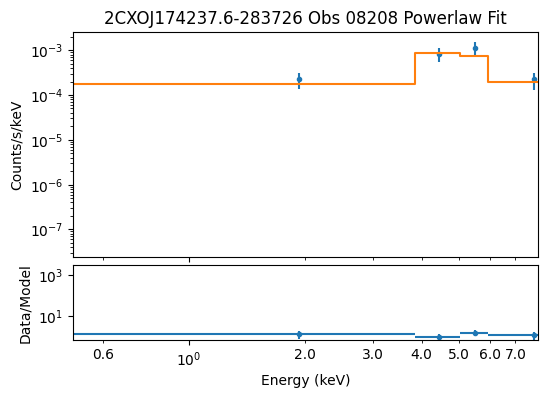

In [ ]:

df = pd.DataFrame(data={'X_name':['2CXO J110450.0-585559','2CXO J110535.8-584609','2CXO J174237.6-283726'],'name_nospace':['2CXOJ110450.0-585559','2CXOJ110535.8-584609','2CXOJ174237.6-283726'],'ra':[166.2083595,166.3995196,265.656921],'dec':[-58.9330692,-58.7693119, -28.624161] })


# src 7, 65
# print(df)
spectra_dir = '/Users/huiyang/Research/GitHub/MUWCLASS_4FGL/codes/Classifications/data/Individual_sources/spectra'
df_srcs = pd.DataFrame()
src_NICER_list = ['2CXOJ174237.6-283726']#'2CXOJ174237.6-283726'] #'2CXOJ110450.0-585559','2CXOJ110535.8-584609']#'2CXOJ110521.8-584528','2CXOJ215447.7+623154']#'2CXOJ103143.2+573252']#,'2CXOJ174237.6-283726']#'2CXOJ174237.6-283726',]
#for src in src_nospace_list[:1]:

# df = pd.DataFrame(data={'X_name':['2CXO J110521.8-584528','2CXO J215447.7+623154'],'name_nospace':['2CXOJ110521.8-584528','2CXOJ215447.7+623154'],'ra':[166.3409921,328.6990801],'dec':[-58.7578001,62.5318473] })



for csc_name in src_NICER_list:

    
    src_short = csc_name[4:-9]
    #print(src)

    df_src = df[df['name_nospace']==csc_name]
    ra, dec, src_name = df_src['ra'].values[0], df_src['dec'].values[0], df_src['X_name'].values[0]
    print(src_name, ra, dec)
    

    coords = SkyCoord(ra, dec, unit='deg')
    ebv = DustMap.ebv(coords, dustmap='SFD') * 0.86 # 0.86 is the correction described in Schlafly et al. 2010 and Schlafly & Finkbeiner 2011
    nH_from_AV = 2.21 * 3.1 * ebv * 0.1
    nH  = GasMap.nh(coords, nhmap='LAB').value / 1e22 # nH in unit of 1.e22 atoms /cm2
    #print(f'nH: {nH} 1.e22 atoms /cm2')
    
    qry = f"""
    SELECT m.name,m.powlaw_nh,s.detect_stack_id,o.obsid,o.obi,o.region_id,o.var_prob_b,o.ks_prob_b,o.kp_prob_b 
    FROM csc2.master_source m , csc2.master_stack_assoc a , csc2.observation_source o , csc2.stack_observation_assoc b , csc2.stack_source s 
    WHERE ( m.name = '{src_name}' )
        AND (m.name = a.name) AND (s.detect_stack_id = a.detect_stack_id and s.region_id = a.region_id) 
        AND (s.detect_stack_id = b.detect_stack_id and s.region_id = b.region_id) 
        AND (o.obsid = b.obsid and o.obi = b.obi and o.region_id = b.region_id) 
        ORDER BY name ASC
    """
    
    

    search_file = tap.search(qry)
    
    df_var = search_file.table.to_pandas()
    print(df_var)
    print(df_var['powlaw_nh'][0]/100,nH_from_AV,nH)
    nH_fit = df_var['powlaw_nh'][0]/100
    if np.isnan(nH_fit):
        nH_fit = nH_from_AV
    # print(nH_fit)

    ui.clean()

    
    df_var['obsid'] = df_var['obsid'].apply(lambda x: str(x).zfill(5))

    df_s = pd.DataFrame()
    id = 1
    for df_csc_src_idx, row in df_var.iterrows():
    # for obsid, obi, var_prob, detect_stack_id in zip(df_var['obsid'], df_var['obi'], df_var['kp_prob_b'], df_var['detect_stack_id']):
        # obsid = f'{obsid:05d}'
        
        obsid, obi, region_id = row['obsid'], row['obi'], row['region_id']
        per_folder = f'{obsid}_{obi:03d}'
        print(per_folder)
        # print(f'/Users/huiyang/Research/GitHub/MUWCLASS_4FGL/codes/Classifications/data/Individual_sources/{src}/{obsid:05d}_{obi:03d}/*pha3.fits.gz')
        # print(glob.glob(f'/Users/huiyang/Research/GitHub/MUWCLASS_4FGL/codes/Classifications/data/Individual_sources/{src}/{obsid:05d}_{obi:03d}/*pha3.fits.gz'))

        pha = glob.glob(f'/Users/huiyang/Research/GitHub/MUWCLASS_4FGL/codes/Classifications/data/Individual_sources/{csc_name}/{obsid}_{obi:03d}/*pha3.fits.gz')

        if len(pha) == 0:
            # raise Exception(f'No pha file found for Observation {obsid} Region ID {region_id}')
            print(f'No pha file found for Observation {obsid} Region ID {region_id}')
            df_s = df_s.append({'name': csc_name, 'obsid': obsid, 'region_id': region_id, 'model': model}, ignore_index=True)
        elif len(pha) > 1:
            # should never happen
            raise Exception(f'Multiple pha files found for Observation {obsid} Region ID {region_id}')
            # print(f'Multiple pha files found for Observation {obsid} Region ID {region_id}')
        else:
            counts = spectral_files(pha[0], mode, simultaneous, model_dict[model], id=obsid)
            df_s = df_s.append({'name': csc_name, 'obsid': obsid, 'region_id': region_id, 'model': model, 'counts': counts}, ignore_index=True)
            # print(df_s)
            if simultaneous==False:

                if counts < counts_cut:
                    print(f'Not enough counts to fit {csc_name} in Observation {obsid}')
                    ui.delete_data(obsid)
                    ui.delete_model(obsid)
                else:
                    df_s = spectral_fit(mode, simultaneous, model, stat, df_s, id=obsid)

                    plot_title = f'{csc_name} Obs {obsid} {model.title()} Fit'
            
                    filename = (f'/Users/huiyang/Research/GitHub/MUWCLASS_4FGL/codes/Classifications/data/Individual_sources/figs/{csc_name}_obs_{obsid}_{model}.png').strip()
                    spectra_plot(mode, model, plot_title, filename, id=obsid, replace=replace)

                    ui.clean()
                    plt.close()

    if simultaneous==True:
        print(df_s)
        total_counts = df_s['counts'].sum() if 'counts' in df_s.columns else 0
        if total_counts < counts_cut:
            print(f'Not enough total counts to fit {csc_name} in all observations')
            df_srcs = df_srcs.append(df_s, ignore_index=True)
            continue

        df_s = spectral_fit(mode, simultaneous, model, stat, df_s)

        for df_csc_src_idx, row in df_var.iterrows():
        # for df_csc_src_idx, row in df_csc_src.iterrows():
            # get obs, cluster, and region_id from row
            obsid = row['obsid']
            
            # if obsid in ui.list_data_ids():
            plot_title = f'{csc_name} Obs {obsid} {model.title()} Fit'
            filename = (f'/Users/huiyang/Research/GitHub/MUWCLASS_4FGL/codes/Classifications/data/Individual_sources/figs/{csc_name}_obs_{obsid}_{model}.png').strip()
            spectra_plot(mode, model, plot_title, filename, id=obsid, replace=replace)

    df_srcs = df_srcs.append(df_s, ignore_index=True)

    ui.clean()
    plt.close()
        

df_srcs.to_csv(f'/Users/huiyang/Research/GitHub/MUWCLASS_4FGL/codes/Classifications/data/Individual_sources/test_csc_spectral_fits_{model}.csv', index=False)


        # for pha_file in glob.glob(f'/Users/huiyang/Research/GitHub/MUWCLASS_4FGL/codes/Classifications/data/Individual_sources/{src}/{obsid:05d}_{obi:03d}/*pha3.fits.gz'):
        #     # print(pha_file)
        #     counts = spectral_files(pha_file, mode, model_dict[model], id=f'{obsid:05d}')
        #     df_src = df_src.append({'name': src, 'obsid': obsid, 'region_id': region_id, 'model': model, 'counts': counts}, ignore_index=True)

        #     spectral_files(pha_file, mode, model_dict[model], id)
        #     id += 1
    # spectral_fit(mode, model, stat)#, catalog_src_idx=catalog_src_idx, src_idxs=spec_list[catalog_src_idx])
            

# for catalog_src_idx, catalog_src_coord in enumerate(catalog[0:1]):

#             for obs_idx, src_idx in enumerate(spec_list[catalog_src_idx]):
#                     if src_idx is not None:
#                             id = obs_idx
#                             # add 1 to src_idx to go from index to file number
#                             pha = '/home/steven/sherpa/' + obss[obs_idx] + '/spectra/' + cluster+'_src'+str(src_idx+1)+'.pi'
#                             spectral_files(pha, mode, model_dict[model], id)
#             spectral_fit(mode, model, stat, catalog_src_idx=catalog_src_idx, src_idxs=spec_list[catalog_src_idx])
#             for obs_idx, src_idx in enumerate(spec_list[catalog_src_idx]):
#                     if src_idx is not None:
#                             id = obs_idx
#                             plot_title = f'{cluster.upper()} Merged Source {catalog_src_idx} Obs {obss[obs_idx]} Source {src_idx} {model.title()} Fit'
#                             filename = (f'/home/steven/sherpa/{cluster}/spectra/{cluster}_merged_src_{catalog_src_idx}_obs_{obss[obs_idx]}_src{src_idx}_{model}.png').replace(' ','_')
#                             spectra_plot(mode, model, plot_title, filename, id, replace=False)
            
#             if catalog_src_idx==0:
#                     parnames = [(par.modelname + '.' + par.name).translate(str.maketrans('','','1234567890')) for par in ui.get_model(id).pars]
#                     conf_parnames = ui.get_conf_results().parnames
#                     # filter out normalization parameters from the confidence interval results for some reason
#                     conf_pars_idx = [ i for i, par in enumerate(conf_parnames) if ('norm' in par and str(id) in par) or 'norm' not in par]
#                     conf_parnames = np.array(conf_parnames)[conf_pars_idx]
                    
#             ui.clean()

#     df = pd.DataFrame(data, columns=['Cluster', 'catalog_src_idx', 'obs', 'obs_source', 'flux', 'counts', 'obscstat', 'Ce', 'Cv', 'qual', 'qval', 'rstat'] + parnames + [parname.translate(str.maketrans('','','1234567890')) + '_min' for parname in conf_parnames] + [parname.translate(str.maketrans('','','1234567890')) + '_max' for parname in conf_parnames])

#     # get coordinates from src.fits
#     src_fits = fits.open(f'/home/steven/sherpa/{cluster}/src.fits')
#     table = Table(src_fits[1].data)

#     cols = [col for col in table.colnames if len(table[col].shape) <= 1]
#     df2 = table[cols].to_pandas()
#     df = df.merge(df2, left_on='catalog_src_idx', right_index=True)
#     df.to_csv(f'/home/steven/sherpa/{cluster}/{cluster}_merged_spectral_fits_{model}.csv', index=False)


# 

2CXO J174237.6-283726 265.65692088726325 -28.624160710801192
                    name  powlaw_nh           detect_stack_id  obsid  obi  \
0  2CXO J174237.6-283726        NaN  acisfJ1743106m283727_001   8208    0   
1  2CXO J174237.6-283726        NaN  acisfJ1742247m283114_001   8206    0   

   region_id  var_prob_b  ks_prob_b  kp_prob_b  
0         38    0.208453   0.655059   0.931226  
1         50    0.115846   0.276839   0.208720  
nan 4.676676921753684 0.9547349680924369
08208_000
16.73587712188176


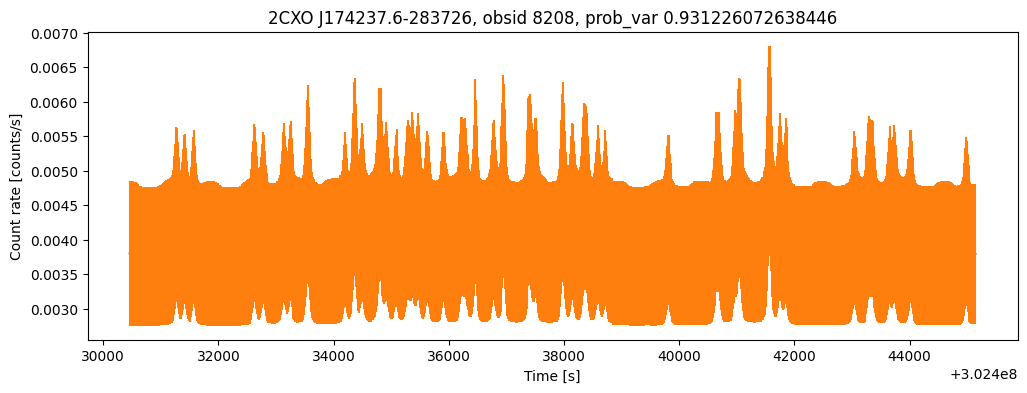

./data/Individual_sources/2CXOJ174237.6-283726/08208_000/acisf08208_000N020_evt3.fits.gz


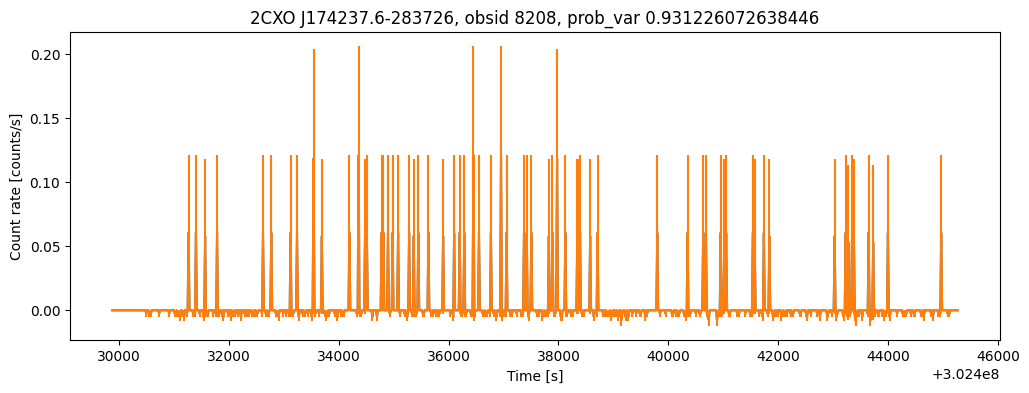

08206_000
1836.9821423711255


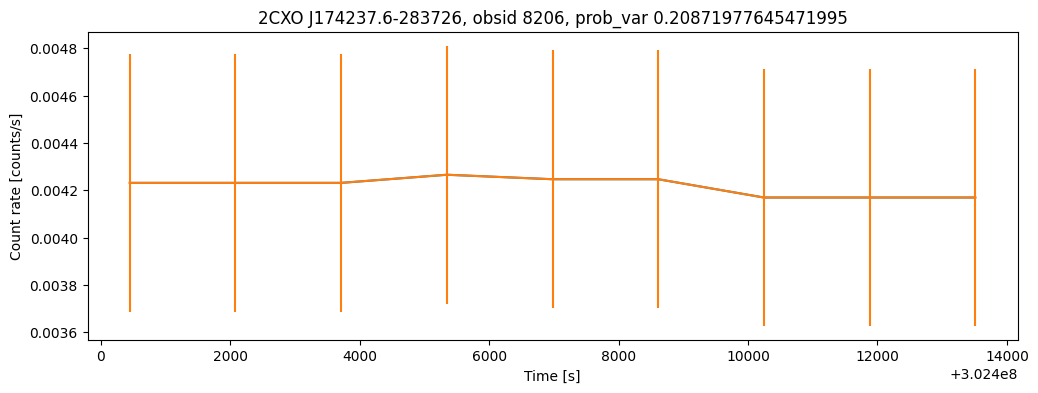

./data/Individual_sources/2CXOJ174237.6-283726/08206_000/acisf08206_000N020_evt3.fits.gz


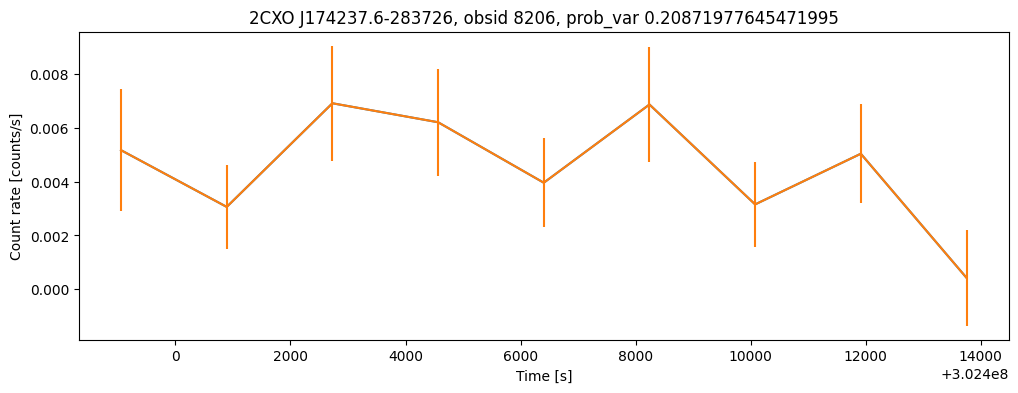

In [ ]:
# 

spectra_dir = '/Users/huiyang/Research/GitHub/MUWCLASS_4FGL/codes/Classifications/data/Individual_sources/spectra'

src_NICER_list = ['2CXOJ174237.6-283726']#'2CXOJ103143.2+573252']#,'2CXOJ174237.6-283726']#'2CXOJ174237.6-283726',]
#for src in src_nospace_list[:1]:
for src in src_NICER_list:
    src_short = src[4:-9]
    #print(src)

    df_src = df[df['name_nospace']==src]
    ra, dec, src_name = df_src['ra'].values[0], df_src['dec'].values[0], df_src['X_name'].values[0]
    print(src_name, ra, dec)
    

    coords = SkyCoord(ra, dec, unit='deg')
    ebv = DustMap.ebv(coords, dustmap='SFD') * 0.86 # 0.86 is the correction described in Schlafly et al. 2010 and Schlafly & Finkbeiner 2011
    nH_from_AV = 2.21 * 3.1 * ebv * 0.1
    nH  = GasMap.nh(coords, nhmap='LAB').value / 1e22 # nH in unit of 1.e22 atoms /cm2
    #print(f'nH: {nH} 1.e22 atoms /cm2')
    
    qry = f"""
    SELECT m.name,m.powlaw_nh,s.detect_stack_id,o.obsid,o.obi,o.region_id,o.var_prob_b,o.ks_prob_b,o.kp_prob_b 
    FROM csc2.master_source m , csc2.master_stack_assoc a , csc2.observation_source o , csc2.stack_observation_assoc b , csc2.stack_source s 
    WHERE ( m.name = '{src_name}' )
        AND (m.name = a.name) AND (s.detect_stack_id = a.detect_stack_id and s.region_id = a.region_id) 
        AND (s.detect_stack_id = b.detect_stack_id and s.region_id = b.region_id) 
        AND (o.obsid = b.obsid and o.obi = b.obi and o.region_id = b.region_id) 
        ORDER BY name ASC
    """
    
    

    search_file = tap.search(qry)
    
    df_var = search_file.table.to_pandas()
    print(df_var)
    print(df_var['powlaw_nh'][0]/100,nH_from_AV,nH)
    nH_fit = df_var['powlaw_nh'][0]/100
    if np.isnan(nH_fit):
        nH_fit = nH_from_AV
    # print(nH_fit)
    
    
    # search_csc(f'{ra}, {dec}', '0.5', f'./data/Individual_sources/{src}_source_search.tsv', 'arcsec', 
    #      '', 'no', 'all', './data/Individual_sources/', 'broad', 'evt,lc,pha,rmf,arf,fov,reg,stksrcreg', 'csc2','1','1')

    for obsid, obi, var_prob, detect_stack_id in zip(df_var['obsid'], df_var['obi'], df_var['kp_prob_b'], df_var['detect_stack_id']):
        per_folder = f'{obsid:05d}_{obi:03d}'
        print(per_folder)
        


        for lc_file in glob.glob(f'./data/Individual_sources/{src}/{obsid:05d}_{obi:03d}/*lc3.fits.gz'):
            hdul = fits.open(lc_file)
            #print(hdul.info())
            lc3 = hdul[1].data
            bg3 = hdul[2].data
            plt.subplots(figsize=(12, 4))
            times = lc3['Time']
            time_laps = [times[i+1]-times[i] for i in range(len(times)-1)]
            
            mean_time_lap = np.mean(time_laps)*len(times)/(len(times)-1)
            print(mean_time_lap)
            plt.plot(lc3['Time'],lc3['COUNT_RATE'])
            plt.errorbar(lc3['Time'],lc3['COUNT_RATE'],lc3['COUNT_RATE_ERR'])

            plt.xlabel('Time [s]')
            plt.ylabel('Count rate [counts/s]')
            plt.title(f'{src_name}, obsid {obsid}, prob_var {var_prob}')
            plt.savefig(f'./data/Individual_sources/figs/{src}_{obsid:05d}_{obi:03d}_Xray_lc.png', dpi=200)
            plt.show()
        
        for evt_file in glob.glob(f'./data/Individual_sources/{src}/{per_folder}/*evt3.fits.gz'):
            print(evt_file)
            reg_file = glob.glob(f'./data/Individual_sources/{src}/{detect_stack_id}/{detect_stack_id}*reg3.fits.gz')[0]

            dmextract = rt.make_tool('dmextract')
            dmextract.punlearn()
            dmextract(infile=f"{evt_file}[sky=region({reg_file}[2])][bin time=::{mean_time_lap}]",outfile=f"./data/Individual_sources/{src}/{per_folder}/src_lc.fits",bkg=f"{evt_file}[sky=region({reg_file}[3])]",opt="ltc1",clobber="yes",verb=1)
            hdul = fits.open(f"./data/Individual_sources/{src}/{per_folder}/src_lc.fits")
            #print(hdul.info())
            lc3 = hdul[1].data
            print(hdul[1])
            plt.subplots(figsize=(12, 4))
            plt.plot(lc3['TIME_MIN'],lc3['NET_RATE'])
            plt.errorbar(lc3['TIME_MIN'],lc3['NET_RATE'],lc3['ERR_RATE'])

            plt.xlabel('Time [s]')
            plt.ylabel('Count rate [counts/s]')
            plt.title(f'{src_name}, obsid {obsid}, prob_var {var_prob}')
            # plt.savefig(f'./data/Individual_sources/figs/{src}_{obsid:05d}_{obi:03d}_Xray_lc.png', dpi=200)
            plt.show()

        
           

# spectra fitting

In [ ]:


spectra_dir = '/Users/huiyang/Research/GitHub/MUWCLASS_4FGL/codes/Classifications/data/Individual_sources/spectra'

src_NICER_list = ['2CXOJ174237.6-283726']#'2CXOJ103143.2+573252']#,'2CXOJ174237.6-283726']#'2CXOJ174237.6-283726',]
#for src in src_nospace_list[:1]:
for src in src_NICER_list:
    src_short = src[4:-9]
    #print(src)
    '''
    if path.exists(f'{spectra_dir}/{src}.ascii') == True:
        #raw = (ascii.read(f'{spectra_dir}/{src}.ascii',guess=False,header_start=None,data_start=1,names=('wav','flux','e_flux')))
        data = ascii.read(f'{spectra_dir}/{src}.ascii', format='no_header', delimiter=' ',names=('wav','flux','e_flux'))
        #print(data)
        df = data.to_pandas()
        df['eflux'] = np.sqrt(1./df['e_flux'])
        #print(df)
        
        #fig, ax = plt.subplots(1, 1, figsize=(6,4))
        #ax.plot(df.iloc[1:-1,0],df.iloc[1:-1,1])
        #ax.set_title(src)
        #plt.show()
        
        df.iloc[1:-1][['wav','flux','eflux']].to_csv(f'{spectra_dir}/{src}.csv',index=False,header=False)
        display(Image(filename=f'{spectra_dir}/{src}_fit.png',width = 600))
        if src_short in lc['InputID'].values:
            #print(src_short)
            lc_src = lc[lc['InputID']==src_short]
            fig, ax = plt.subplots(1, 1, figsize=(6,4))
            ax.errorbar(lc_src['MJD'],lc_src['Mag'],yerr=lc_src['Magerr'],fmt='none')
            ax.set_xlabel('MJD')
            ax.set_ylabel('Mag')
            ax.set_title(src)
            plt.savefig(f'./data/figs/{src}_optical_lc.png', dpi=200)
            plt.show()
    '''
    df_src = df[df['name_nospace']==src]
    ra, dec, src_name = df_src['ra'].values[0], df_src['dec'].values[0], df_src['X_name'].values[0]
    print(src_name, ra, dec)
    
    
    


    '''

    #obs_table = Observations.query_region(f'{ra} {dec}',radius=2 * u.arcsec)


    #df_obs = obs_table.to_pandas()
    #print(df_obs.columns)
    
    tess_search_result = lk.search_lightcurve(f'{ra} {dec}')
    #tess_search_result = lk.search_tesscut(f'{ra} {dec}')
    print(tess_search_result)
    for tess_lc in tess_search_result:
        #print(tess_lc)
        lc = tess_lc.download()
        lc.plot()
        plt.show()
    #lc = tess_search_result.download()
    #lc = tess_search_result.download()
    #lc.plot()
    '''
    #'''

    coords = SkyCoord(ra, dec, unit='deg')
    ebv = DustMap.ebv(coords, dustmap='SFD') * 0.86 # 0.86 is the correction described in Schlafly et al. 2010 and Schlafly & Finkbeiner 2011
    nH_from_AV = 2.21 * 3.1 * ebv * 0.1
    nH  = GasMap.nh(coords, nhmap='LAB').value / 1e22 # nH in unit of 1.e22 atoms /cm2
    #print(f'nH: {nH} 1.e22 atoms /cm2')
    
    qry = f"""
    SELECT m.name,m.powlaw_nh,s.detect_stack_id,o.obsid,o.obi,o.region_id,o.var_prob_b,o.ks_prob_b,o.kp_prob_b 
    FROM csc2.master_source m , csc2.master_stack_assoc a , csc2.observation_source o , csc2.stack_observation_assoc b , csc2.stack_source s 
    WHERE ( m.name = '{src_name}' )
        AND (m.name = a.name) AND (s.detect_stack_id = a.detect_stack_id and s.region_id = a.region_id) 
        AND (s.detect_stack_id = b.detect_stack_id and s.region_id = b.region_id) 
        AND (o.obsid = b.obsid and o.obi = b.obi and o.region_id = b.region_id) 
        ORDER BY name ASC
    """
    
    

    search_file = tap.search(qry)
    
    df_var = search_file.table.to_pandas()
    print(df_var)
    print(df_var['powlaw_nh'][0]/100,nH_from_AV,nH)
    nH_fit = df_var['powlaw_nh'][0]/100
    if np.isnan(nH_fit):
        nH_fit = nH_from_AV
    # print(nH_fit)
    
    
    # search_csc(f'{ra}, {dec}', '0.5', f'./data/Individual_sources/{src}_source_search.tsv', 'arcsec', 
    #      '', 'no', 'all', './data/Individual_sources/', 'broad', 'evt,lc,pha,rmf,arf,fov,reg,stksrcreg', 'csc2','1','1')

    for obsid, obi, var_prob, detect_stack_id in zip(df_var['obsid'], df_var['obi'], df_var['kp_prob_b'], df_var['detect_stack_id']):
        per_folder = f'{obsid:05d}_{obi:03d}'
        print(per_folder)
        


        for lc_file in glob.glob(f'./data/Individual_sources/{src}/{obsid:05d}_{obi:03d}/*lc3.fits.gz'):
            hdul = fits.open(lc_file)
            #print(hdul.info())
            lc3 = hdul[1].data
            bg3 = hdul[2].data
            plt.subplots(figsize=(12, 4))
            times = lc3['Time']
            time_laps = [times[i+1]-times[i] for i in range(len(times)-1)]
            
            mean_time_lap = np.mean(time_laps)*len(times)/(len(times)-1)
            print(mean_time_lap)
            plt.plot(lc3['Time'],lc3['COUNT_RATE'])
            plt.errorbar(lc3['Time'],lc3['COUNT_RATE'],lc3['COUNT_RATE_ERR'])

            plt.xlabel('Time [s]')
            plt.ylabel('Count rate [counts/s]')
            plt.title(f'{src_name}, obsid {obsid}, prob_var {var_prob}')
            plt.savefig(f'./data/Individual_sources/figs/{src}_{obsid:05d}_{obi:03d}_Xray_lc.png', dpi=200)
            plt.show()
        
        for evt_file in glob.glob(f'./data/Individual_sources/{src}/{per_folder}/*evt3.fits.gz'):
            print(evt_file)
            reg_file = glob.glob(f'./data/Individual_sources/{src}/{detect_stack_id}/{detect_stack_id}*reg3.fits.gz')[0]
        #     
        #     %mkdir /home/steven/sherpa/$obs/spectra
        #     %cd /home/steven/sherpa/$obs
            
        #     #change
            # ! punlearn dmextract 
            # ! pset dmextract infile=$evt_file"[sky=region("$reg_file"[2])][bin time=::500]"
            # ! pset dmextract outfile="./data/Individual_sources/"$src"/"$per_folder"/src_lc.fits" 
            # ! pset dmextract bkg=$evt_file"[sky=region("$reg_file"[3])]"
            # ! pset dmextract clobber=yes
            # just ignore BrokenPipeError: [Errno 32] Broken pipe
            # ! dmextract 
            # os.system('punlearn dmextract')
            # os.system(f'pset dmextract infile="{evt_file}[sky=region({reg_file}[2])][bin time=::500]"')
            # os.system(f'pset dmextract outfile="./data/Individual_sources/{src}/{per_folder}/src_lc.fits"')
            # os.system(f'pset dmextract bkg="{evt_file}[sky=region({reg_file}[3])]"')
            # os.system('pset dmextract clobber=yes')
            # os.system('dmextract')

            dmextract = rt.make_tool('dmextract')
            dmextract.punlearn()
            dmextract(infile=f"{evt_file}[sky=region({reg_file}[2])][bin time=::{mean_time_lap}]",outfile=f"./data/Individual_sources/{src}/{per_folder}/src_lc.fits",bkg=f"{evt_file}[sky=region({reg_file}[3])]",opt="ltc1",clobber="yes",verb=1)
            hdul = fits.open(f"./data/Individual_sources/{src}/{per_folder}/src_lc.fits")
            #print(hdul.info())
            lc3 = hdul[1].data
            print(hdul[1])
            plt.subplots(figsize=(12, 4))
            plt.plot(lc3['TIME_MIN'],lc3['NET_RATE'])
            plt.errorbar(lc3['TIME_MIN'],lc3['NET_RATE'],lc3['ERR_RATE'])

            plt.xlabel('Time [s]')
            plt.ylabel('Count rate [counts/s]')
            plt.title(f'{src_name}, obsid {obsid}, prob_var {var_prob}')
            # plt.savefig(f'./data/Individual_sources/figs/{src}_{obsid:05d}_{obi:03d}_Xray_lc.png', dpi=200)
            plt.show()

        for pha_file in glob.glob(f'./data/Individual_sources/{src}/{obsid:05d}_{obi:03d}/*pha3.fits.gz'):
            ui.load_pha(pha_file)
            ui.ignore('0.:0.5,8.0:')
            ui.subtract()
            ui.notice_id(1,0.3,7.)
            ui.group_counts(10)
            ui.set_ylog()
            ui.set_xlog()
            ui.plot_data()
            plt.xlim(1e-1,10)
            
            ui.set_stat('chi2gehrels')
            ui.set_analysis('ener')
            
            '''
            ui.set_source('xstbabs.abs1 * powlaw1d.p1')
            #ui.set_source('xsphabs.abs1 * (powlaw1d.p1 + xsdiskbb.p2)')
            p1.ampl.min = 1E-5
            ##p2.norm.min = 1E-5
            abs1.nH = nH_fit
            ui.freeze(abs1.nH)
            #ui.show_model()
            ui.guess(p1)
            #ui.show_model()
            
            # parameters we want to vary
            param1 = p1.gamma
            param2 = p1.ampl
            #param3 = p2.Tin
            #param4 = p2.norm

            # list of parameters
            parameters = [param1, param2]
            # list of prior transforms
            priors = [
               bxa.create_uniform_prior_for(param1),
               bxa.create_loguniform_prior_for(param2), 
               #bxa.create_uniform_prior_for(param3),
               #bxa.create_loguniform_prior_for(param4),     
            ]

            
           
            
            
            # make a single function:
            priorfunction = bxa.create_prior_function(priors)
            # see the pymultinest documentation for all options
            solver = bxa.BXASolver(prior=priorfunction, parameters=parameters,
                         outputfiles_basename = f'./data/cscv2/{src}/{obsid:05d}_{obi:03d}/spec_fitting_v2/')
            results = solver.run(resume=True)
            '''
            '''
            ui.set_source('xstbabs.abs1 * xsmekal.mek')
            mek.norm.min = 1E-5
            abs1.nH = nH_fit
            ui.freeze(abs1.nH)
            ui.guess('mek')
           
            param1 = mek.kT
            param2 = mek.norm
            #param3 = p2.Tin
            #param4 = p2.norm

            # list of parameters
            parameters = [param1, param2]
            # list of prior transforms
            priors = [
               bxa.create_uniform_prior_for(param1),
               bxa.create_loguniform_prior_for(param2), 
               #bxa.create_uniform_prior_for(param3),
               #bxa.create_loguniform_prior_for(param4),     
            ]

            
           
            
            
            # make a single function:
            priorfunction = bxa.create_prior_function(priors)
            # see the pymultinest documentation for all options
            solver = bxa.BXASolver(prior=priorfunction, parameters=parameters,
                         outputfiles_basename = f'./data/cscv2/{src}/{obsid:05d}_{obi:03d}/spec_fitting_mekal/')
            results = solver.run(resume=True)
            '''
            
            ui.set_source('xstbabs.abs1 * (xsmekal.mek1 + xsmekal.mek2)')
            abs1.nH = nH_fit
            ui.freeze(abs1.nH)
            ui.guess('mek1')
            ui.guess('mek2')
            
            
            ui.fit()
            
            #print(results)
            #plt.title(f'{src_name}, obsid {obsid}')
            ui.show_model()
            ui.set_ylinear()
            ui.set_xlinear()
            ui.plot_fit_delchi(xlog=True, ylog=True)
            # print(ui.conf())
            #print(ui.get_stat_info()[0])
            plt.xlim(0.5,8)
            plt.savefig(f'./data/Individual_sources/figs/{src}_{obsid:05d}_{obi:03d}_Xray_spec.png', dpi=200)
            plt.show()

    #'''
